In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

In [2]:
kidney_df = pd.read_csv('./kidney_disease.csv') 

# 1. Exploring dataset

In [3]:
kidney_df.head(5)

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

In [4]:
kidney_df.describe(include='all')

id         age          bp          sg          al  \
count   400.000000  391.000000  388.000000  353.000000  354.000000   
unique         NaN         NaN         NaN         NaN         NaN   
top            NaN         NaN         NaN         NaN         NaN   
freq           NaN         NaN         NaN         NaN         NaN   
mean    199.500000   51.483376   76.469072    1.017408    1.016949   
std     115.614301   17.169714   13.683637    0.005717    1.352679   
min       0.000000    2.000000   50.000000    1.005000    0.000000   
25%      99.750000   42.000000   70.000000    1.010000    0.000000   
50%     199.500000   55.000000   80.000000    1.020000    0.000000   
75%     299.250000   64.500000   80.000000    1.020000    2.000000   
max     399.000000   90.000000  180.000000    1.025000    5.000000   

                su     rbc      pc         pcc          ba  ...  pcv    wc  \
count   351.000000     248     335         396         396  ...  330   295   
unique         NaN       2       2           2           2  ...   44    92   
top            NaN  normal  normal  notpresent  notpresent  ...   41  9800   
freq           NaN     201     259         354         374  ...   21    11   
mean      0.450142     NaN     NaN         NaN         NaN  ...  NaN   NaN   
std       1.099191     NaN     NaN         NaN         NaN  ...  NaN   NaN   
min       0.000000     NaN     NaN         NaN         NaN  ...  NaN   NaN   
25%       0.000000     NaN     NaN         NaN         NaN  ...  NaN   NaN   
50%       0.000000     NaN     NaN         NaN         NaN  ...  NaN   NaN   
75%       0.000000     NaN     NaN         NaN         NaN  ...  NaN   NaN   
max       5.000000     NaN     NaN         NaN         NaN  ...  NaN   NaN   

         rc  htn   dm  cad appet   pe  ane classification  
count   270  398  398  398   399  399  399            400  
unique   46    2    5    3     2    2    2              3  
top     5.2   no   no   no  good   no   no            ckd  
freq     18  251  258  362   317  323  339            248  
mean    NaN  NaN  NaN  NaN   NaN  NaN  NaN            NaN  
std     NaN  NaN  NaN  NaN   NaN  NaN  NaN            NaN  
min     NaN  NaN  NaN  NaN   NaN  NaN  NaN            NaN  
25%     NaN  NaN  NaN  NaN   NaN  NaN  NaN            NaN  
50%     NaN  NaN  NaN  NaN   NaN  NaN  NaN            NaN  
75%     NaN  NaN  NaN  NaN   NaN  NaN  NaN            NaN  
max     NaN  NaN  NaN  NaN   NaN  NaN  NaN            NaN  

[11 rows x 26 columns]

In [5]:
kidney_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
kidney_df.shape

(400, 26)

Remove id because it doesn't imply anything in the analysis and classification task

In [7]:
kidney_df.drop(['id'], axis=1, inplace=True)

In [8]:
kidney_df.head(5)

age    bp     sg   al   su     rbc        pc         pcc          ba  \
0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

     bgr  ...  pcv    wc   rc  htn   dm cad appet   pe  ane classification  
0  121.0  ...   44  7800  5.2  yes  yes  no  good   no   no            ckd  
1    NaN  ...   38  6000  NaN   no   no  no  good   no   no            ckd  
2  423.0  ...   31  7500  NaN   no  yes  no  poor   no  yes            ckd  
3  117.0  ...   32  6700  3.9  yes   no  no  poor  yes  yes            ckd  
4  106.0  ...   35  7300  4.6   no   no  no  good   no   no            ckd  

[5 rows x 25 columns]

In [9]:
All_Columns = list(kidney_df.columns)
print("All Columns:\n {}".format(All_Columns))

Categorical_Columns = list(kidney_df.select_dtypes(include=['object']).columns)
print("Categorical Columns:\n {}".format(Categorical_Columns))

Numerical_Columns = list(kidney_df.select_dtypes(include=['int64', 'float64']).columns)
print("Numerical Columns:\n {}".format(Numerical_Columns))

All Columns:
 ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']
Categorical Columns:
 ['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']
Numerical Columns:
 ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']


## Categorical Value

In [10]:
for feature in Categorical_Columns:
    if feature == 'classification': continue
    print('--------------------------------------------------')
    print("Value Counts:", kidney_df[feature].value_counts)
    print('\n')
    print(kidney_df.groupby([feature, 'classification']).size())
    print('\n')
    print('--------------------------------------------------')
    print('\n')

--------------------------------------------------
Value Counts: <bound method IndexOpsMixin.value_counts of 0         NaN
1         NaN
2      normal
3      normal
4      normal
        ...  
395    normal
396    normal
397    normal
398    normal
399    normal
Name: rbc, Length: 400, dtype: object>


rbc       classification
abnormal  ckd                47
normal    ckd                59
          ckd\t               1
          notckd            141
dtype: int64


--------------------------------------------------


--------------------------------------------------
Value Counts: <bound method IndexOpsMixin.value_counts of 0        normal
1        normal
2        normal
3      abnormal
4        normal
         ...   
395      normal
396      normal
397      normal
398      normal
399      normal
Name: pc, Length: 400, dtype: object>


pc        classification
abnormal  ckd                75
          ckd\t               1
normal    ckd               118
          notckd            1

In [11]:
for feature in Categorical_Columns:
    if feature == 'classification': continue
    print('--------------------------------------------------')
    print("Value Counts:", kidney_df[feature].value_counts)
    print('\n')
    print(kidney_df.groupby([feature, 'classification']).size())
    print('\n')
    print('--------------------------------------------------')
    print('\n')

--------------------------------------------------
Value Counts: <bound method IndexOpsMixin.value_counts of 0         NaN
1         NaN
2      normal
3      normal
4      normal
        ...  
395    normal
396    normal
397    normal
398    normal
399    normal
Name: rbc, Length: 400, dtype: object>


rbc       classification
abnormal  ckd                47
normal    ckd                59
          ckd\t               1
          notckd            141
dtype: int64


--------------------------------------------------


--------------------------------------------------
Value Counts: <bound method IndexOpsMixin.value_counts of 0        normal
1        normal
2        normal
3      abnormal
4        normal
         ...   
395      normal
396      normal
397      normal
398      normal
399      normal
Name: pc, Length: 400, dtype: object>


pc        classification
abnormal  ckd                75
          ckd\t               1
normal    ckd               118
          notckd            1

### Histogram

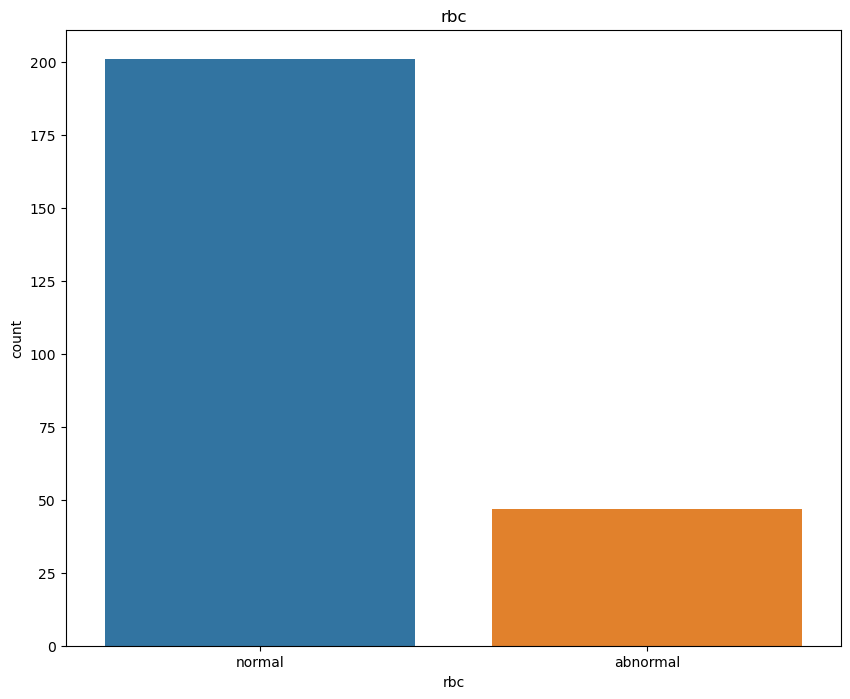

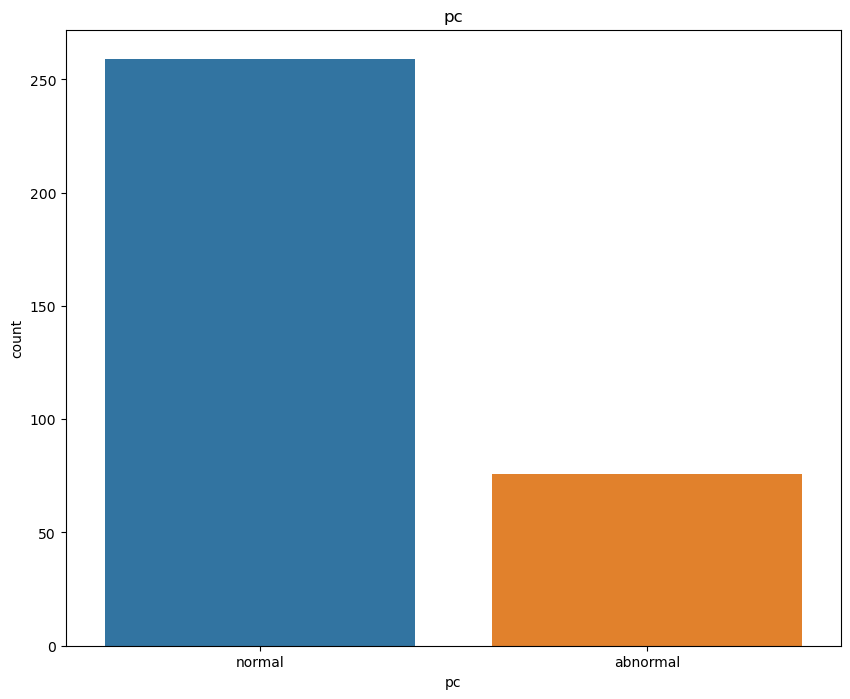

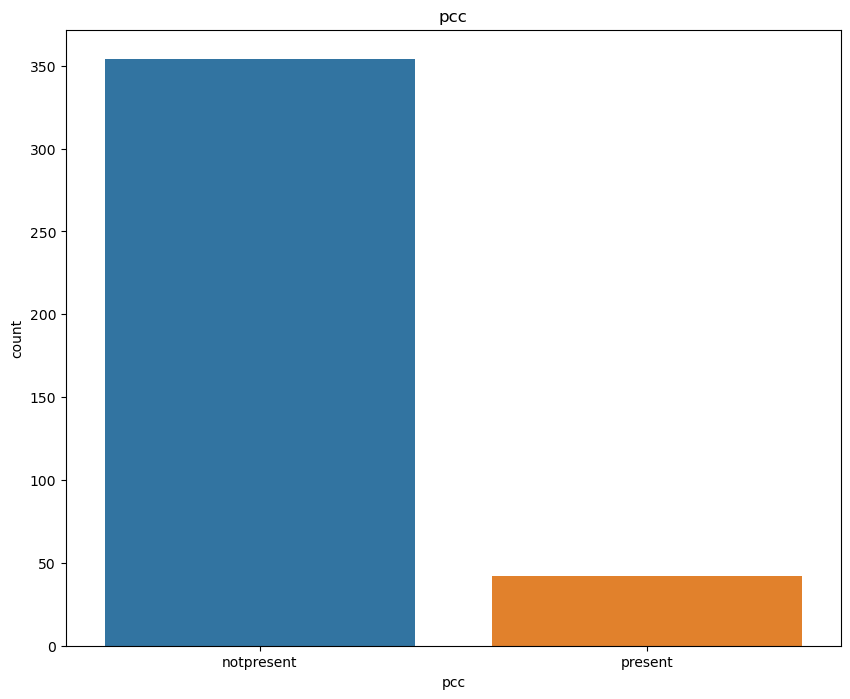

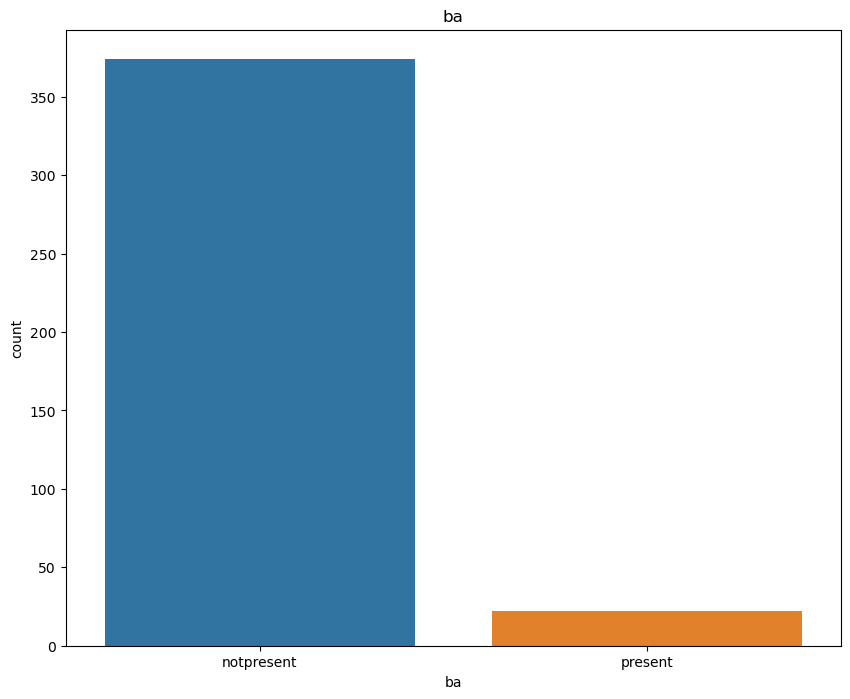

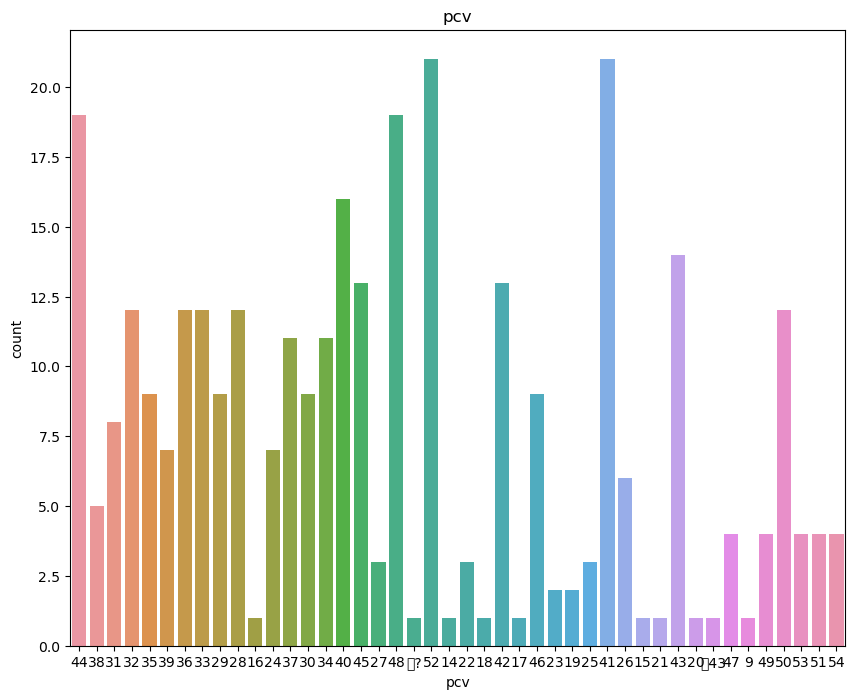

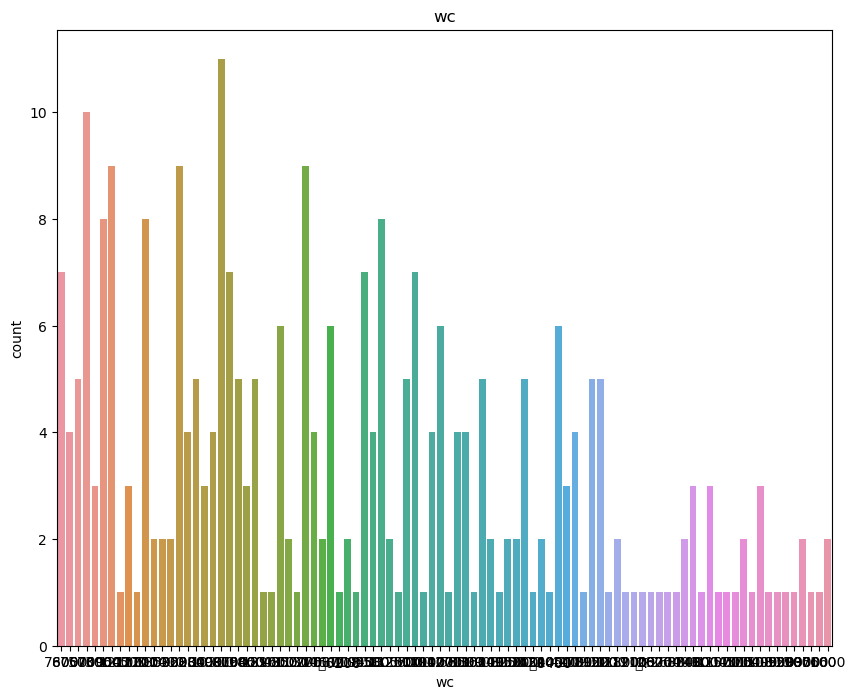

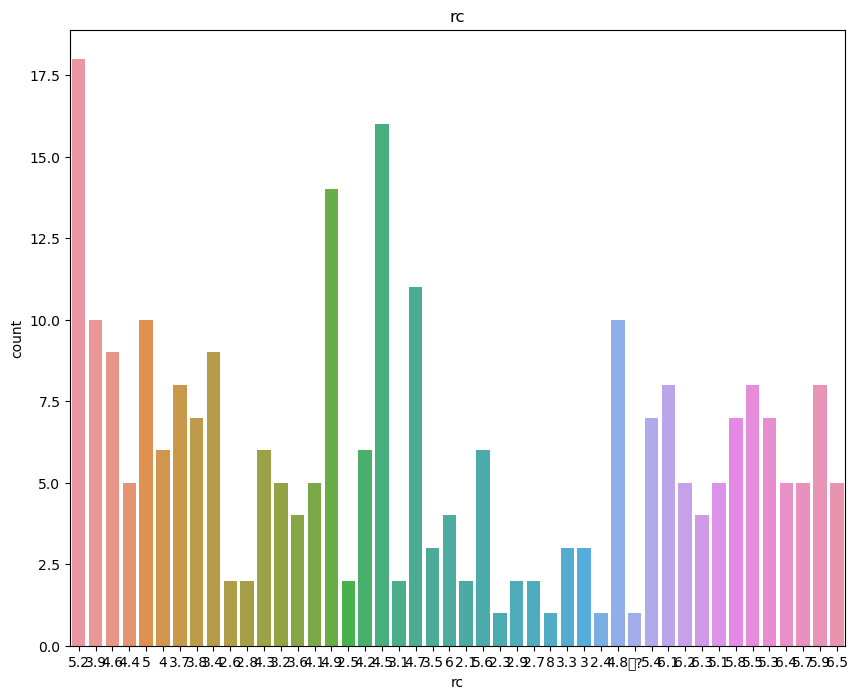

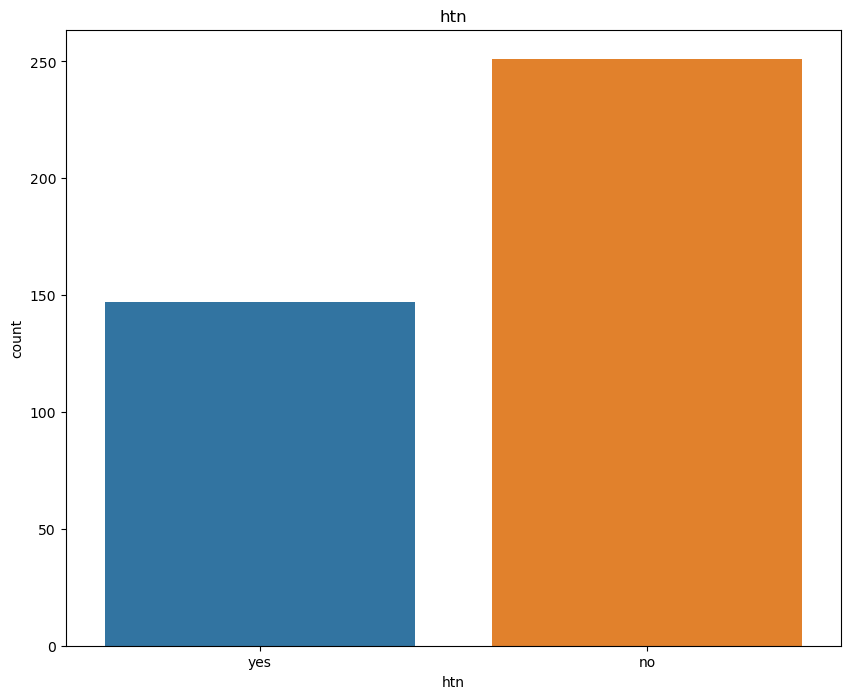

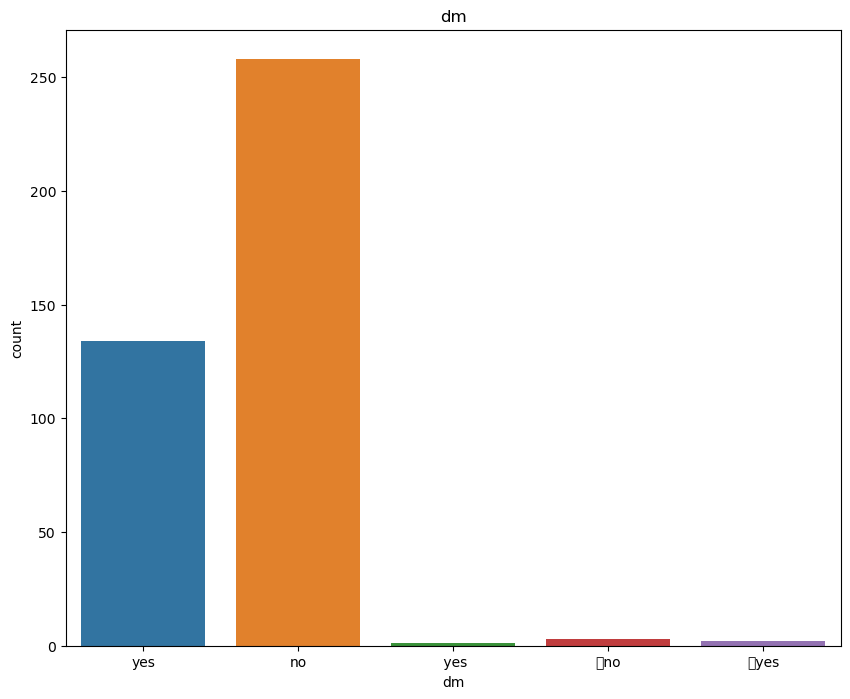

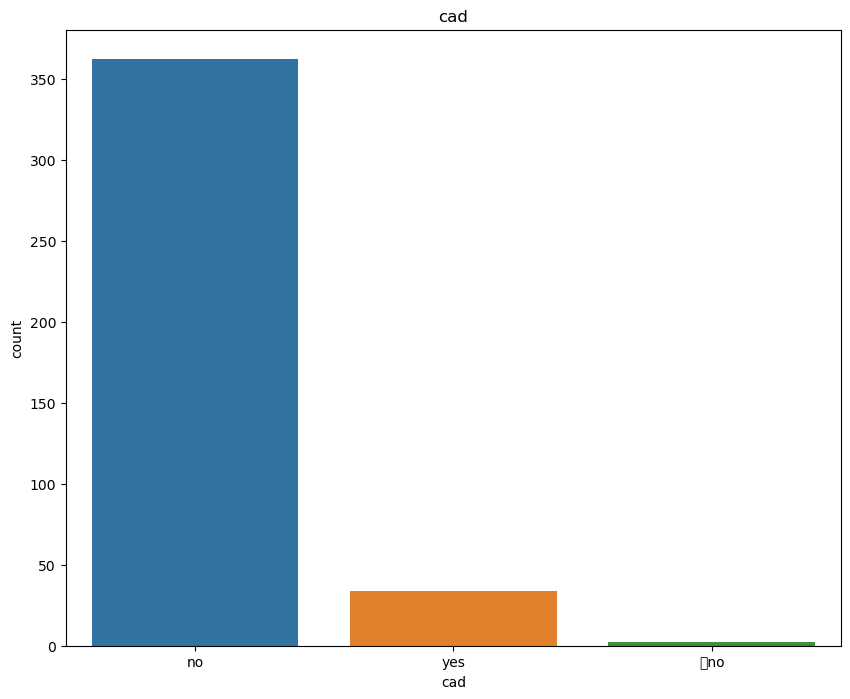

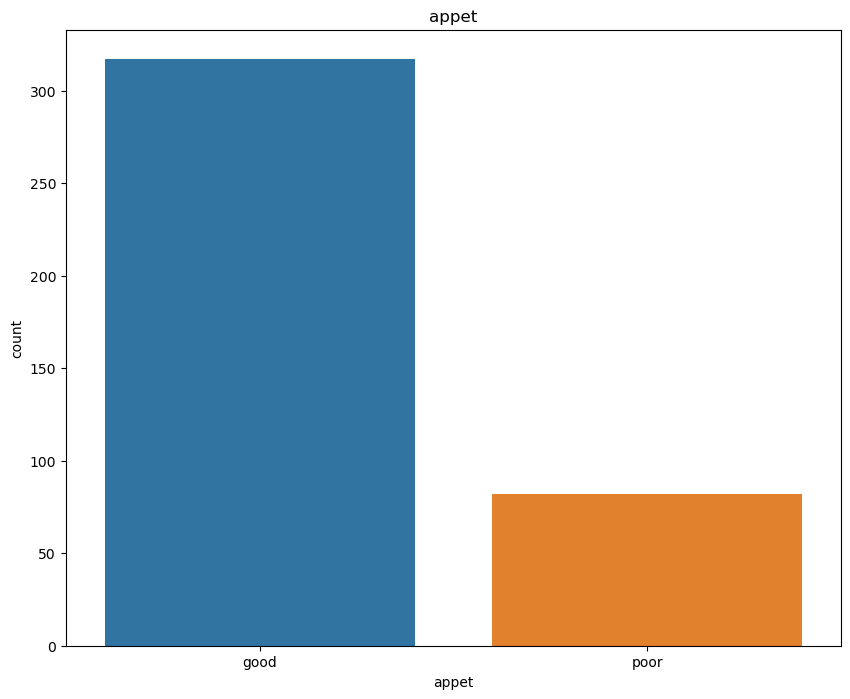

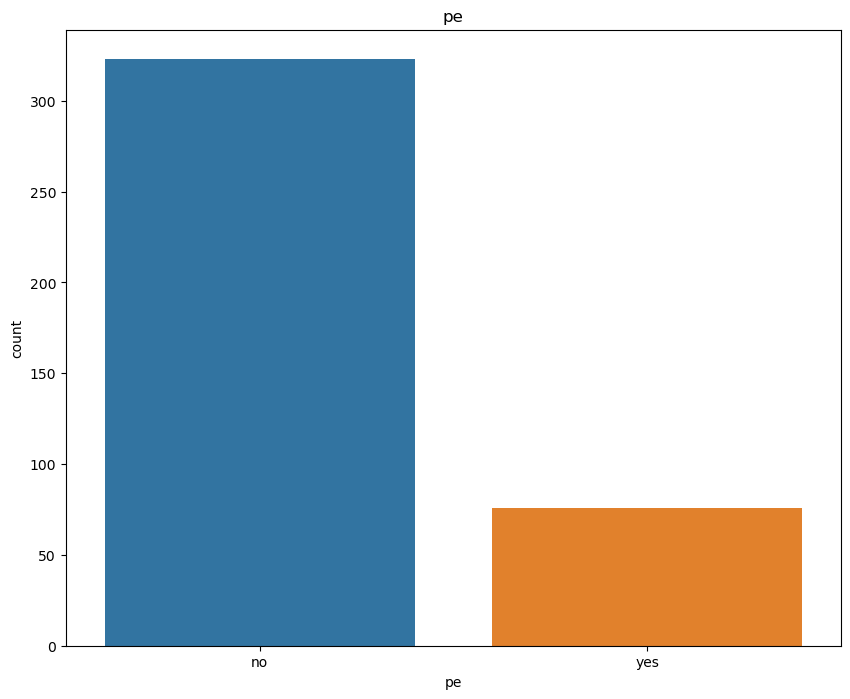

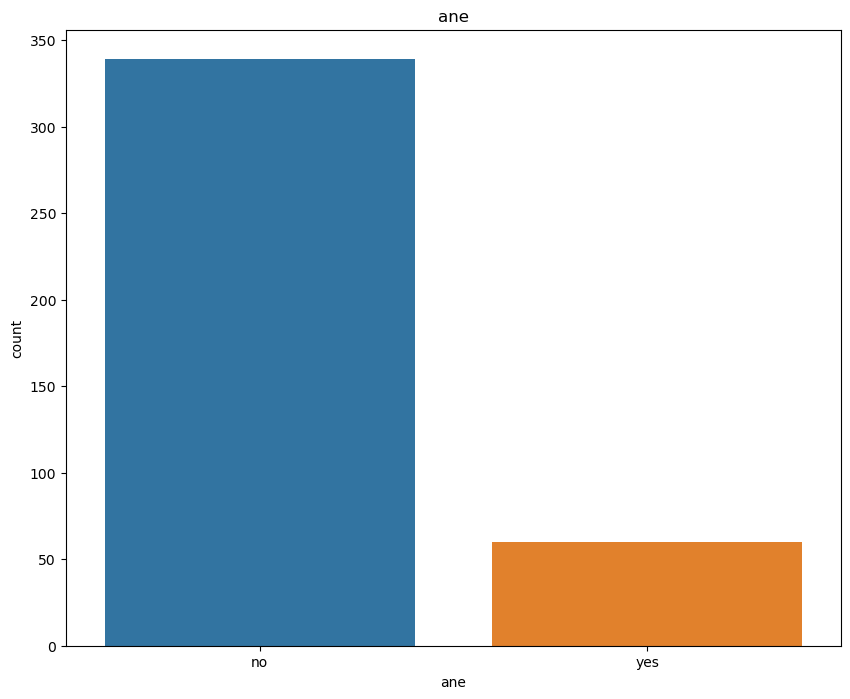

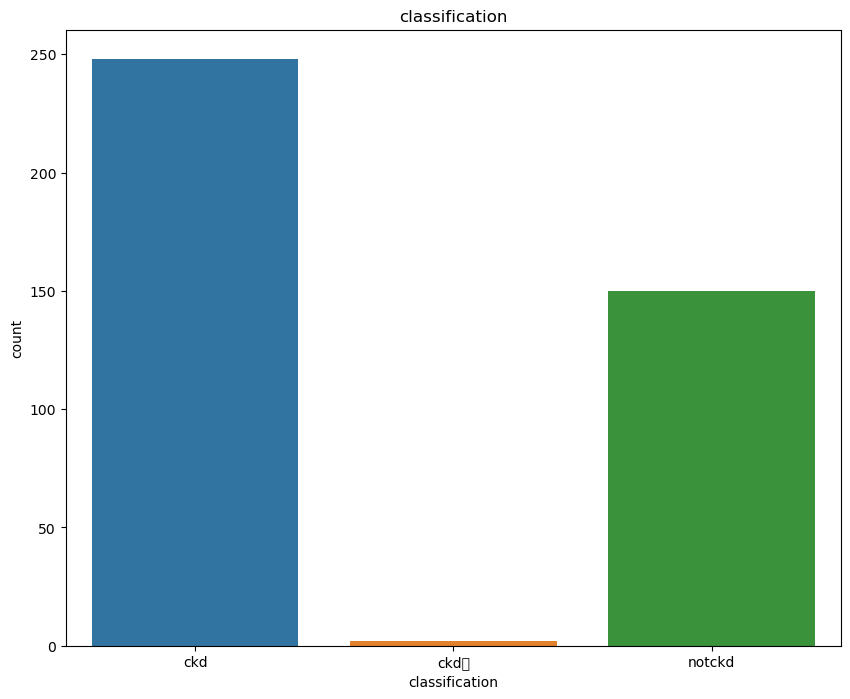

In [12]:
for feature in Categorical_Columns:
    plt.figure(figsize=(10,8))
    plt.title(feature, fontsize=12)
    sns.countplot(data=kidney_df, x=feature)
    plt.show()
    print('\n')

## Numerical Value

In [13]:
for feature in Numerical_Columns:
    if feature == 'classification': continue
    print('--------------------------------------------------')
    print("Value Counts:", kidney_df[feature].value_counts)
    print('\n')
    print(kidney_df.groupby([feature, 'classification']).size())
    print('\n')
    print('--------------------------------------------------')
    print('\n')

--------------------------------------------------
Value Counts: <bound method IndexOpsMixin.value_counts of 0      48.0
1       7.0
2      62.0
3      48.0
4      51.0
       ... 
395    55.0
396    42.0
397    12.0
398    17.0
399    58.0
Name: age, Length: 400, dtype: float64>


age   classification
2.0   ckd               1
3.0   ckd               1
4.0   ckd               1
5.0   ckd               2
6.0   ckd               1
                       ..
80.0  notckd            2
81.0  ckd               1
82.0  ckd               1
83.0  ckd               1
90.0  ckd               1
Length: 129, dtype: int64


--------------------------------------------------


--------------------------------------------------
Value Counts: <bound method IndexOpsMixin.value_counts of 0      80.0
1      50.0
2      80.0
3      70.0
4      80.0
       ... 
395    80.0
396    70.0
397    80.0
398    60.0
399    80.0
Name: bp, Length: 400, dtype: float64>


bp     classification
50.0   ckd               

### Histogram

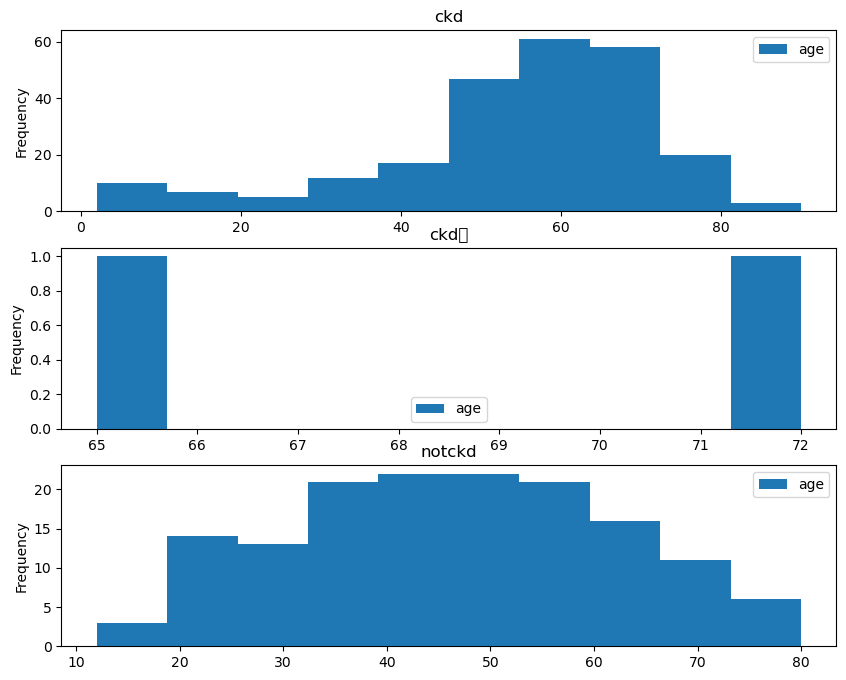

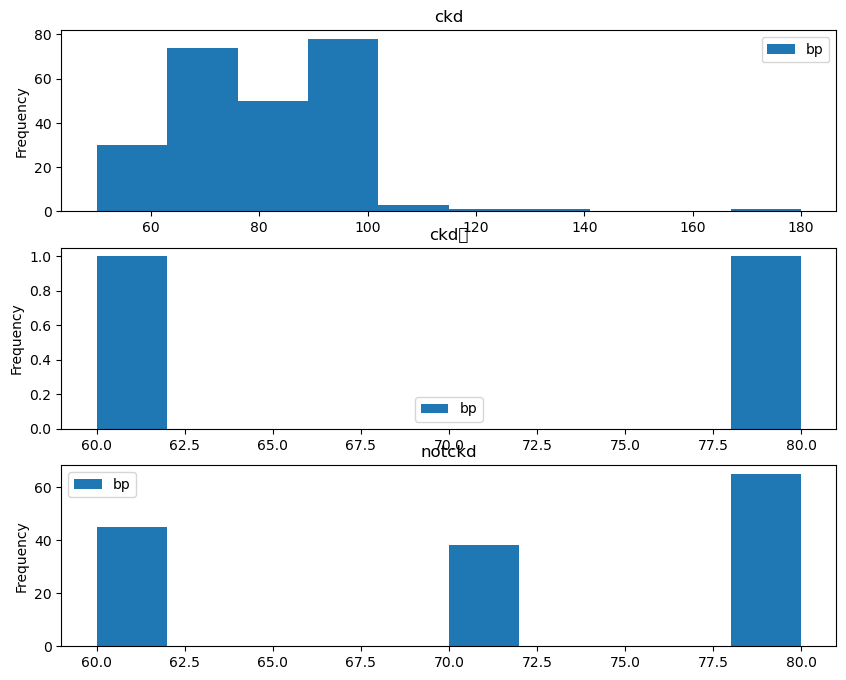

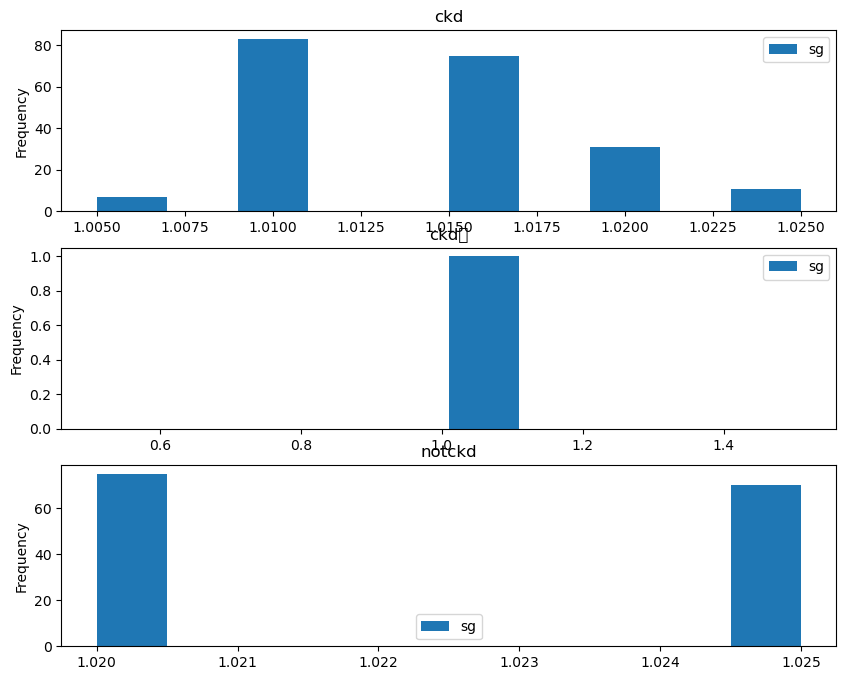

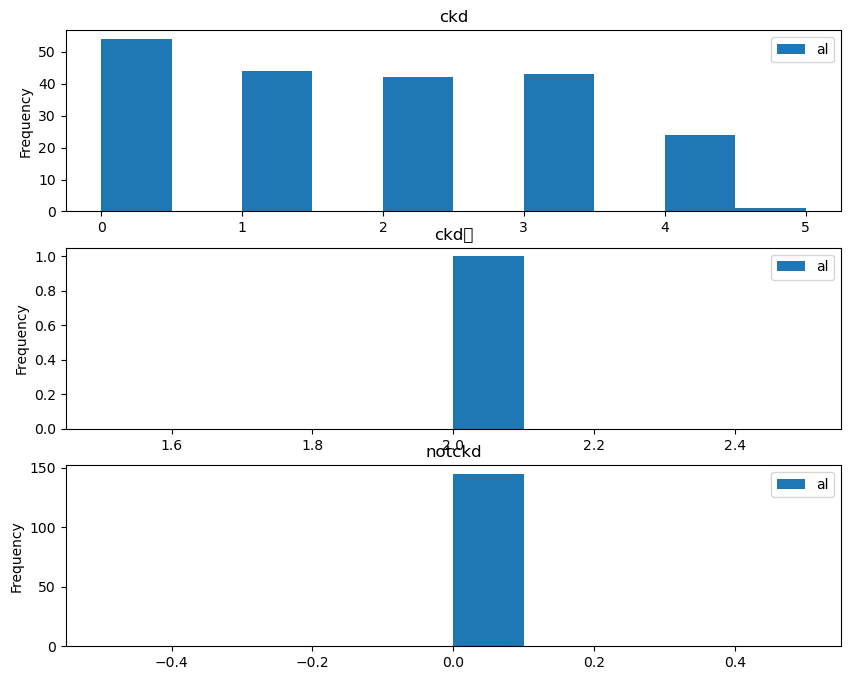

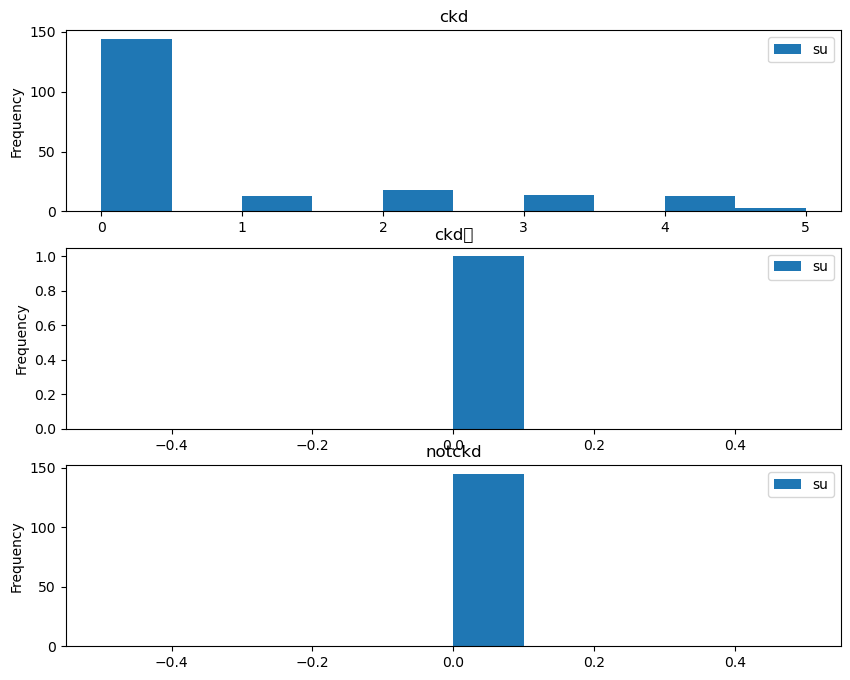

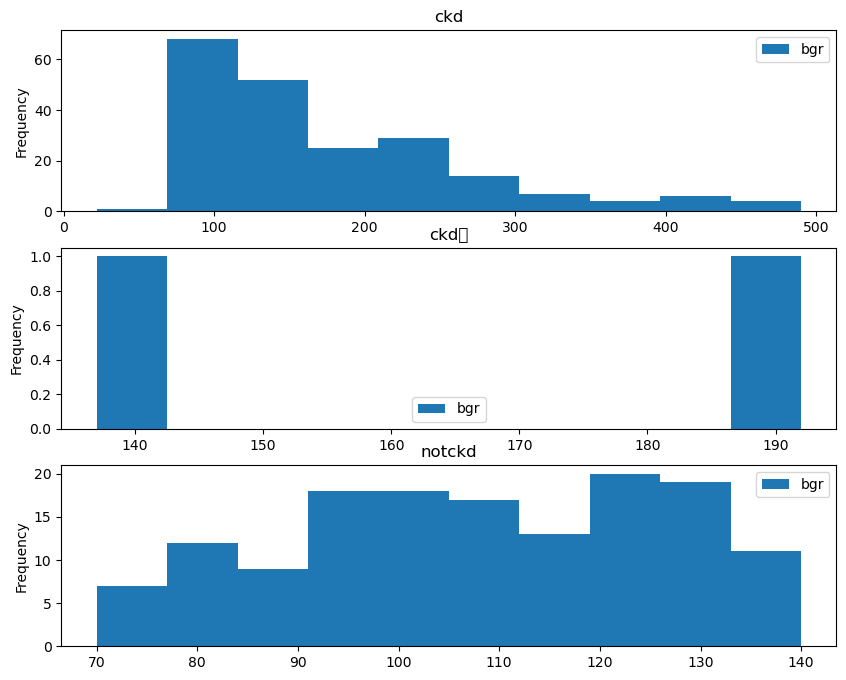

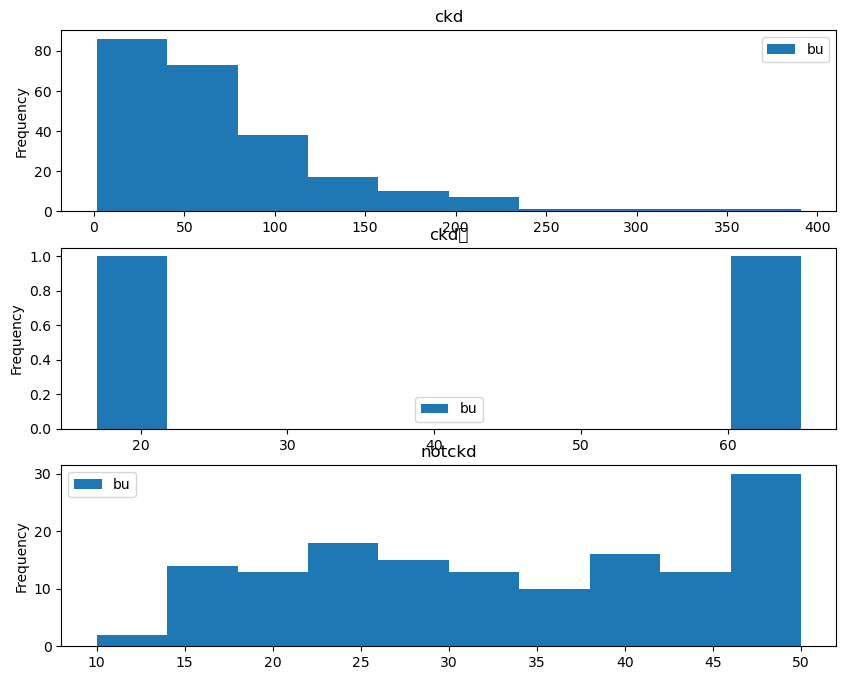

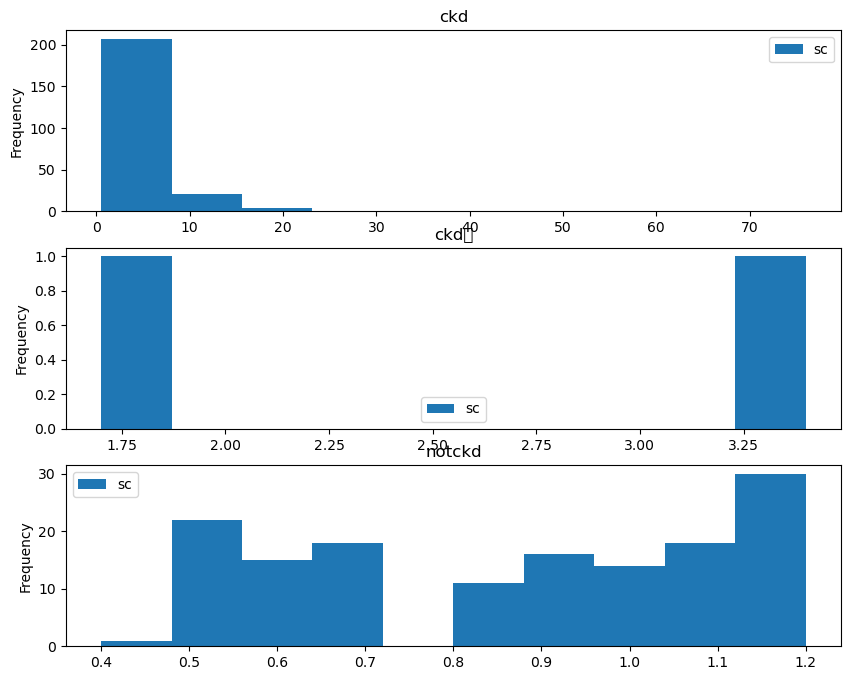

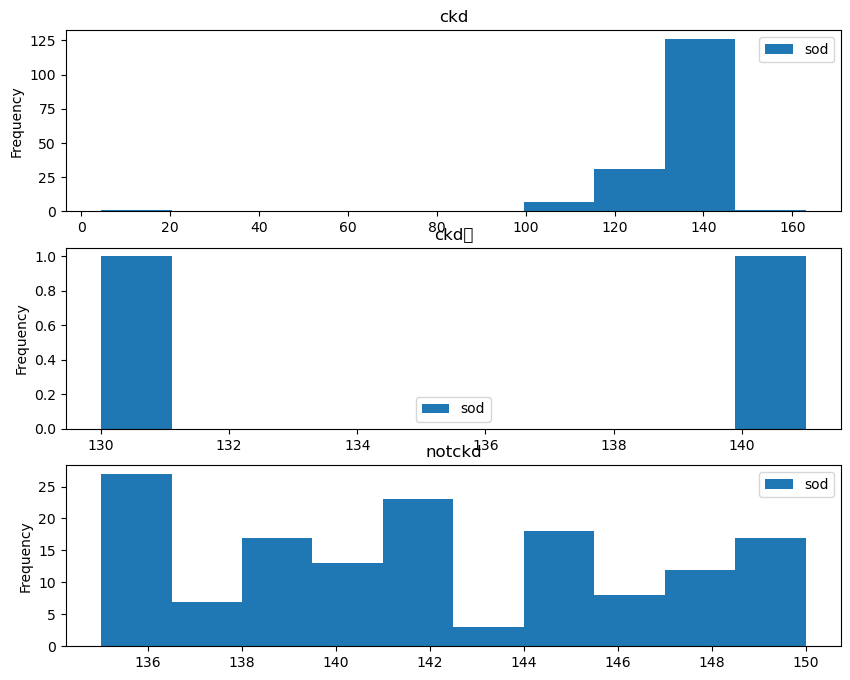

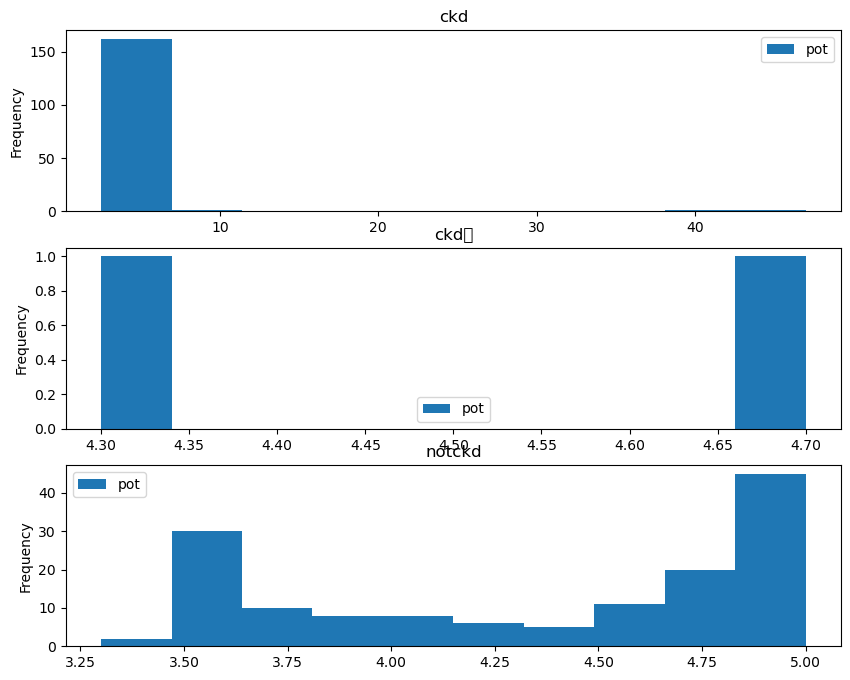

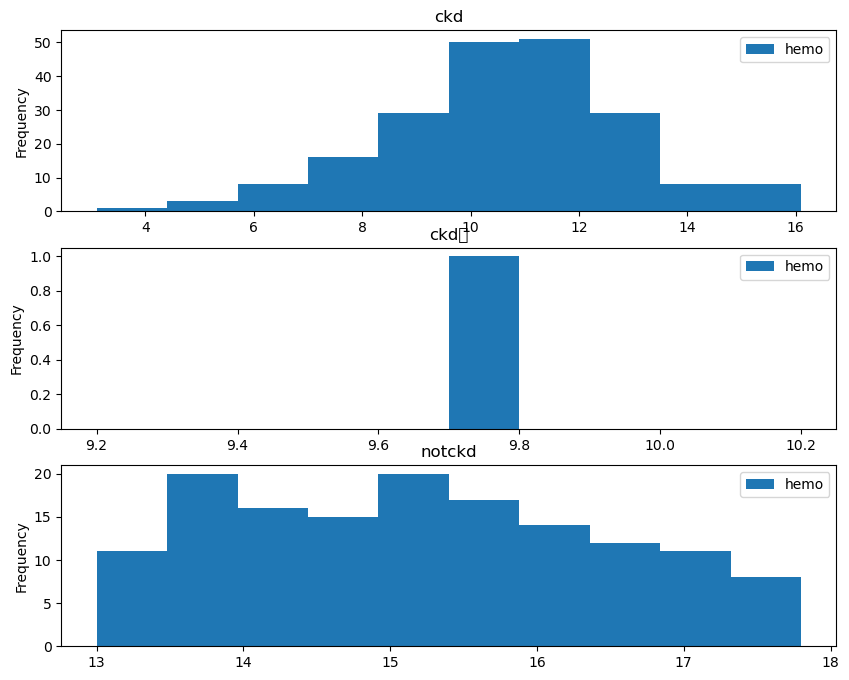

In [14]:
for feature in Numerical_Columns:
    kidney_df.plot.hist(column=feature, by='classification', figsize=(10,8))

### Distribution Plot

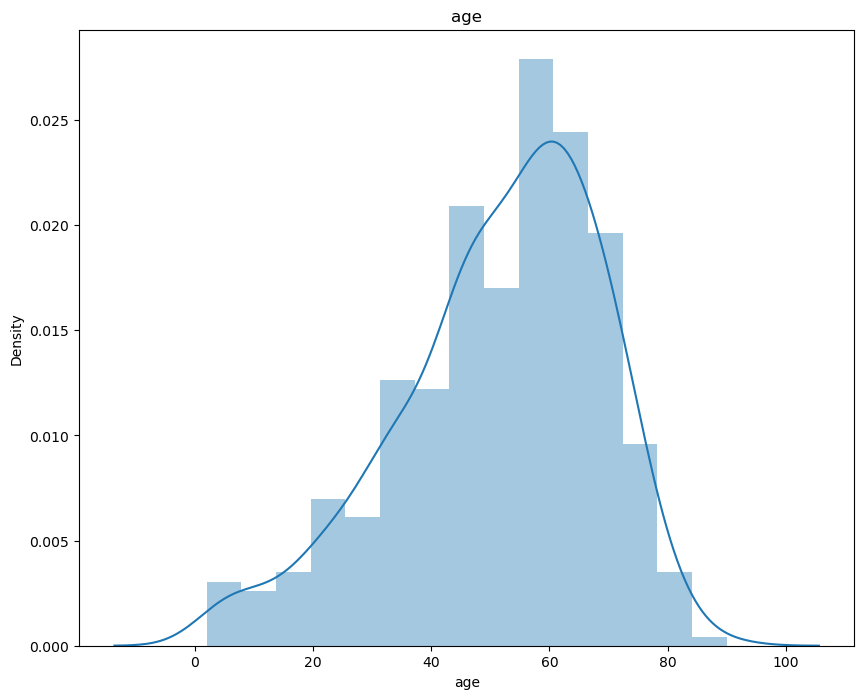

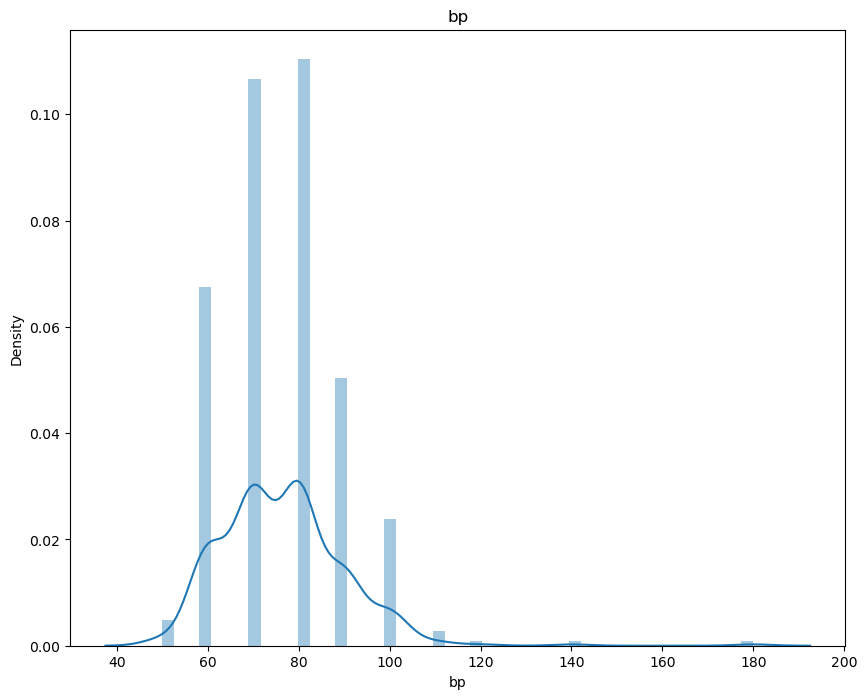

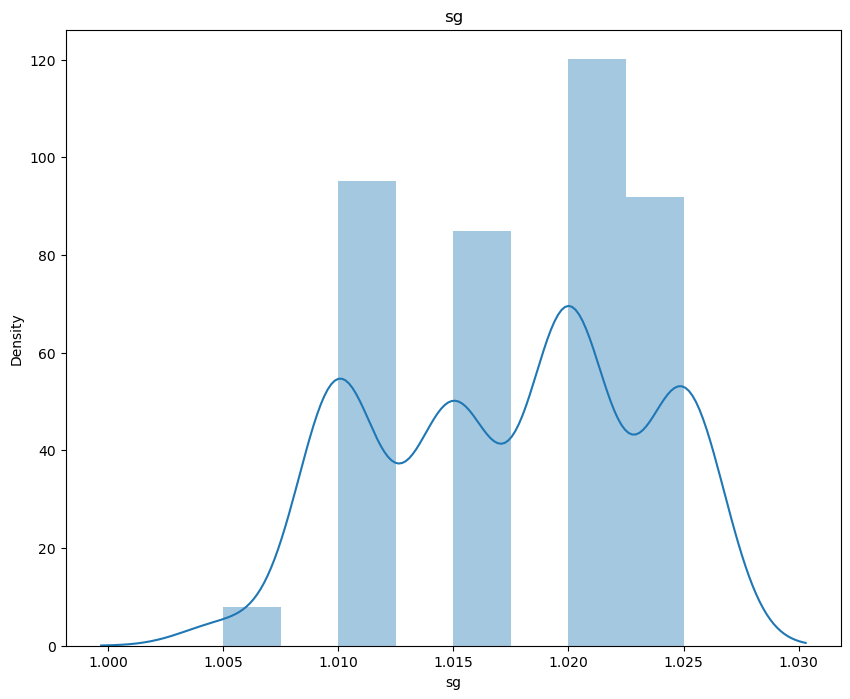

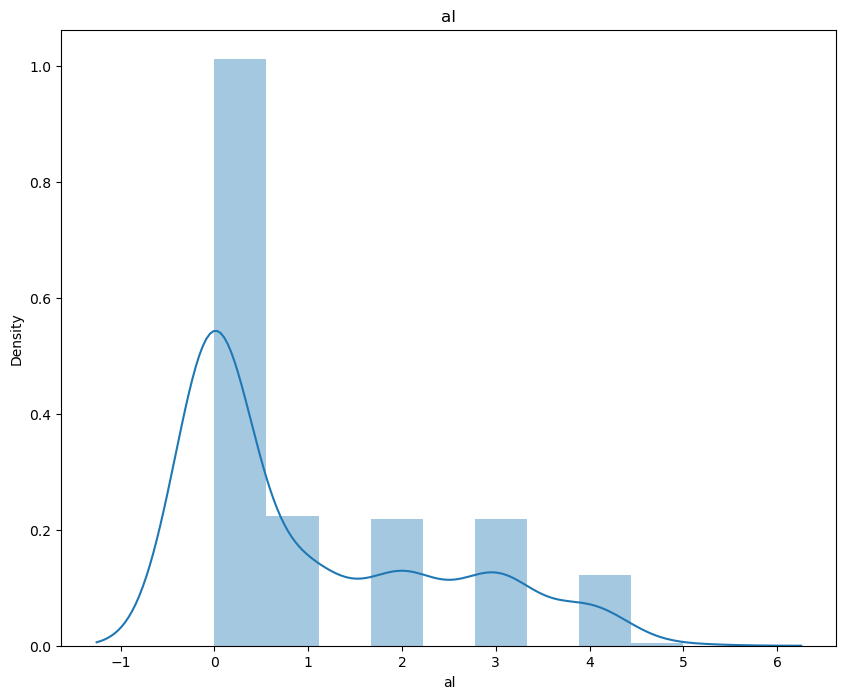

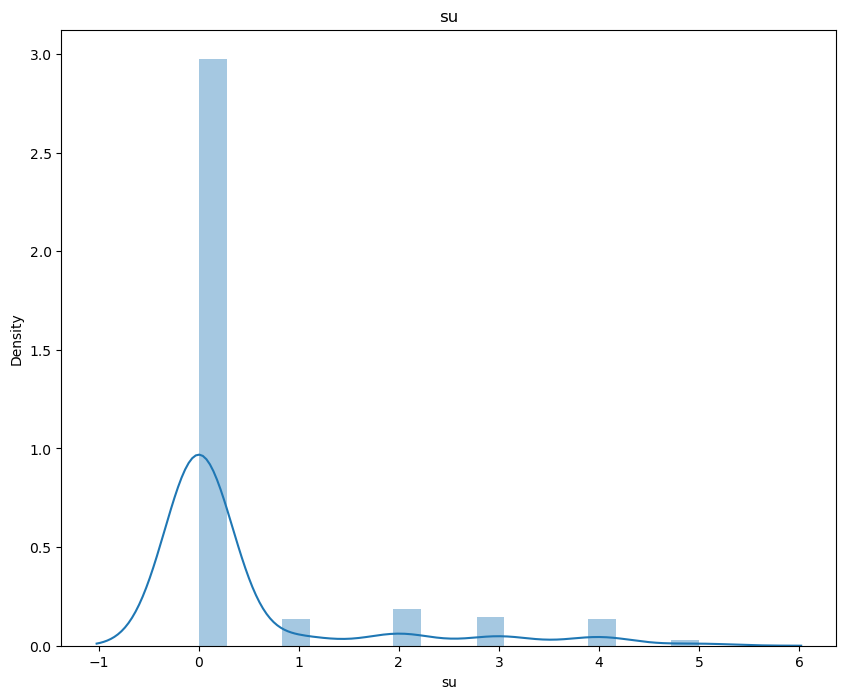

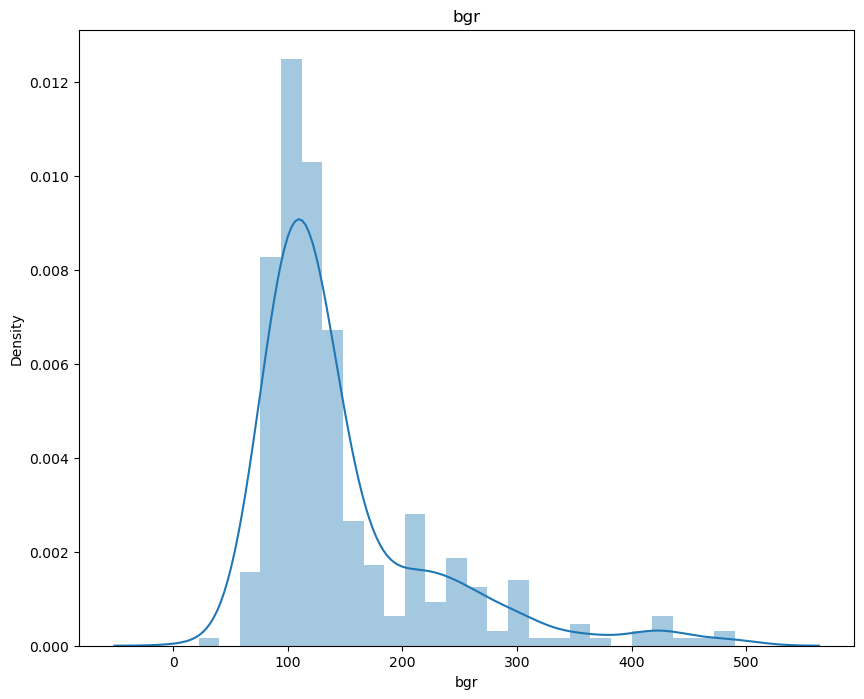

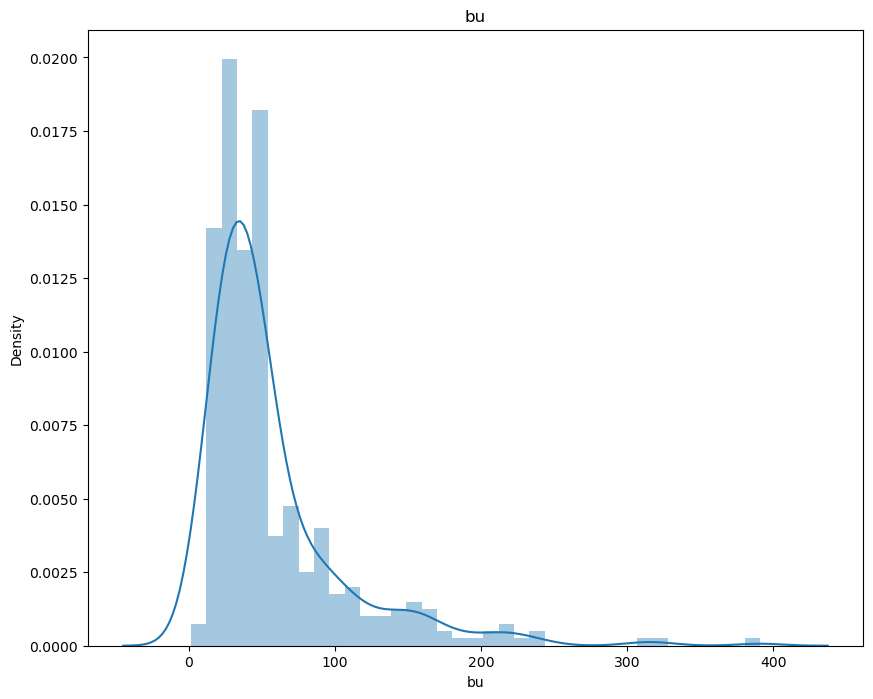

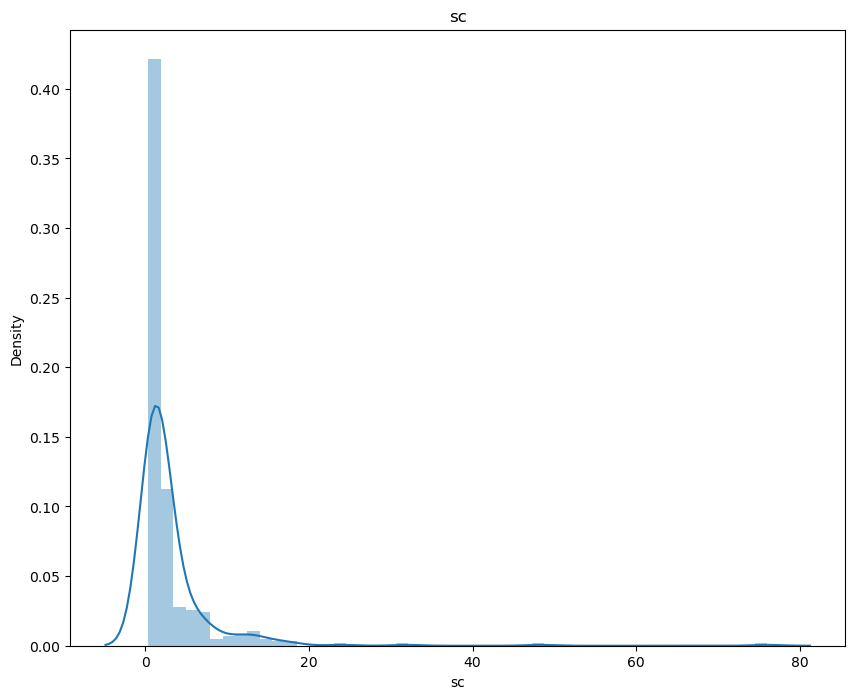

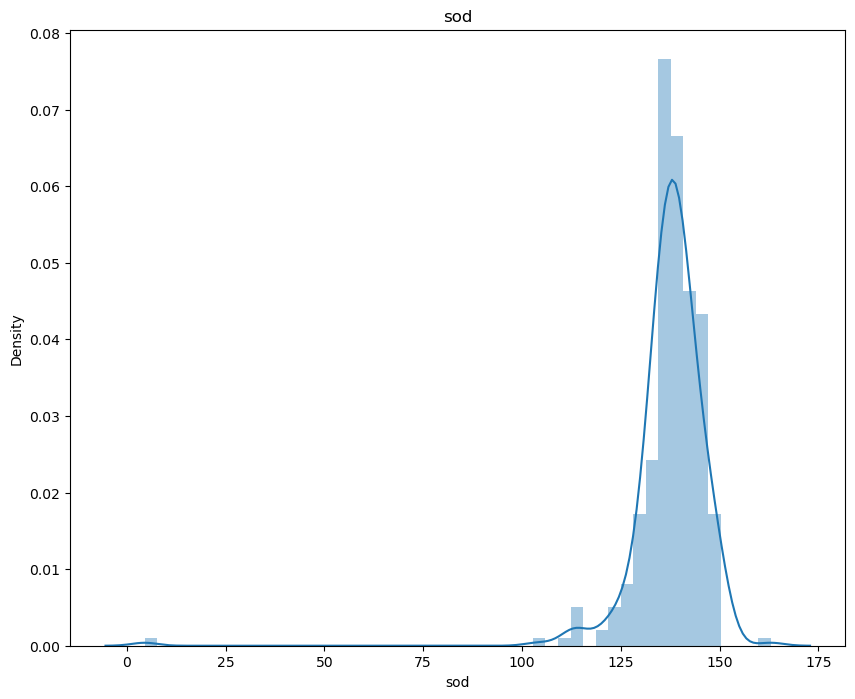

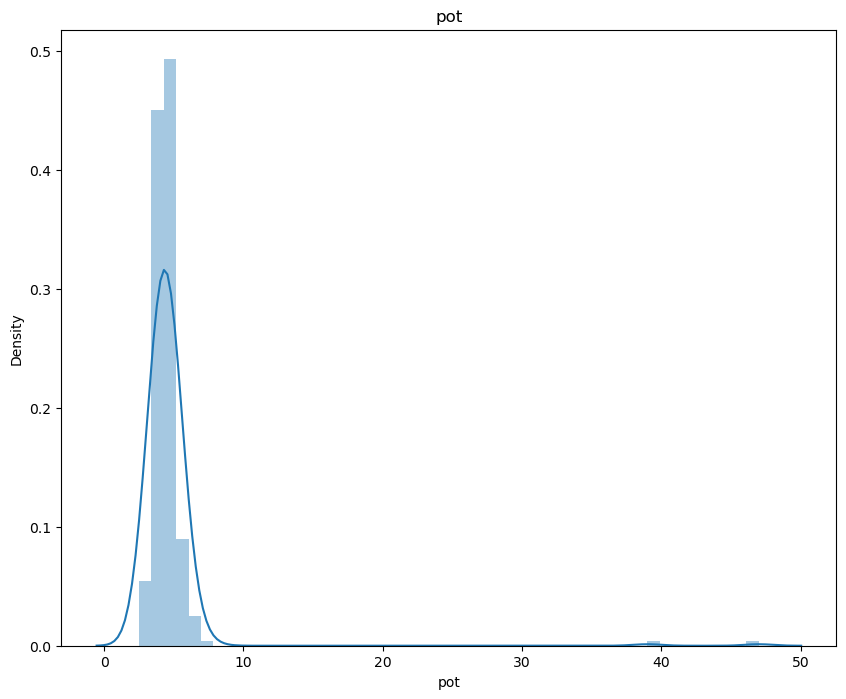

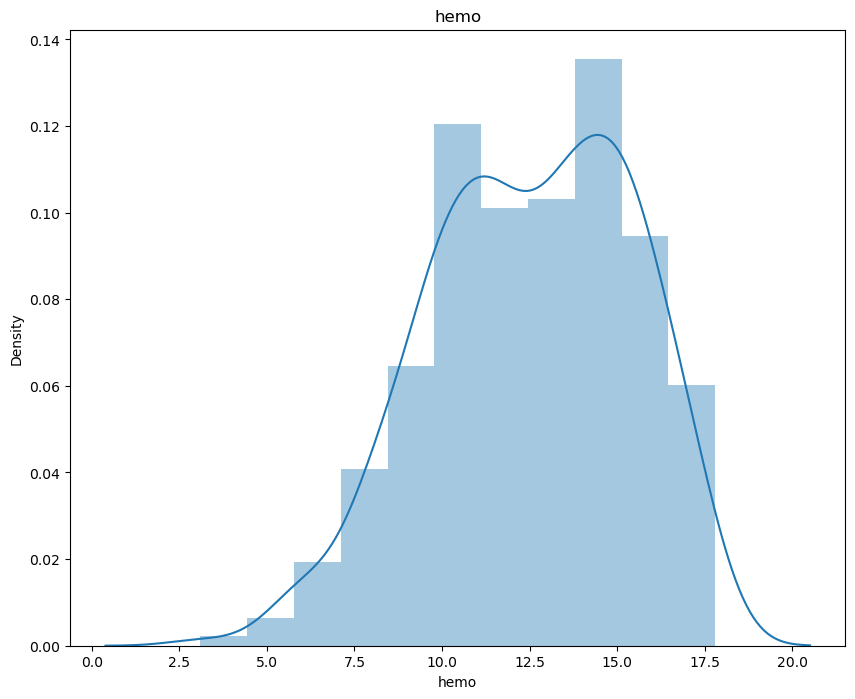

In [15]:
for feature in Numerical_Columns:
    plt.figure(figsize=(10,8))
    plt.title(feature)
    sns.distplot(kidney_df[feature])
    plt.show()
    print('\n')

### Scatter Plot

age vs bp


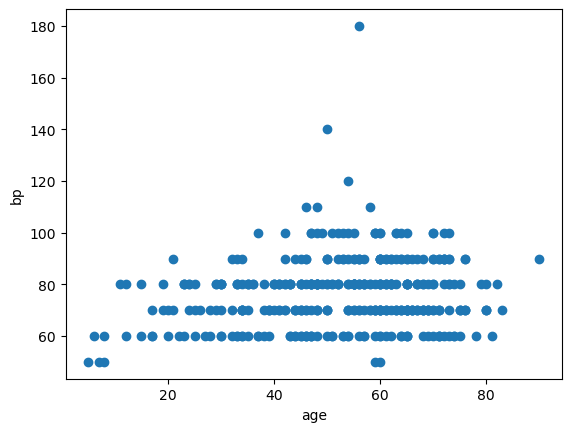



age vs sg


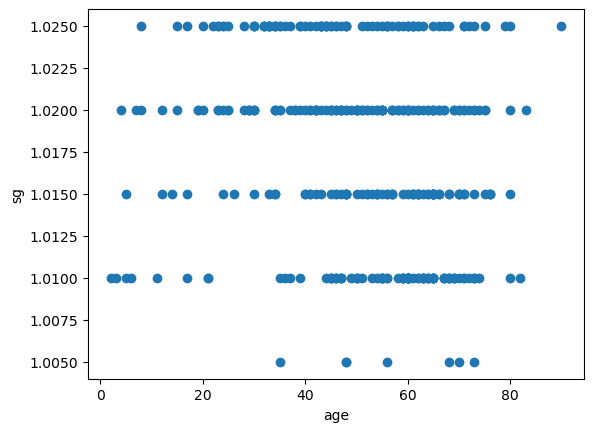



age vs al


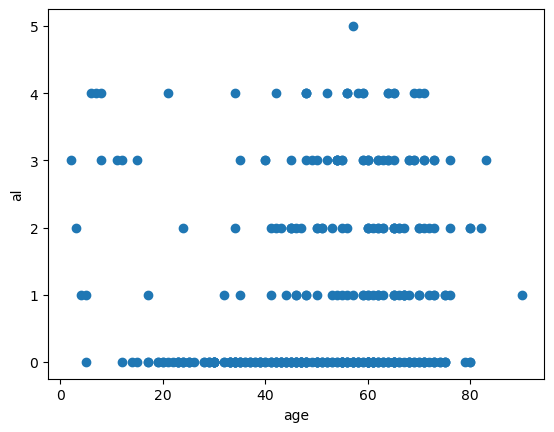



age vs su


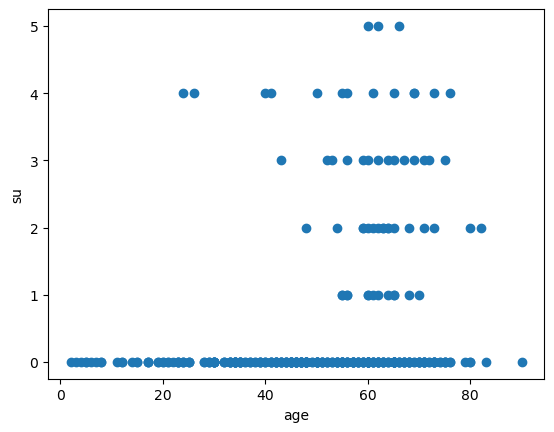



age vs bgr


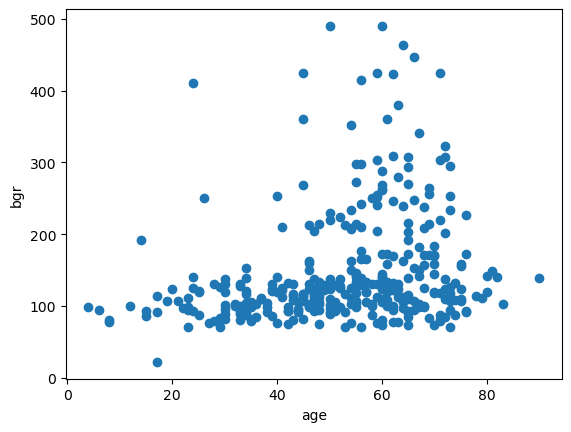



age vs bu


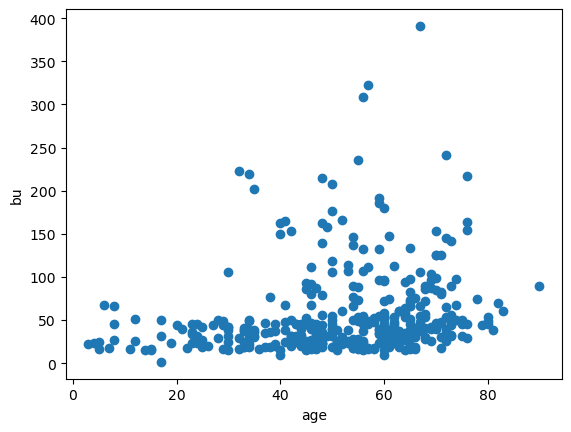



age vs sc


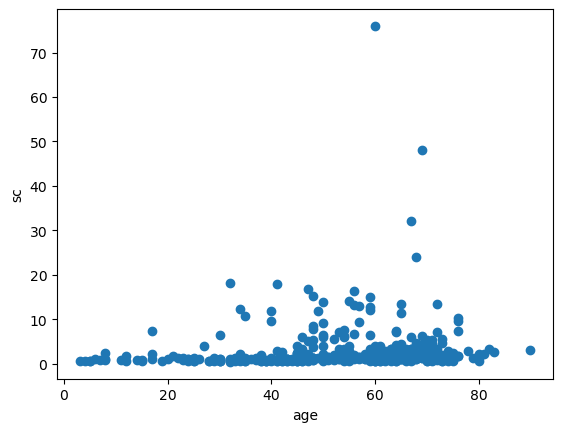



age vs sod


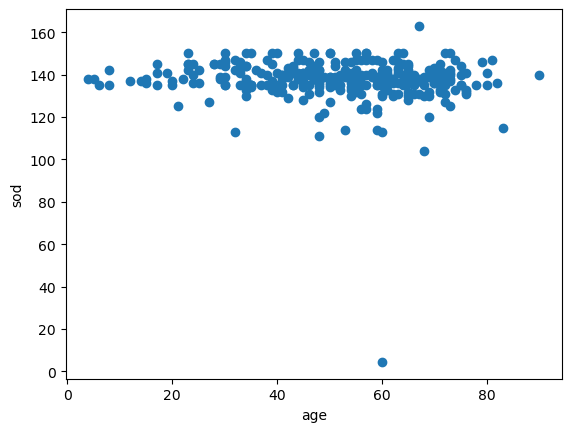



age vs pot


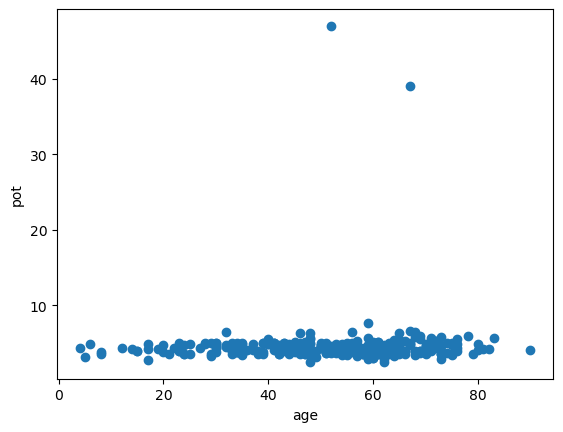



age vs hemo


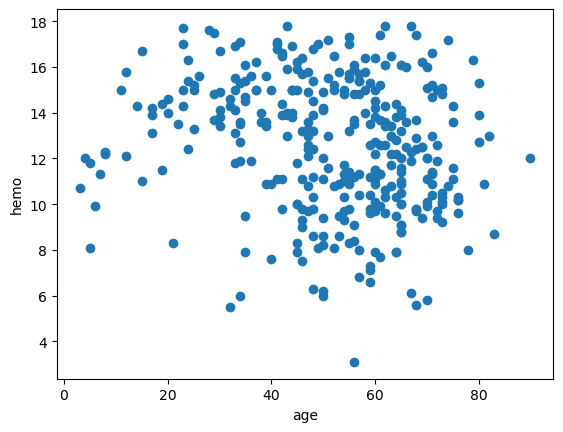



bp vs sg


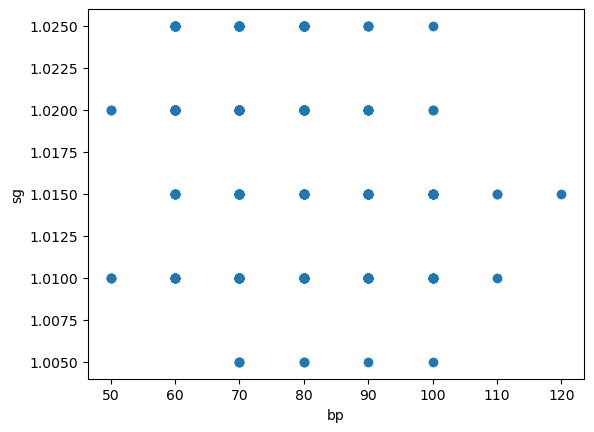



bp vs al


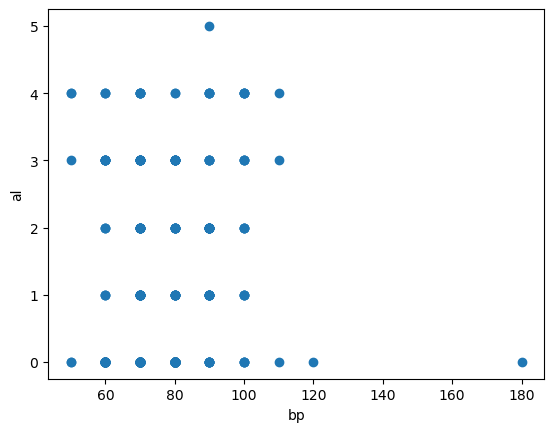



bp vs su


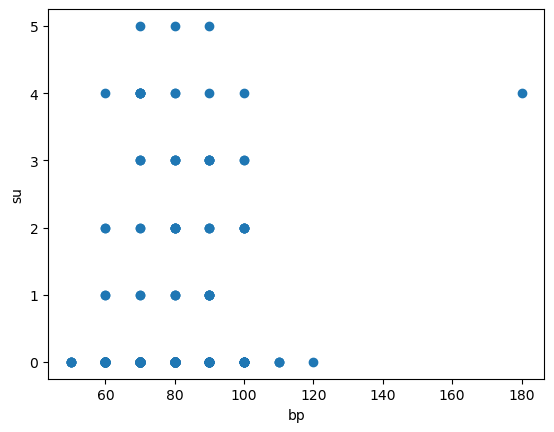



bp vs bgr


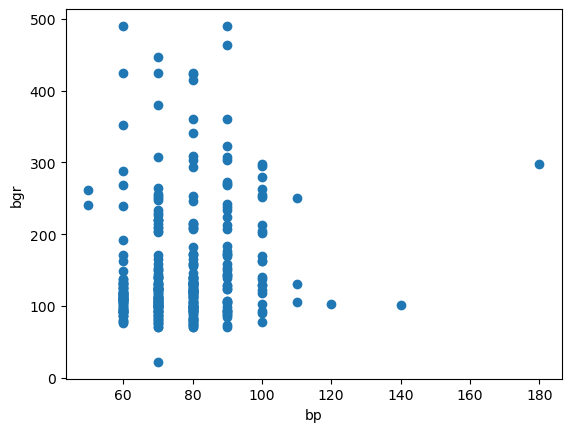



bp vs bu


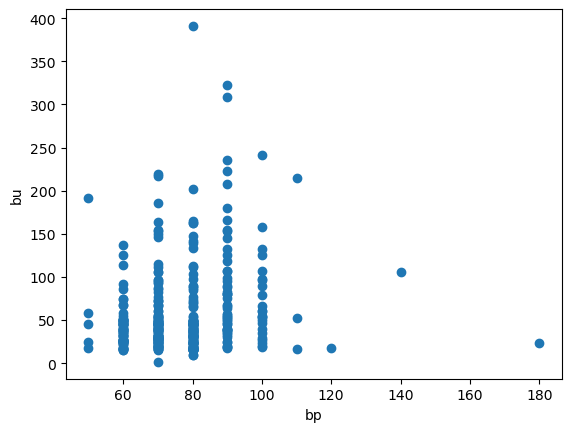



bp vs sc


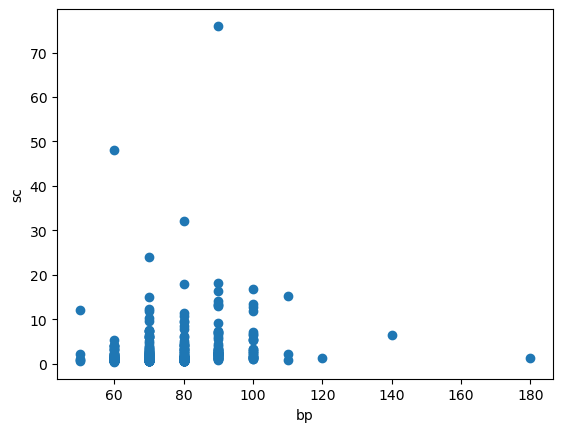



bp vs sod


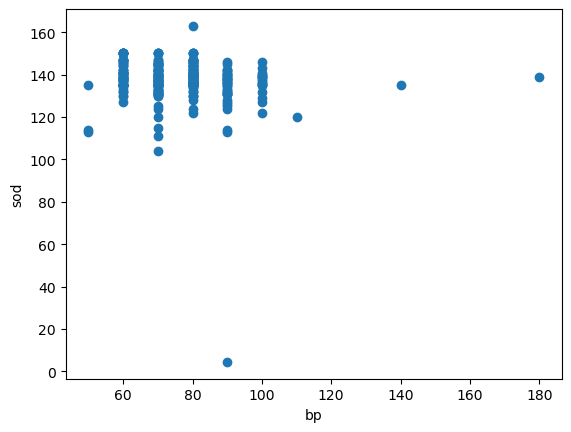



bp vs pot


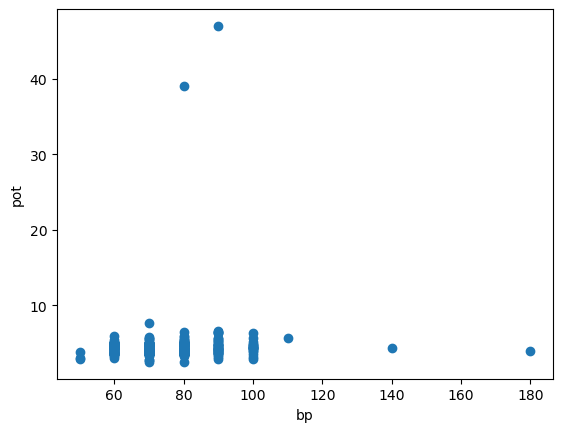



bp vs hemo


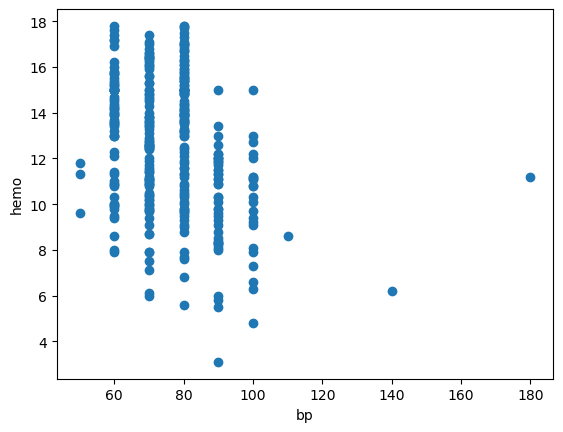



sg vs al


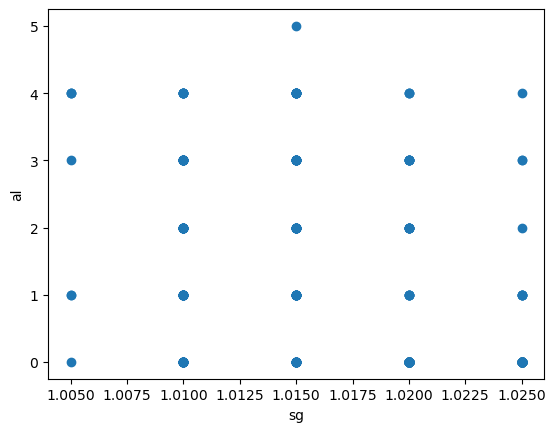



sg vs su


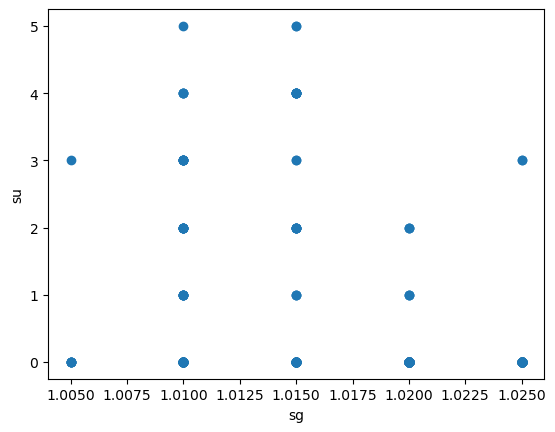



sg vs bgr


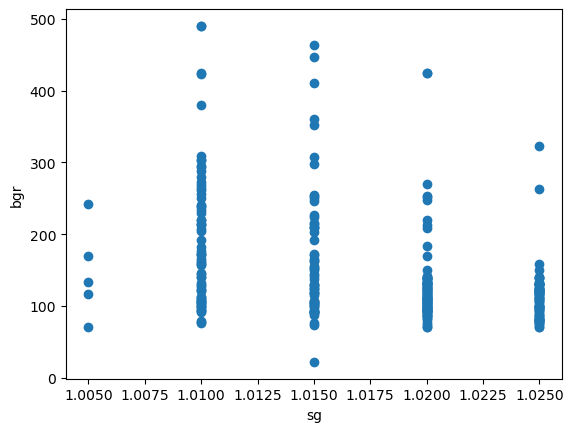



sg vs bu


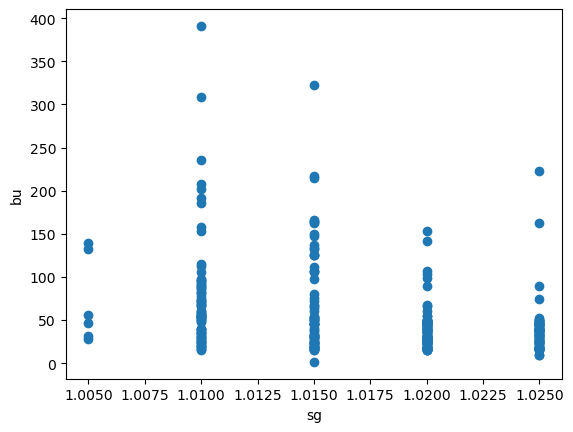



sg vs sc


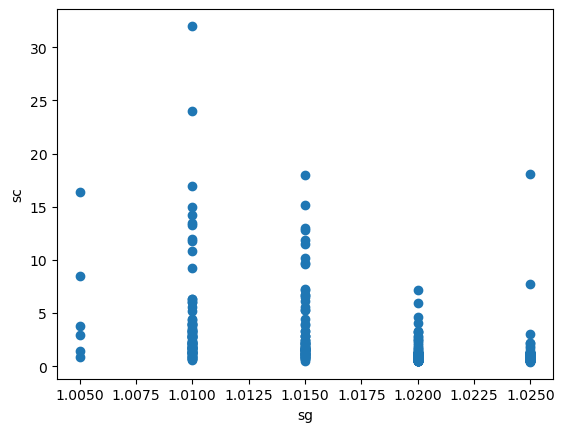



sg vs sod


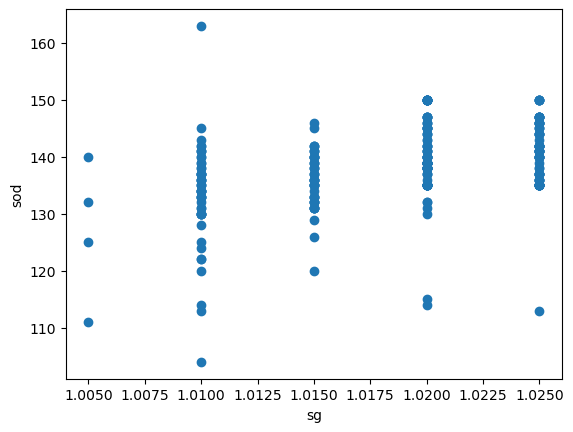



sg vs pot


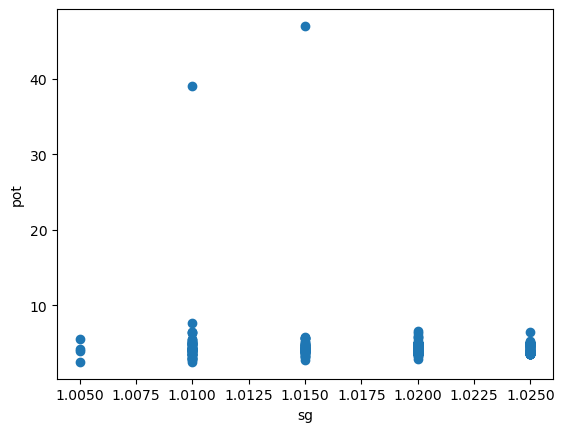



sg vs hemo


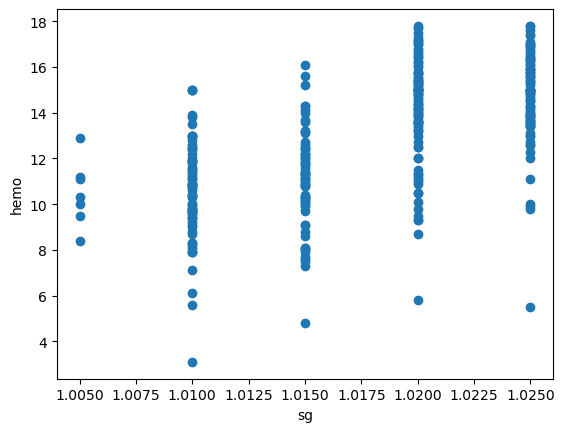



al vs su


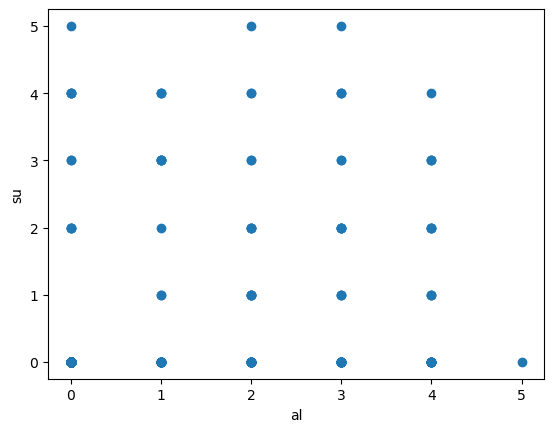



al vs bgr


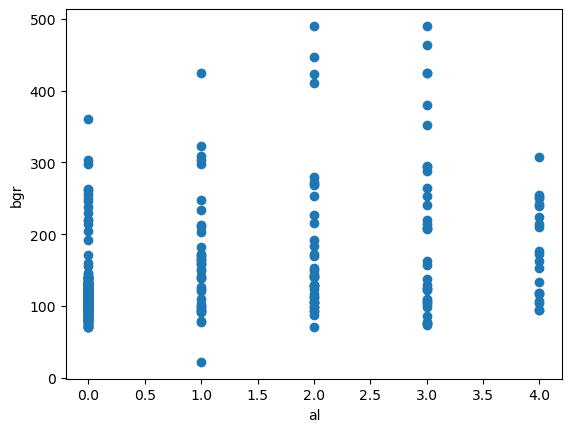



al vs bu


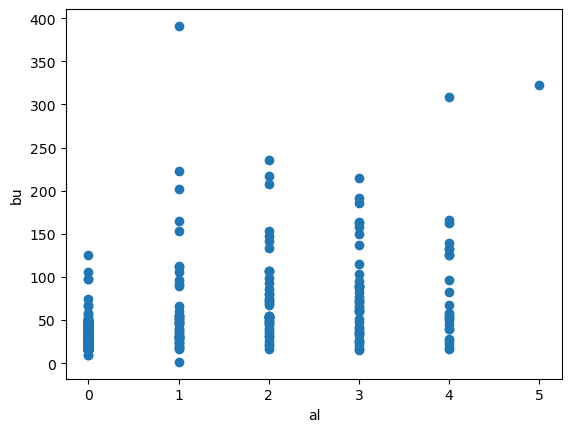



al vs sc


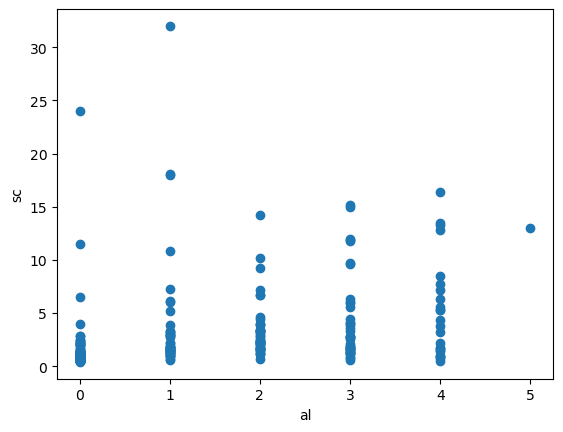



al vs sod


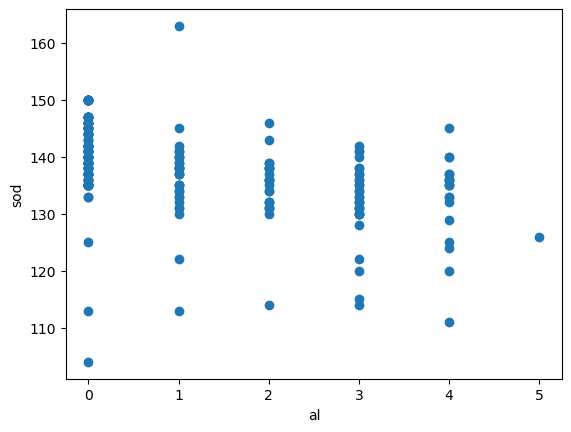



al vs pot


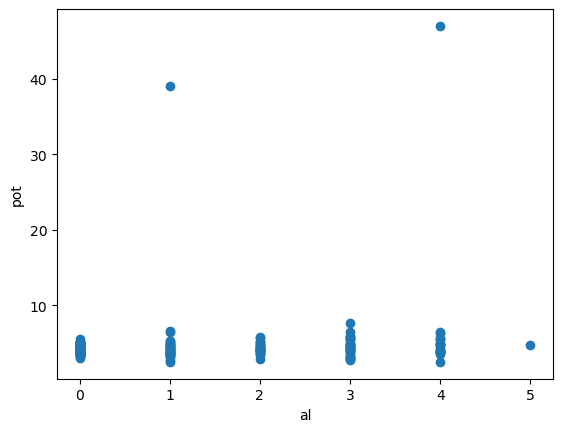



al vs hemo


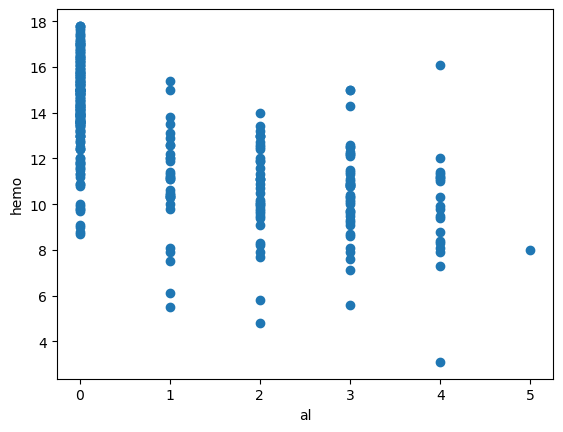



su vs bgr


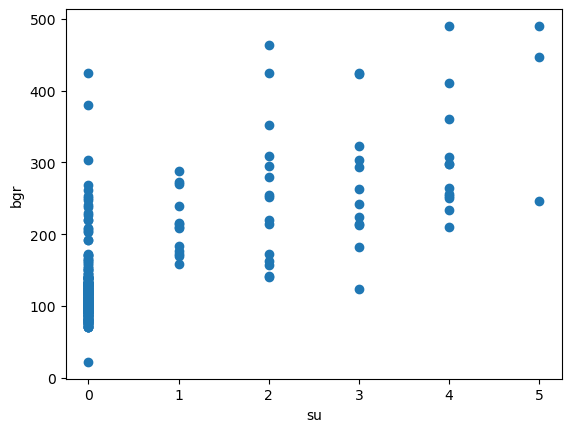



su vs bu


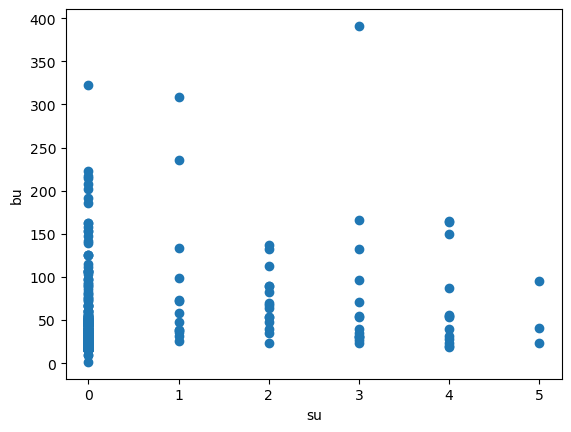



su vs sc


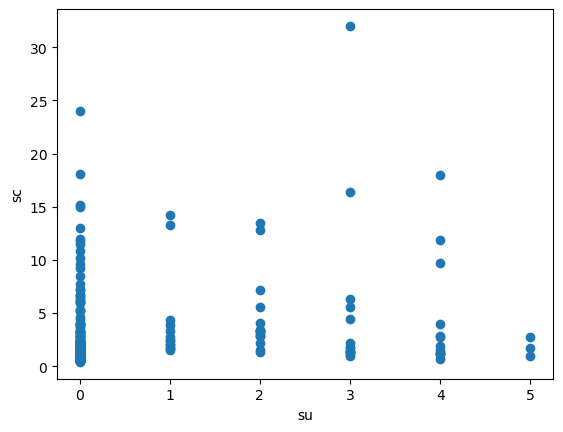



su vs sod


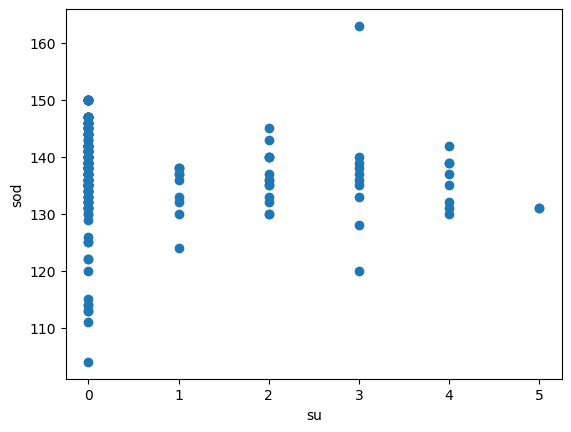



su vs pot


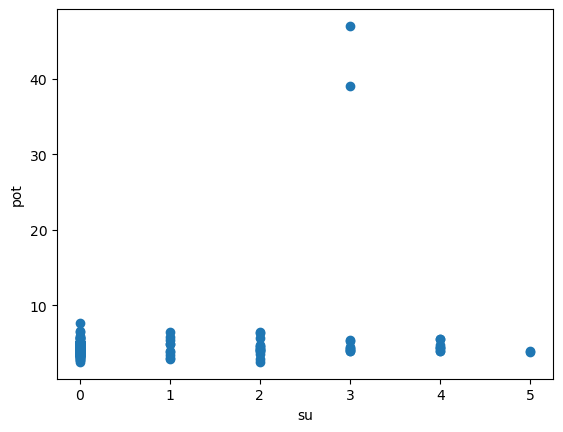



su vs hemo


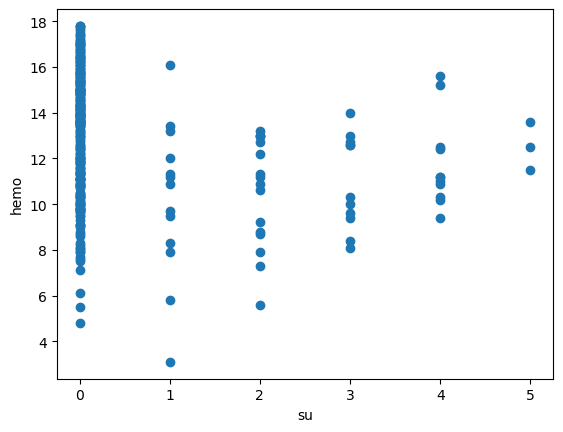



bgr vs bu


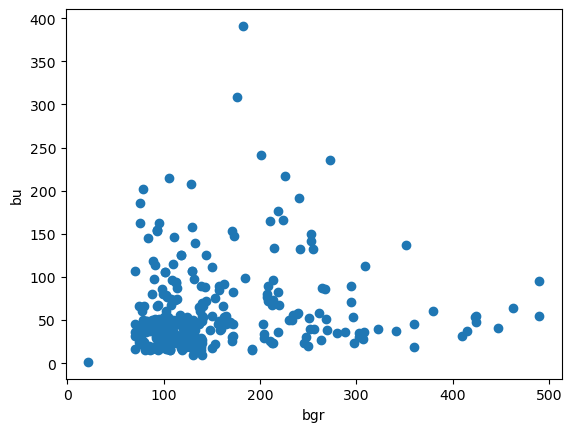



bgr vs sc


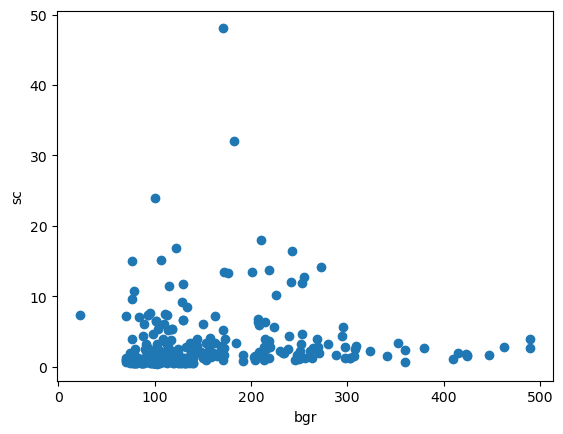



bgr vs sod


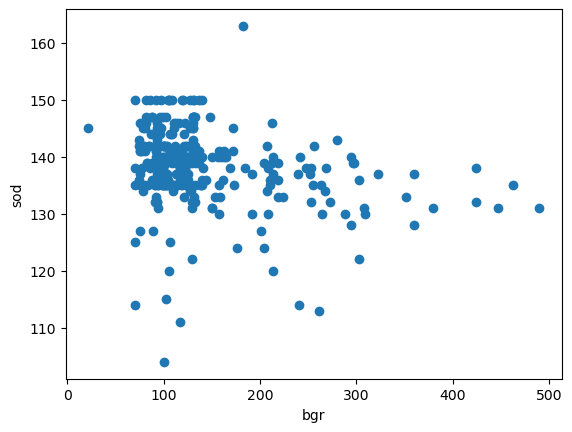



bgr vs pot


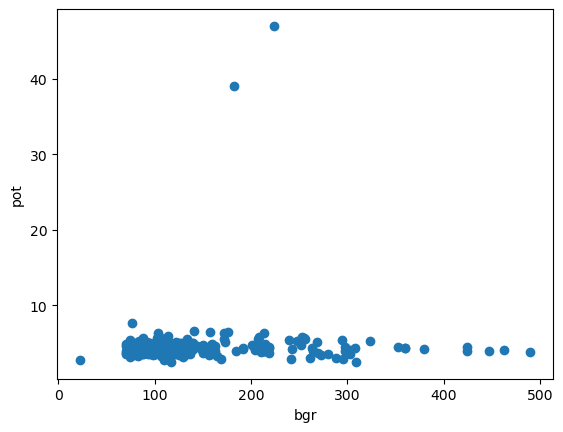



bgr vs hemo


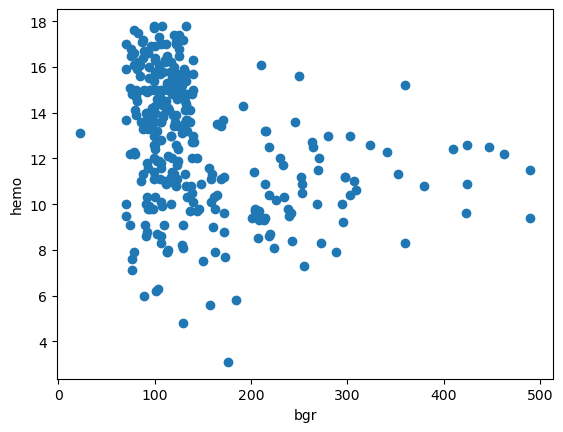



bu vs sc


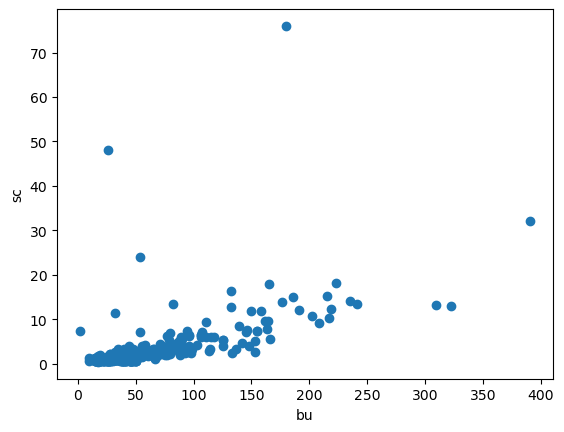



bu vs sod


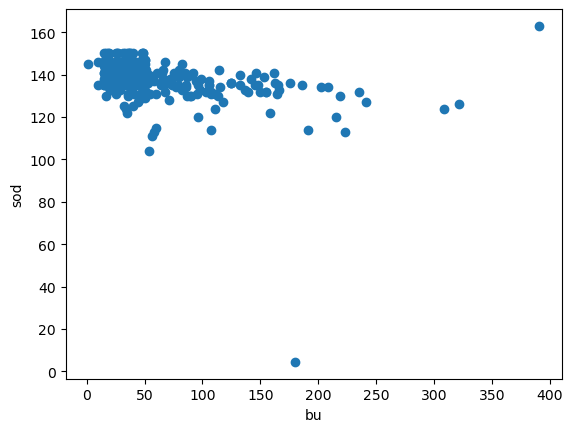



bu vs pot


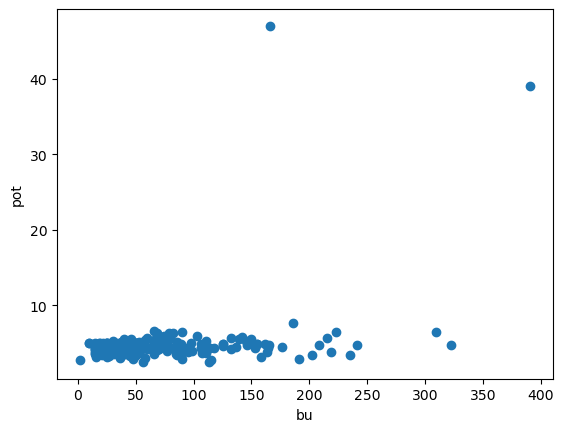



bu vs hemo


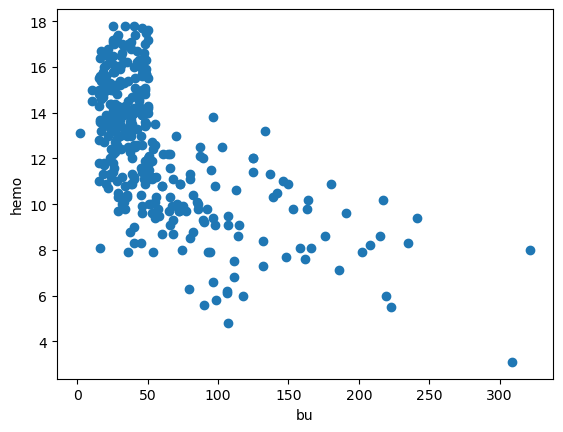



sc vs sod


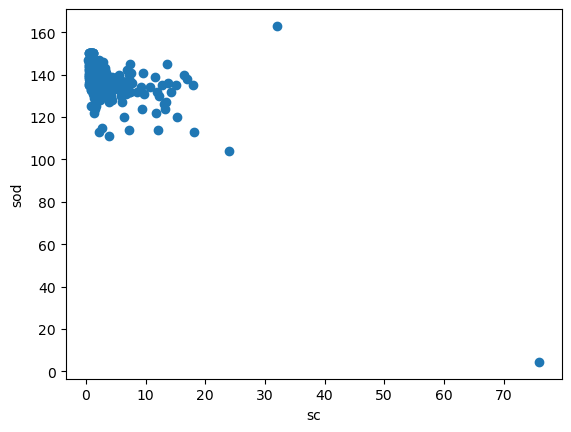



sc vs pot


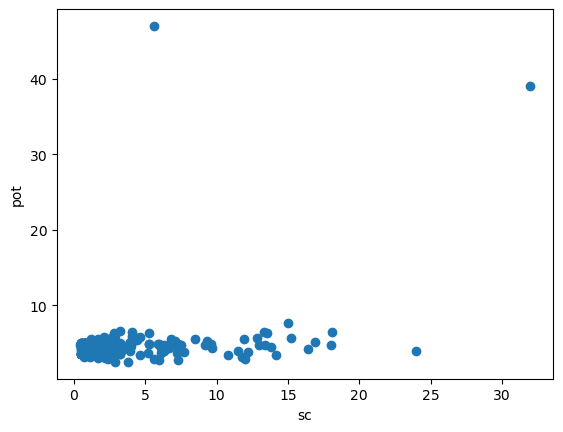



sc vs hemo


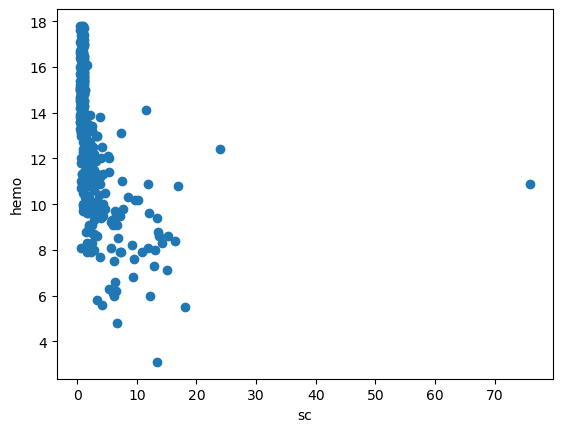



sod vs pot


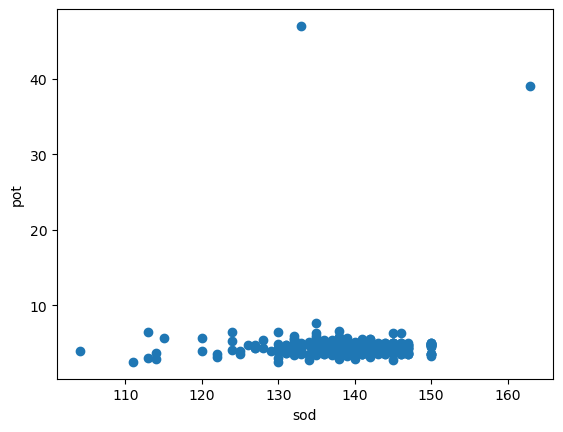



sod vs hemo


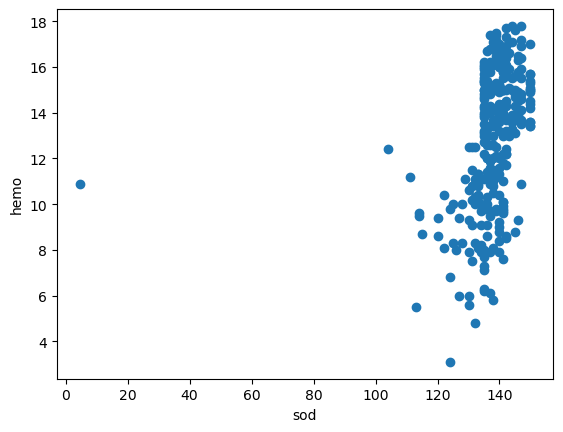



pot vs hemo


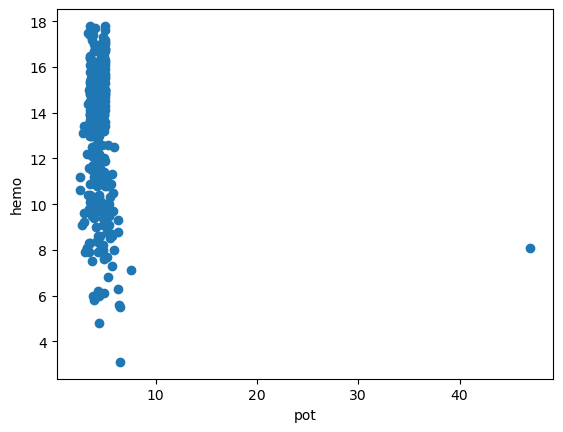

In [16]:
tmp = []
for i in Numerical_Columns:
    for j in Numerical_Columns:
        if (i == j): continue
        tmp.append(i)
        if (j in tmp): continue
        print(i, "vs", j)
        plt.xlabel(i)
        plt.ylabel(j)
        plt.scatter(x=kidney_df[i], y=kidney_df[j])
        plt.show()
        print('\n')

# 2. Processing missing values and/or outliers

In [17]:
# Function to find occurrences of '\t' in each column
def find_tab_characters(df):
    tab_values = {}
    for column in df.columns:
        # Check if the column is of object type before looking for string patterns
        if df[column].dtype == object:
            # Drop NA values for the string contains check
            contains_tab = df[column].dropna().str.contains('\t', regex=False)
            unique_values_with_tab = df[column].dropna()[contains_tab].unique()
            if len(unique_values_with_tab) > 0:
                tab_values[column] = unique_values_with_tab
    return tab_values

# Find all values that contain '\t' in each column
values_with_tab = find_tab_characters(kidney_df)
values_with_tab

{'pcv': array(['\t?', '\t43'], dtype=object),
 'wc': array(['\t6200', '\t8400', '\t?'], dtype=object),
 'rc': array(['\t?'], dtype=object),
 'dm': array(['\tno', '\tyes'], dtype=object),
 'cad': array(['\tno'], dtype=object),
 'classification': array(['ckd\t'], dtype=object)}

In [18]:
# Define a cleaning function
def clean_tab_values(df):
    # Iterate over each column and replace '\t' with '' and strip whitespace
    for column in df.columns:
        if df[column].dtype == object:
            df[column] = df[column].str.replace('\t', '', regex=False).str.strip()
    return df

# Apply the cleaning function to the kidney_df
kidney_df = clean_tab_values(kidney_df.copy())

# Check the unique values again to ensure cleaning has been successful
cleaned_values_check = find_tab_characters(kidney_df)
cleaned_values_check

{}

Remove Rows with classification == 'ckd\t'

In [19]:
kidney_df[kidney_df['classification'] == 'ckd\t'].index

Index([], dtype='int64')

In [20]:
kidney_df.drop(index=kidney_df[kidney_df['classification'] == 'ckd\t'].index, inplace=True)

In [21]:
kidney_df.shape

(400, 25)

In [22]:
print(kidney_df.isnull().any())
print("\n")
print(kidney_df.isnull().sum())

age                True
bp                 True
sg                 True
al                 True
su                 True
rbc                True
pc                 True
pcc                True
ba                 True
bgr                True
bu                 True
sc                 True
sod                True
pot                True
hemo               True
pcv                True
wc                 True
rc                 True
htn                True
dm                 True
cad                True
appet              True
pe                 True
ane                True
classification    False
dtype: bool


age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc          

In [23]:
kidney_df.head(5)

age    bp     sg   al   su     rbc        pc         pcc          ba  \
0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

     bgr  ...  pcv    wc   rc  htn   dm cad appet   pe  ane classification  
0  121.0  ...   44  7800  5.2  yes  yes  no  good   no   no            ckd  
1    NaN  ...   38  6000  NaN   no   no  no  good   no   no            ckd  
2  423.0  ...   31  7500  NaN   no  yes  no  poor   no  yes            ckd  
3  117.0  ...   32  6700  3.9  yes   no  no  poor  yes  yes            ckd  
4  106.0  ...   35  7300  4.6   no   no  no  good   no   no            ckd  

[5 rows x 25 columns]

Fill Missing Values for Numerical Columns with median (because from the boxplot, they do have lots of outliers)

In [24]:
kidney_df_clean = kidney_df.copy()

In [25]:
for feature in Numerical_Columns:
    kidney_df_clean[feature].fillna(kidney_df_clean[feature].median(), inplace=True)

In [26]:
print(kidney_df_clean.isnull().any())
print("\n")
print(kidney_df_clean.isnull().sum())

age               False
bp                False
sg                False
al                False
su                False
rbc                True
pc                 True
pcc                True
ba                 True
bgr               False
bu                False
sc                False
sod               False
pot               False
hemo              False
pcv                True
wc                 True
rc                 True
htn                True
dm                 True
cad                True
appet              True
pe                 True
ane                True
classification    False
dtype: bool


age                 0
bp                  0
sg                  0
al                  0
su                  0
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                 0
bu                  0
sc                  0
sod                 0
pot                 0
hemo                0
pcv                70
wc                105
rc          

Fill Missing Values of Categorical Columns with Mode

In [27]:
# Fill missing values in categorical columns with their mode
for feature in Categorical_Columns:
    mode_value = kidney_df_clean[feature].mode()[0]  # Get the mode value for the column
    kidney_df_clean[feature] = kidney_df_clean[feature].fillna(mode_value)

In [28]:
print(kidney_df_clean.isnull().any())
print("\n")
print(kidney_df_clean.isnull().sum())

age               False
bp                False
sg                False
al                False
su                False
rbc               False
pc                False
pcc               False
ba                False
bgr               False
bu                False
sc                False
sod               False
pot               False
hemo              False
pcv               False
wc                False
rc                False
htn               False
dm                False
cad               False
appet             False
pe                False
ane               False
classification    False
dtype: bool


age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm    

## Using Box Plot to see Outliers

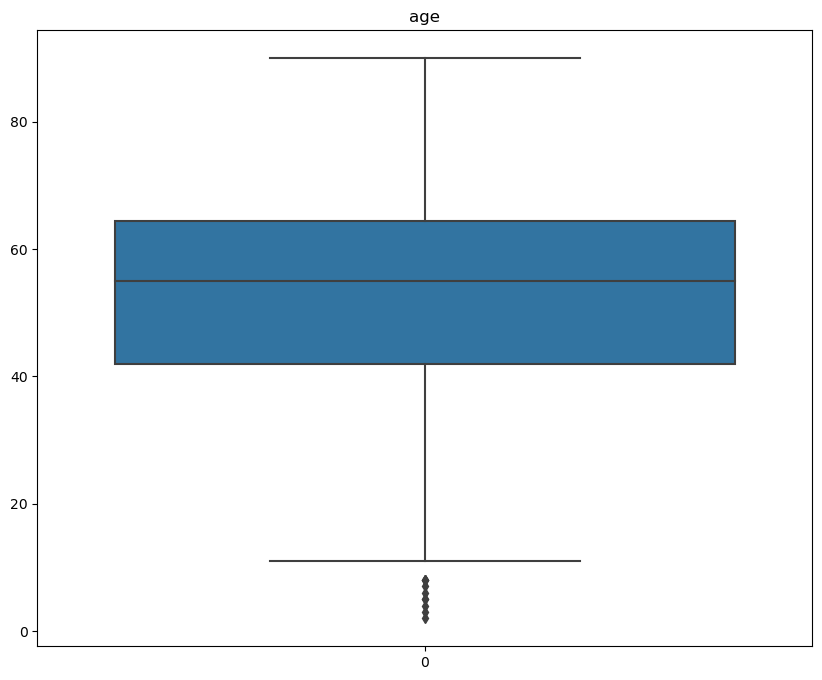

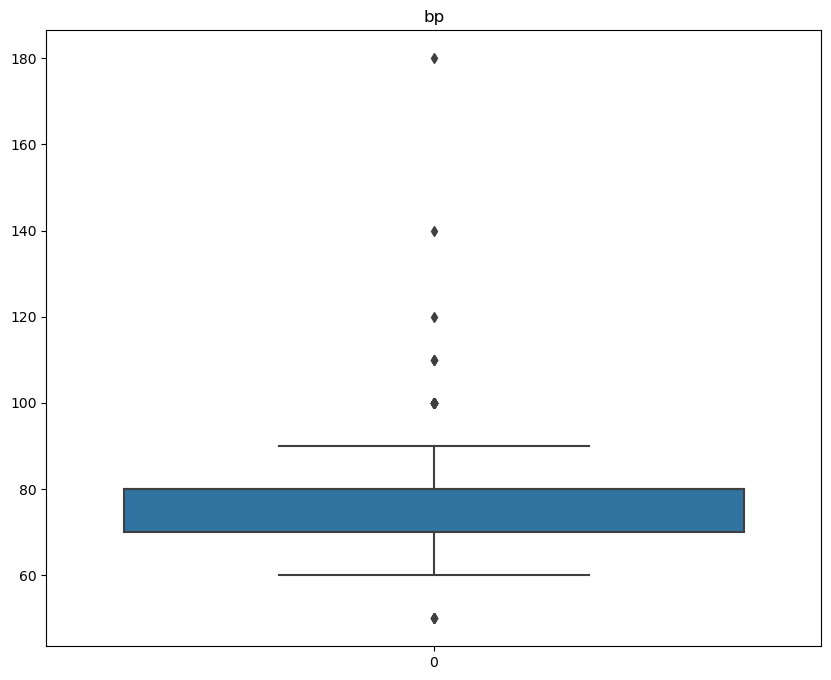

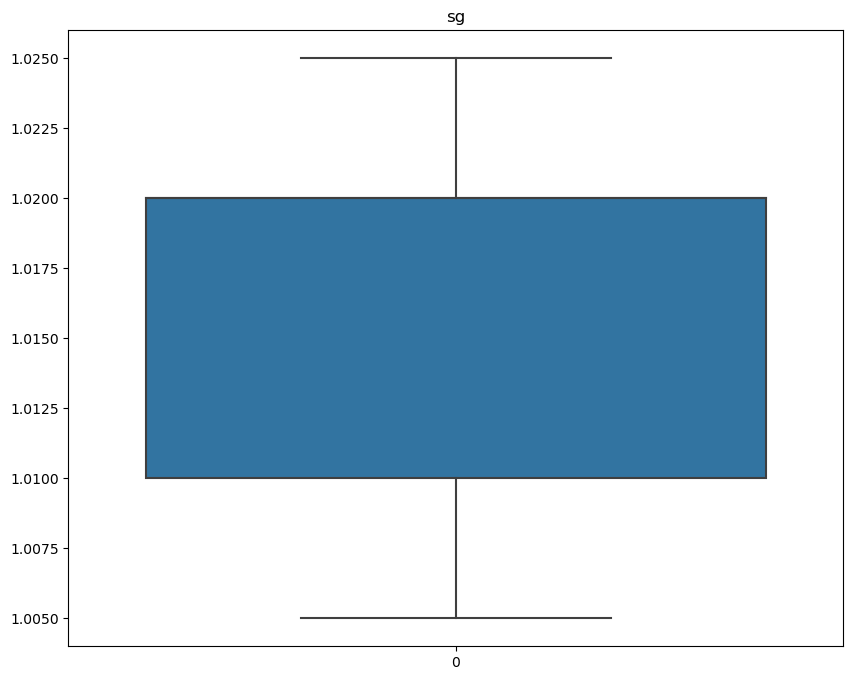

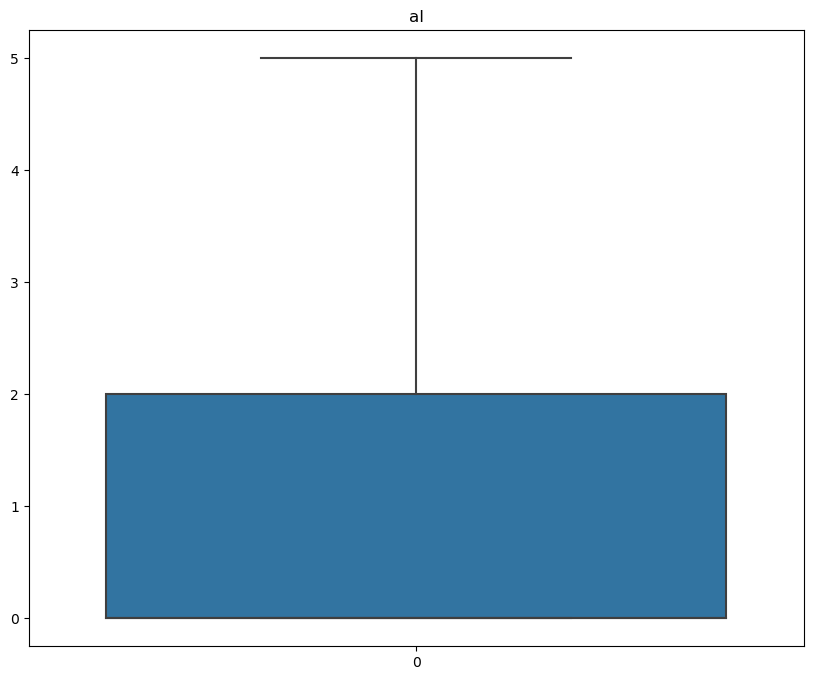

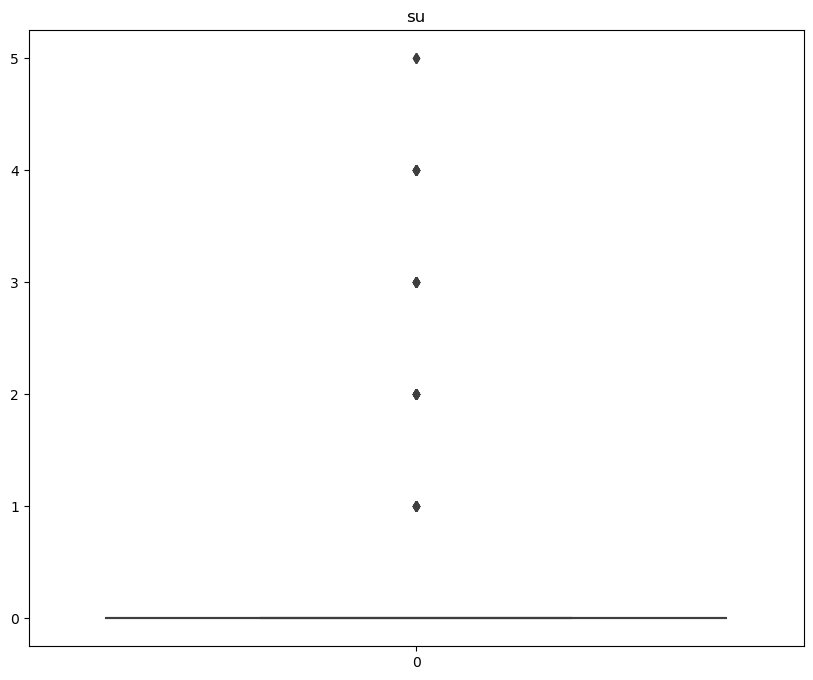

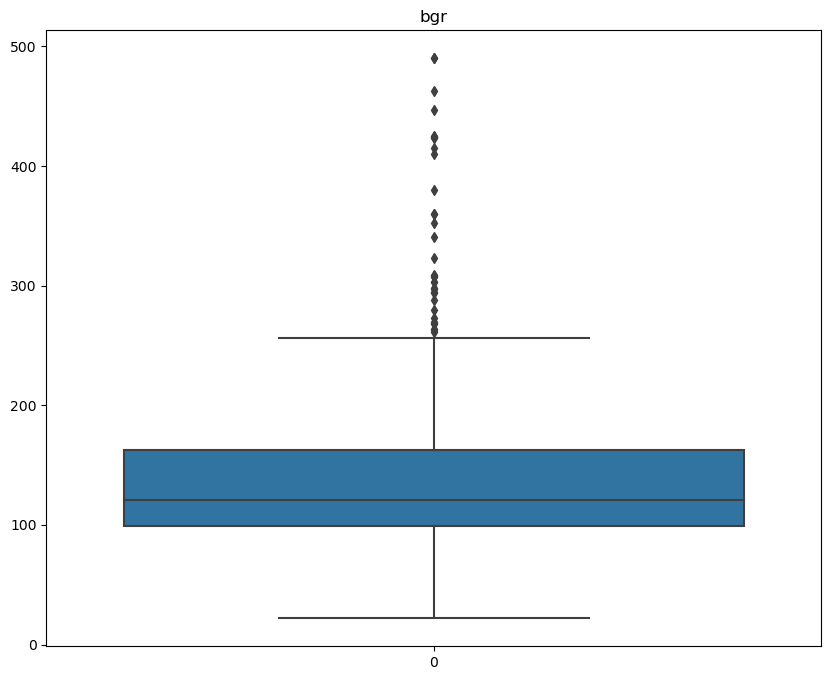

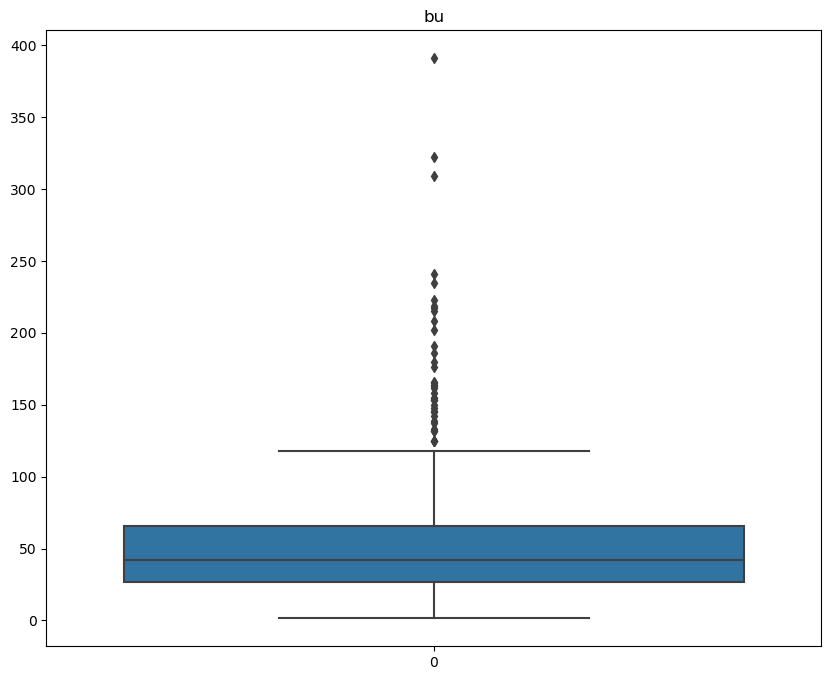

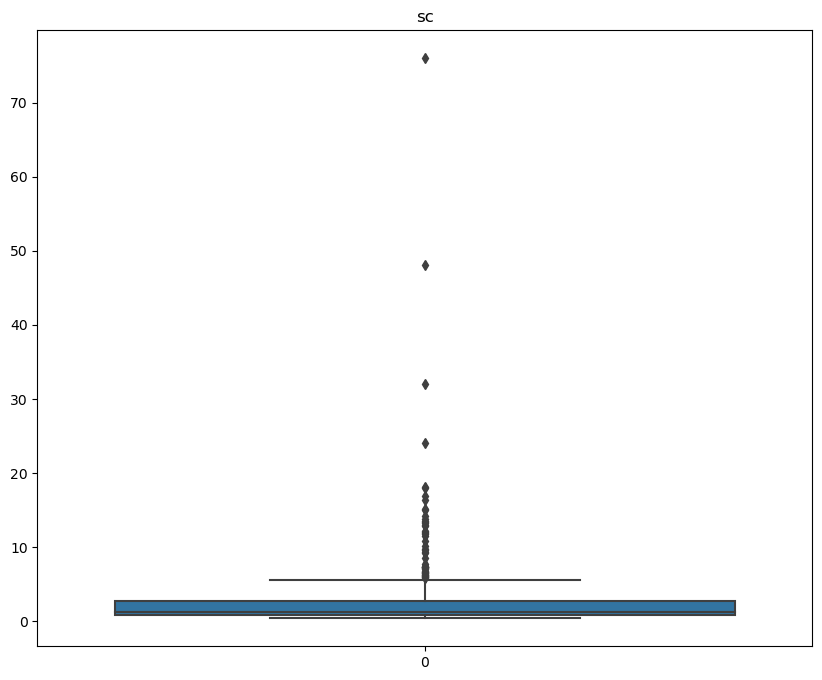

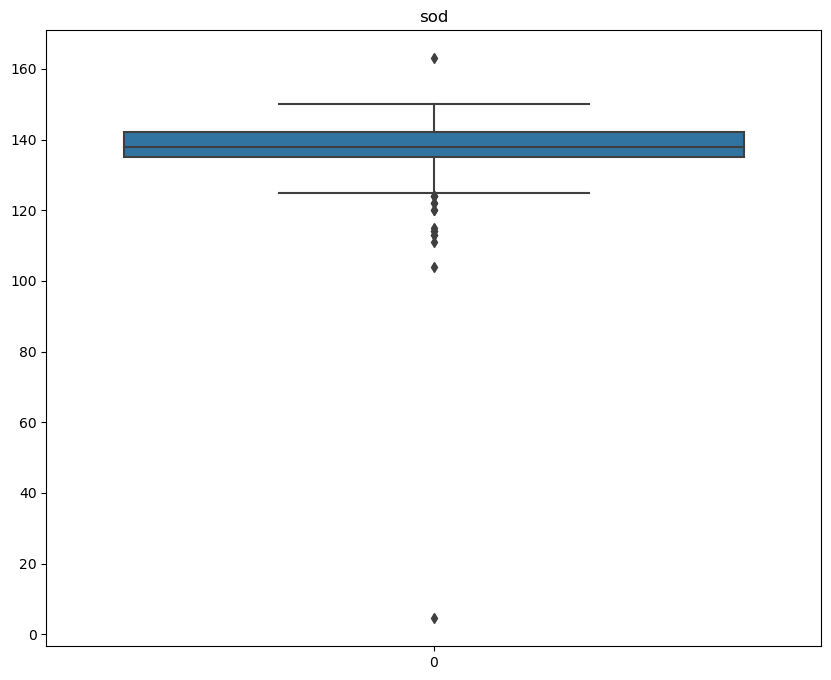

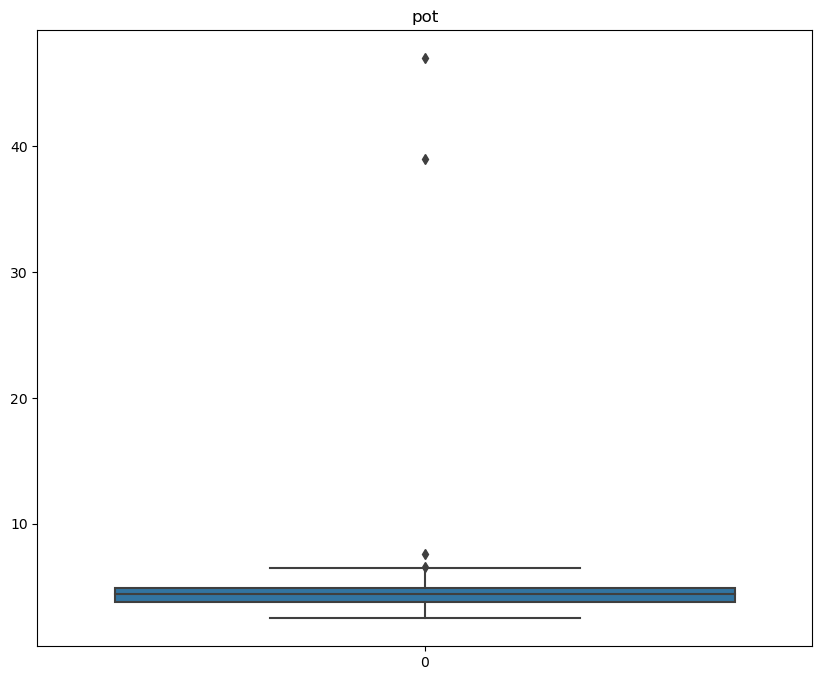

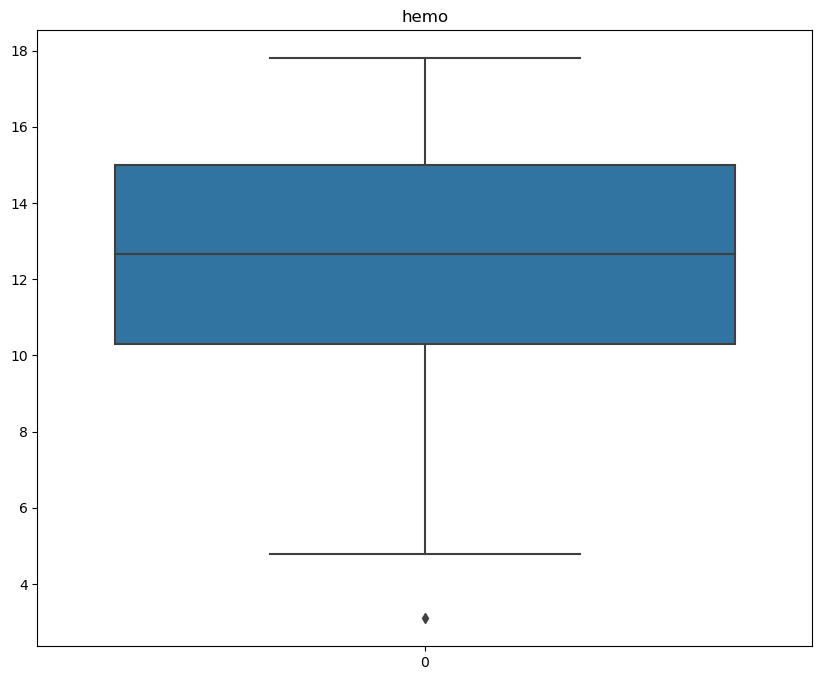

In [29]:
for feature in Numerical_Columns:
    if feature == 'target': continue
    plt.figure(figsize=(10,8))
    plt.title(feature,fontsize=12)
    sns.boxplot(kidney_df[feature])
    plt.show()
    print("\n")

In [30]:
kidney_df_clean_2 = kidney_df_clean.copy() #backup

for feature in Numerical_Columns:
    Q1 = kidney_df_clean_2[feature].quantile(0.25)
    Q3 = kidney_df_clean_2[feature].quantile(0.75)
    IQR = Q3 - Q1

    whisker_width = 1.5
    lower_whisker = Q1 - (whisker_width * IQR)
    upper_whisker = Q3 + (whisker_width * IQR)

    kidney_df_clean_2[feature] = np.where(kidney_df_clean_2[feature] > upper_whisker, upper_whisker, np.where(kidney_df_clean_2[feature] < lower_whisker, lower_whisker, kidney_df_clean_2[feature]))

# The last line applies outlier treatment to the 'Feature' column in the DataFrame.
# It uses nested np.where functions to replace outliers with the respective whisker boundary values.
# If a value in the 'Feature' column is greater than the upper whisker boundary, it is replaced with the upper whisker value.
# If a value in the 'Feature' column is less than the lower whisker boundary, it is replaced with the lower whisker value.
# If a value is within the whisker boundaries, it remains unchanged.

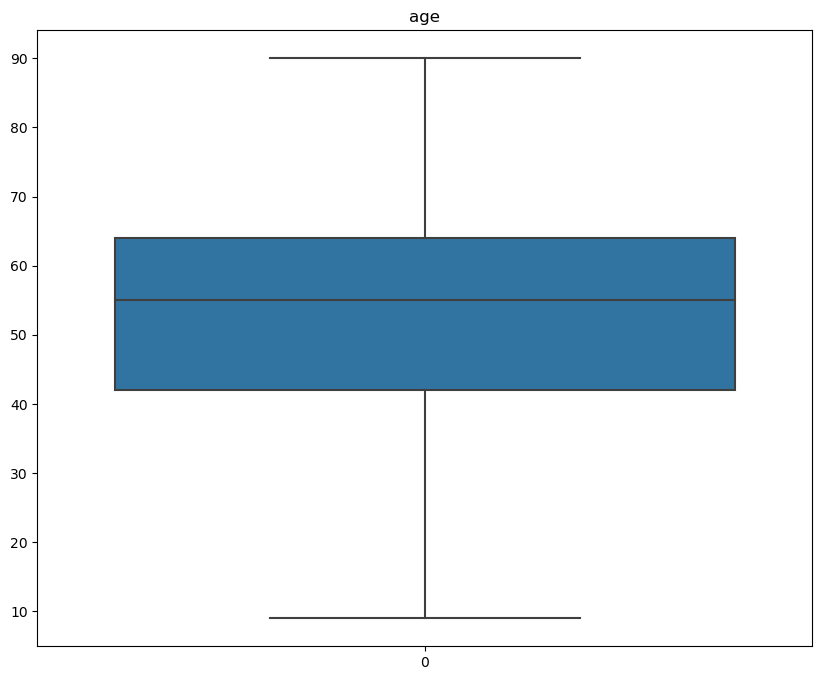

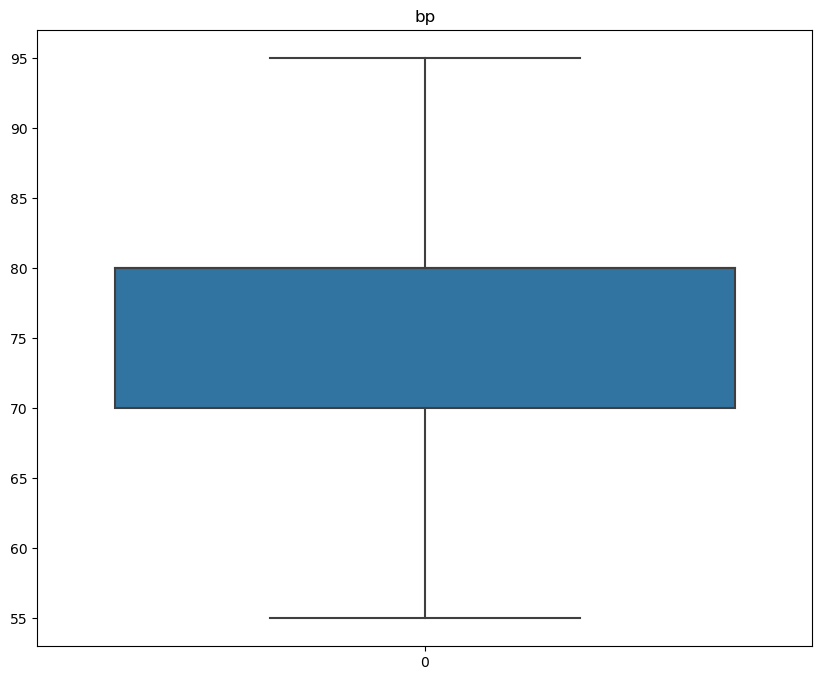

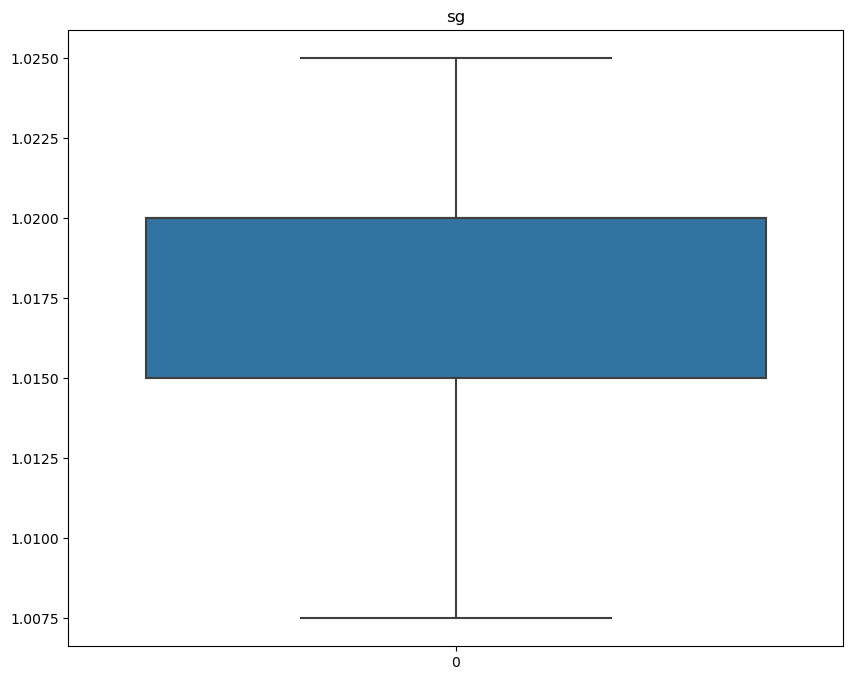

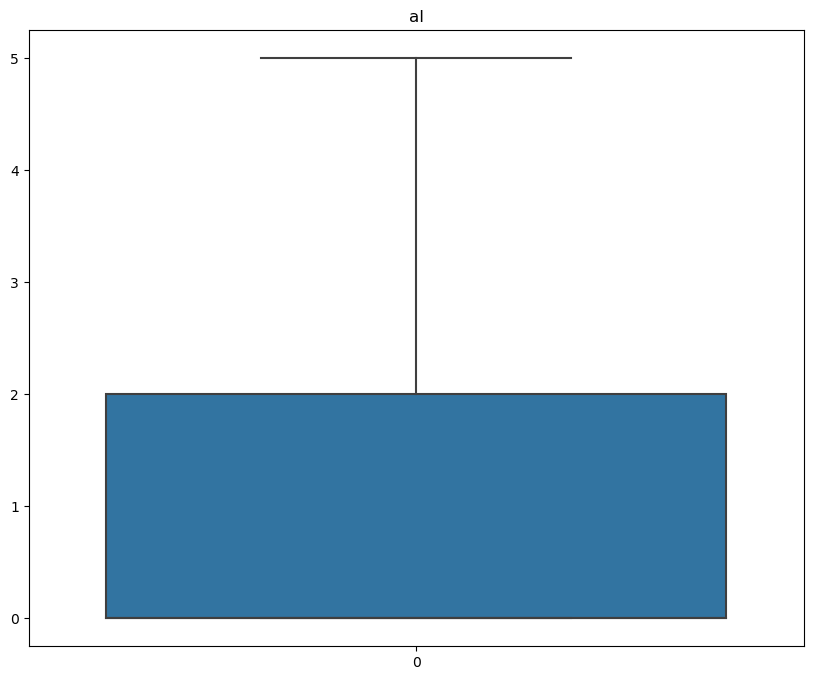

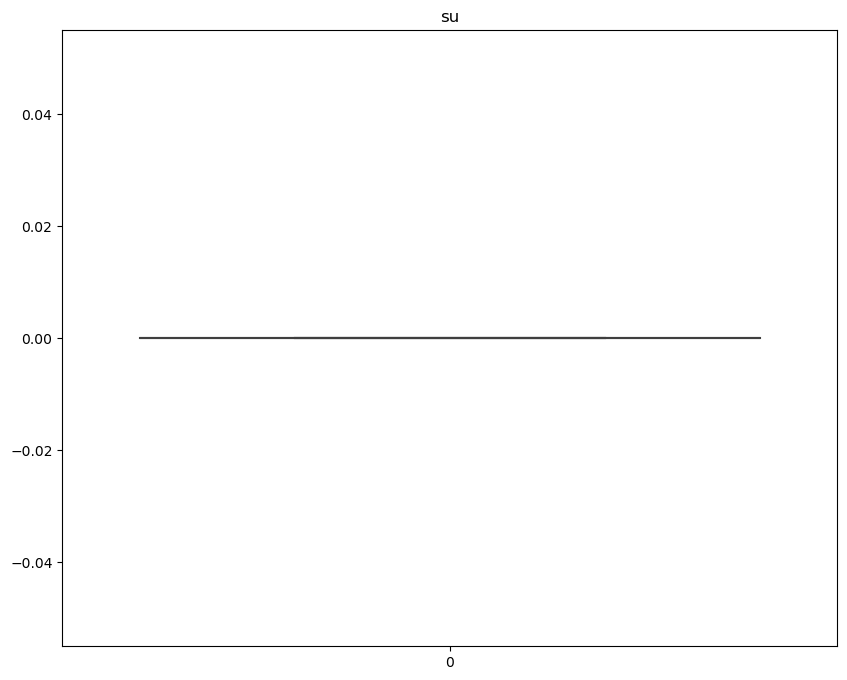

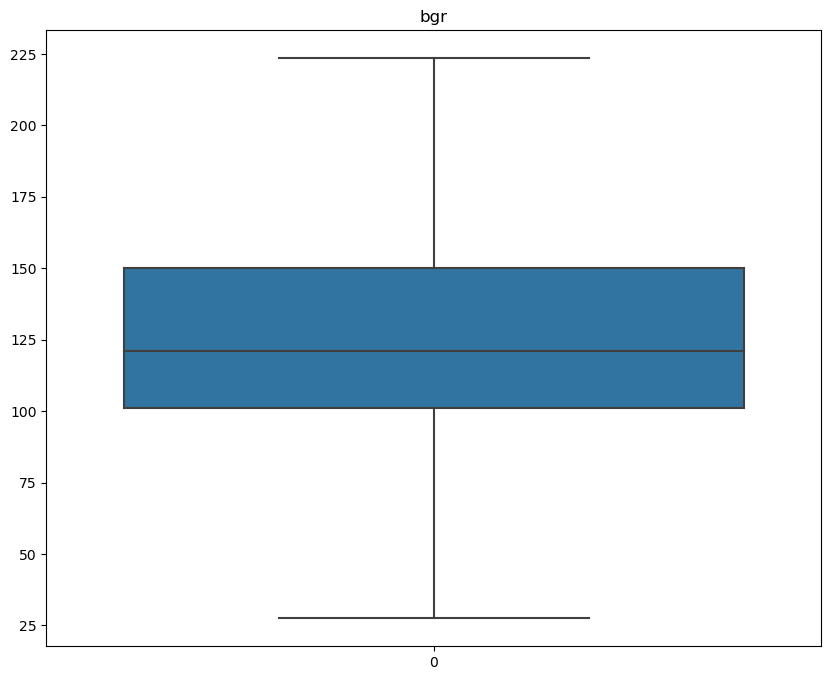

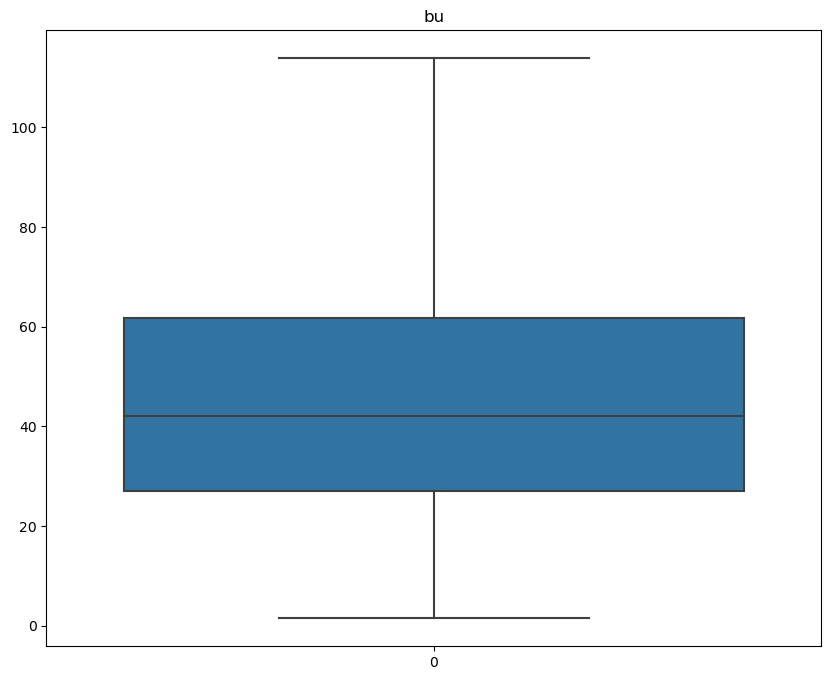

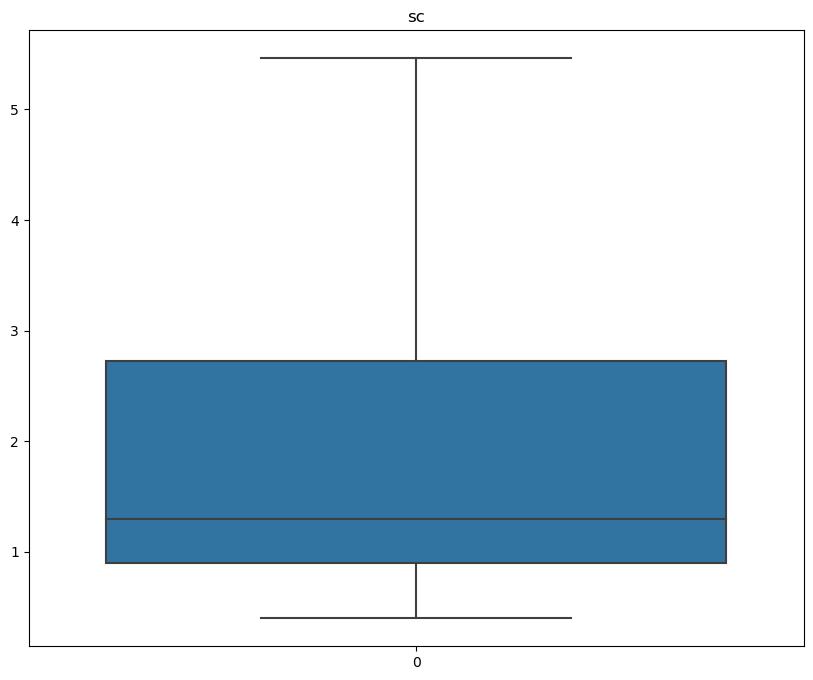

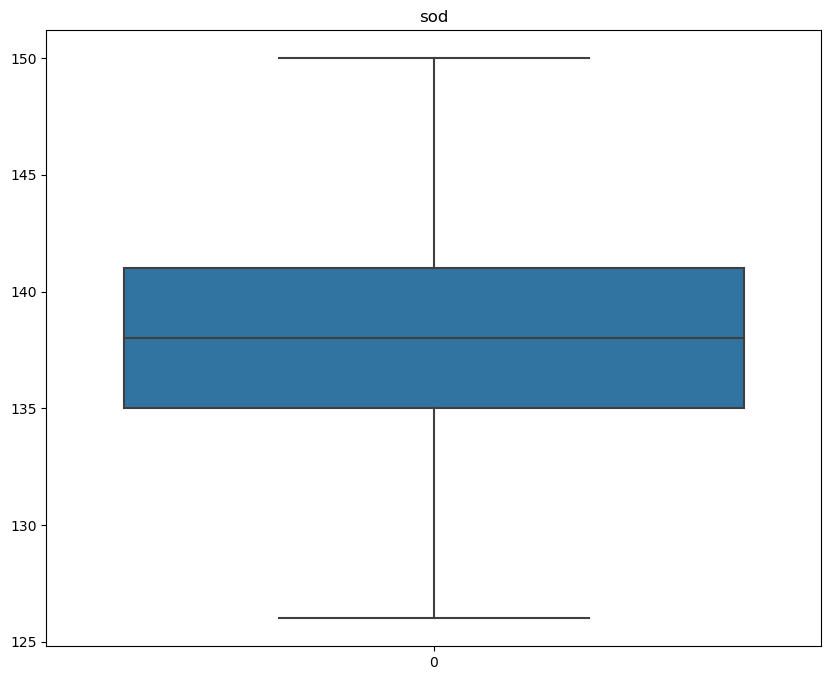

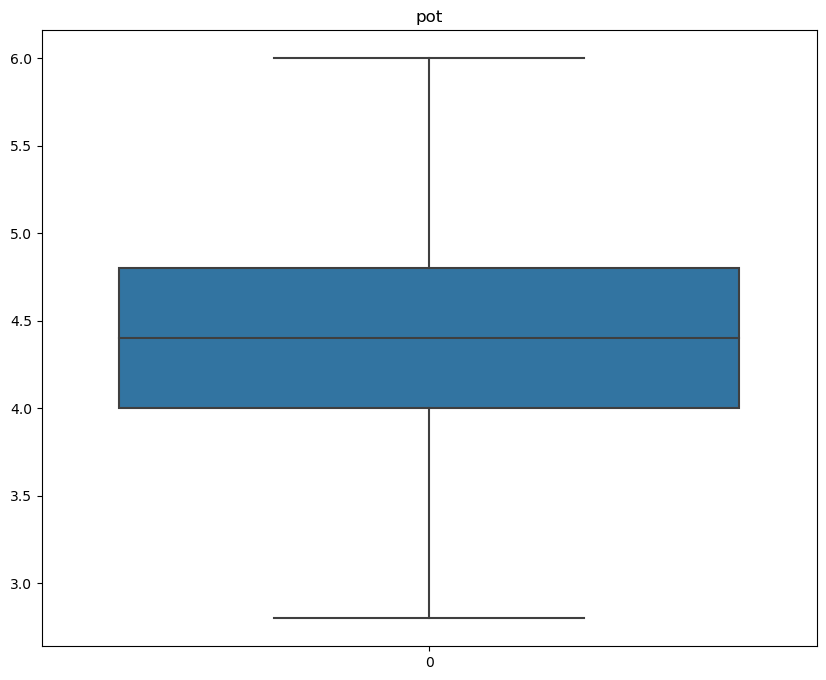

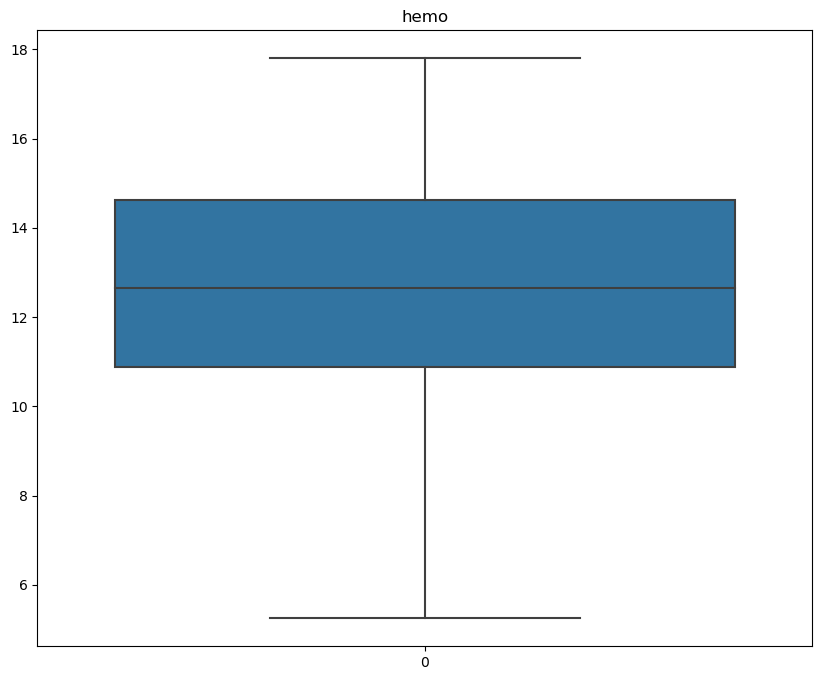

In [31]:
for feature in Numerical_Columns:
    if feature == 'target': continue
    plt.figure(figsize=(10,8))
    plt.title(feature,fontsize=12)
    sns.boxplot(kidney_df_clean_2[feature])
    plt.show()
    print("\n")

## Data Visualization

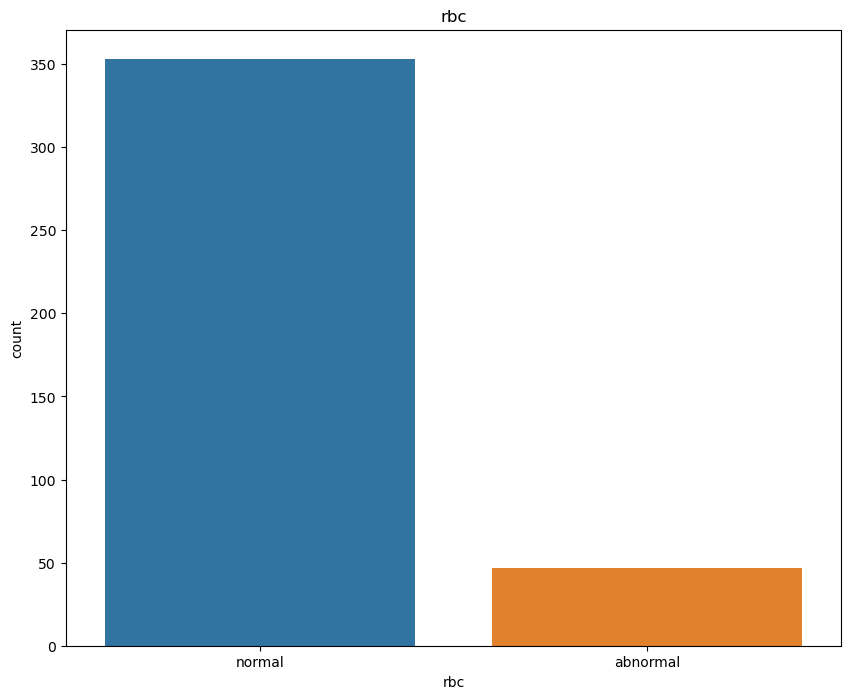

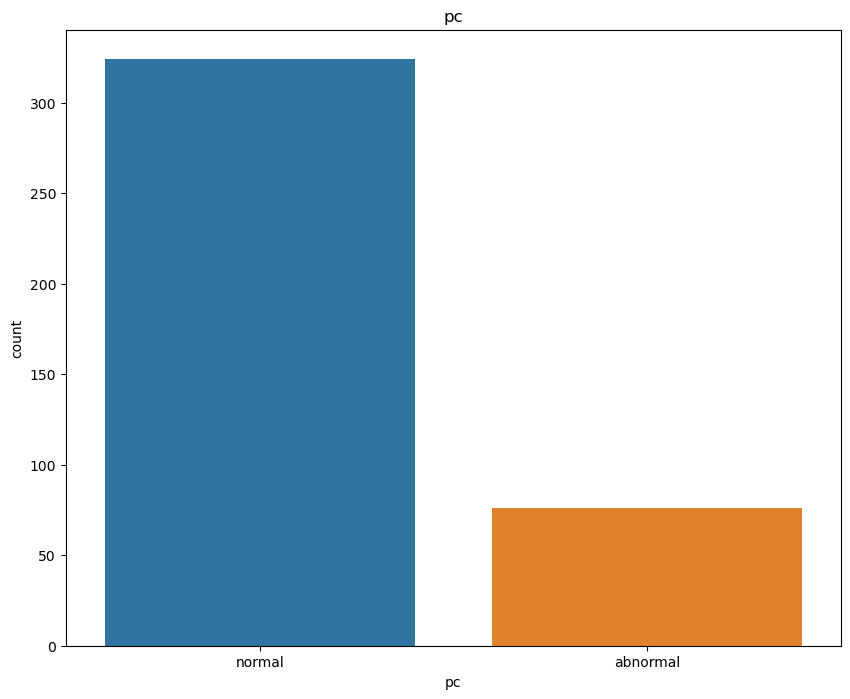

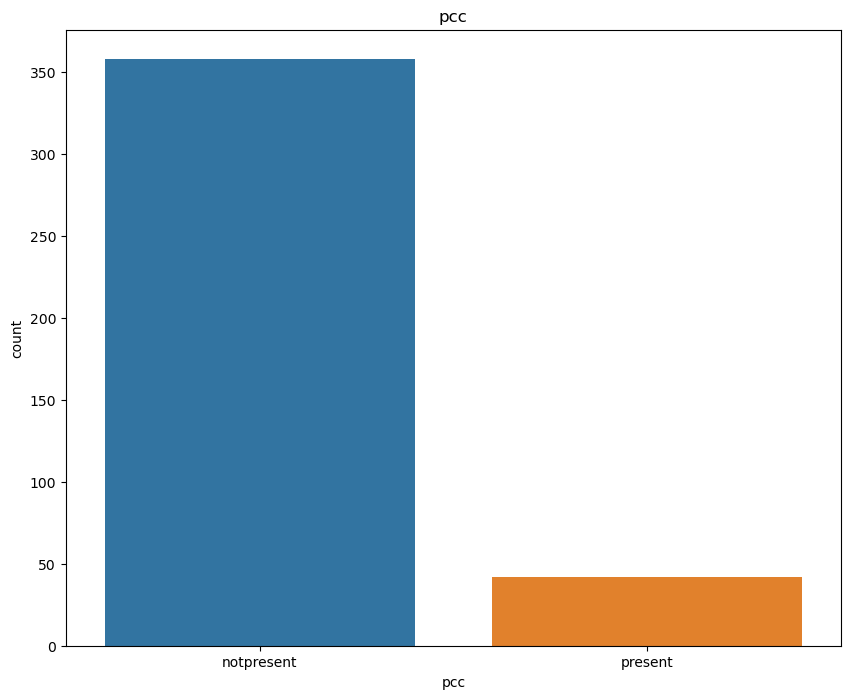

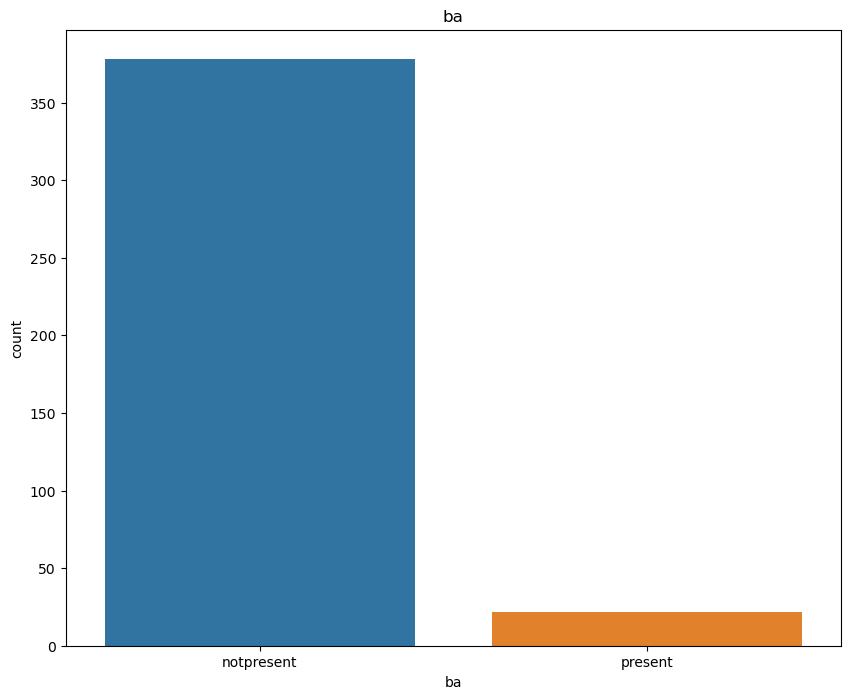

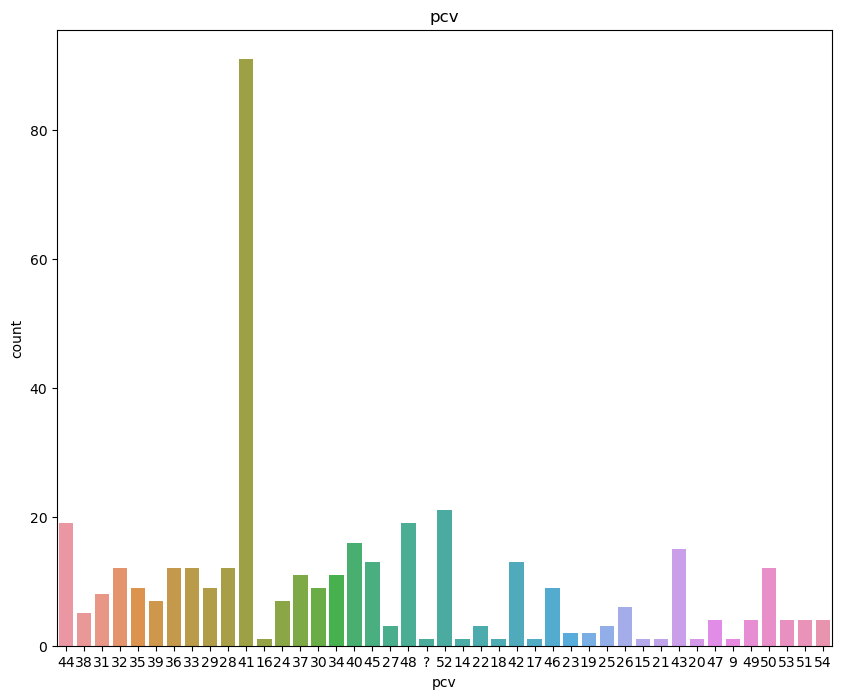

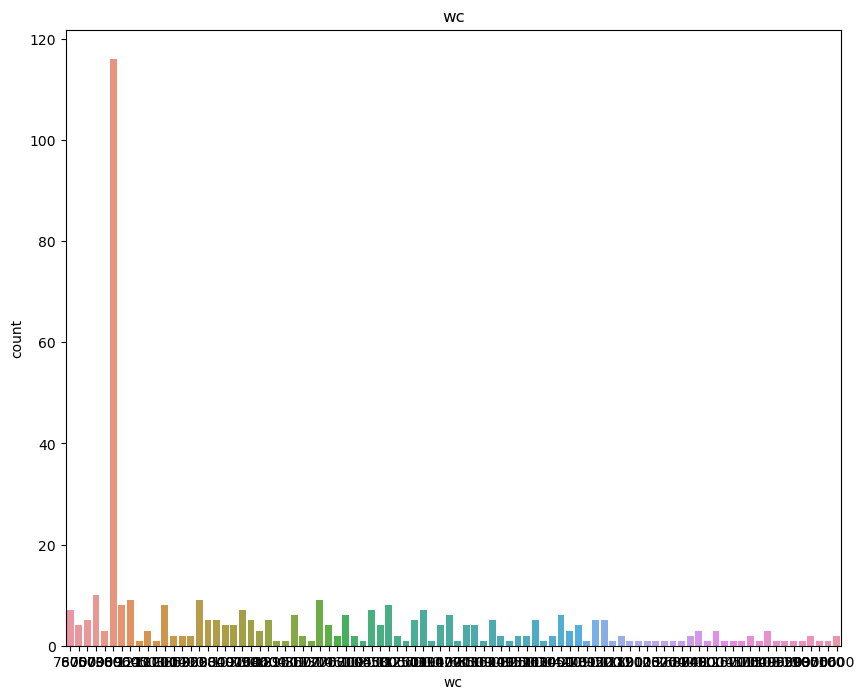

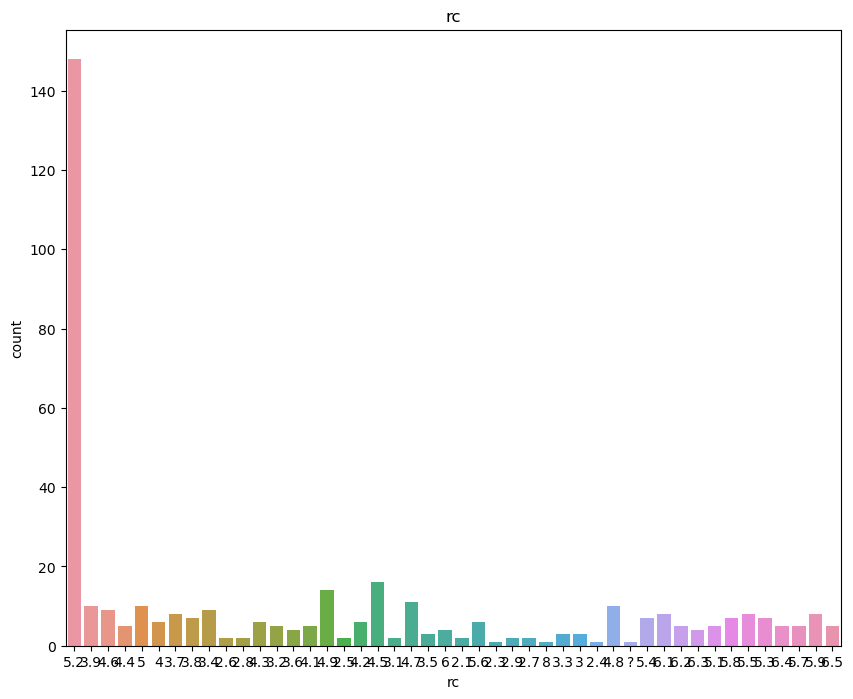

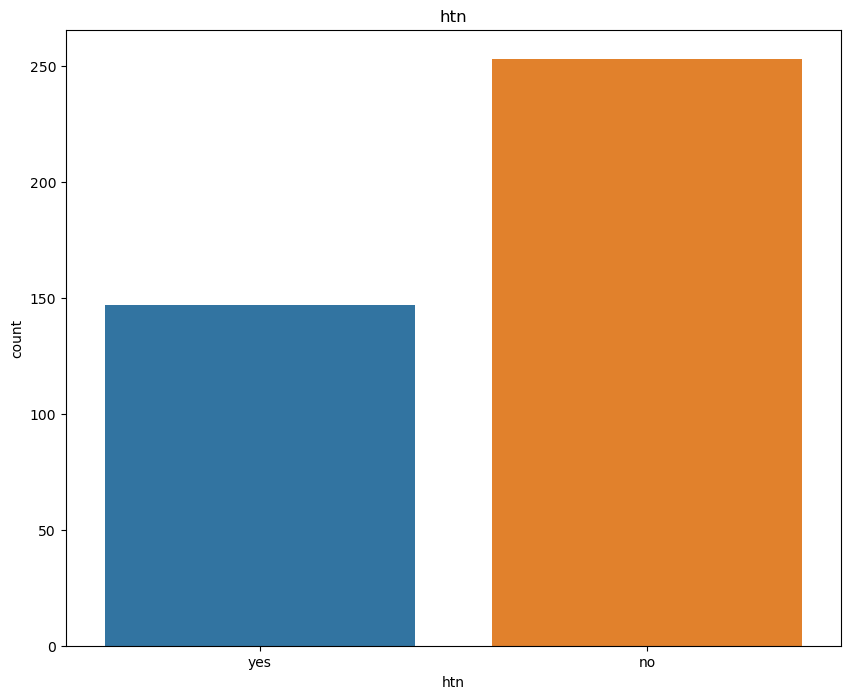

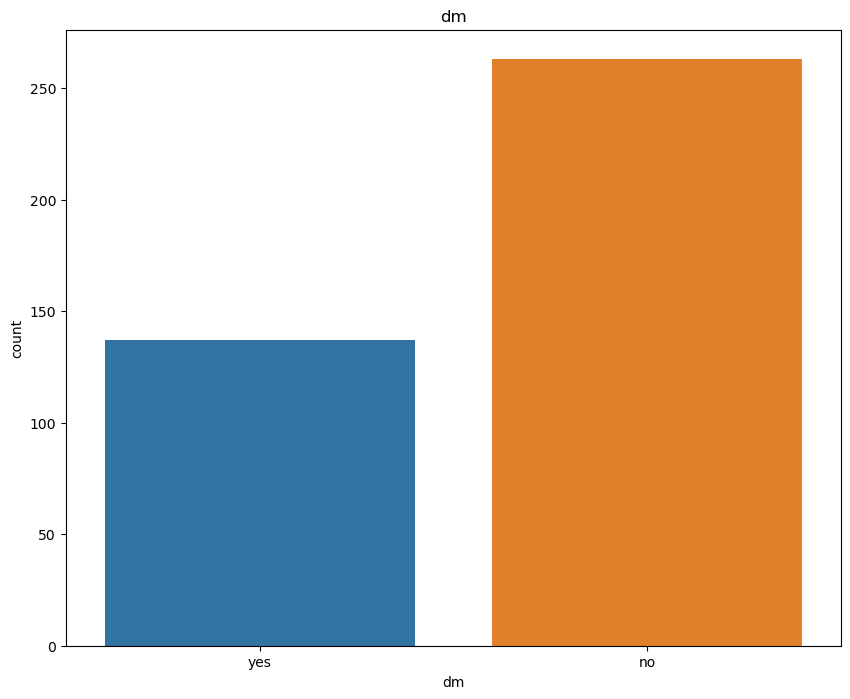

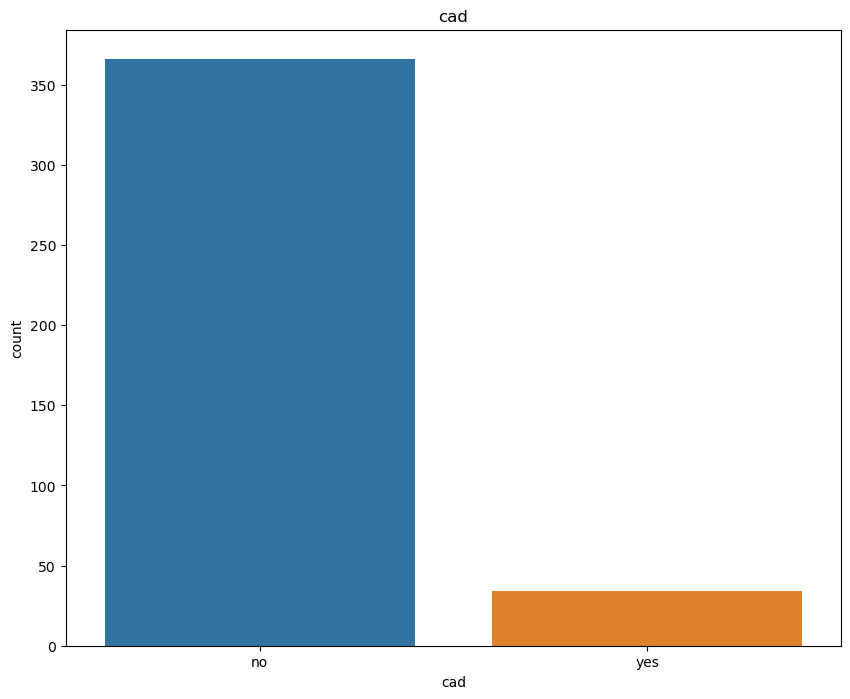

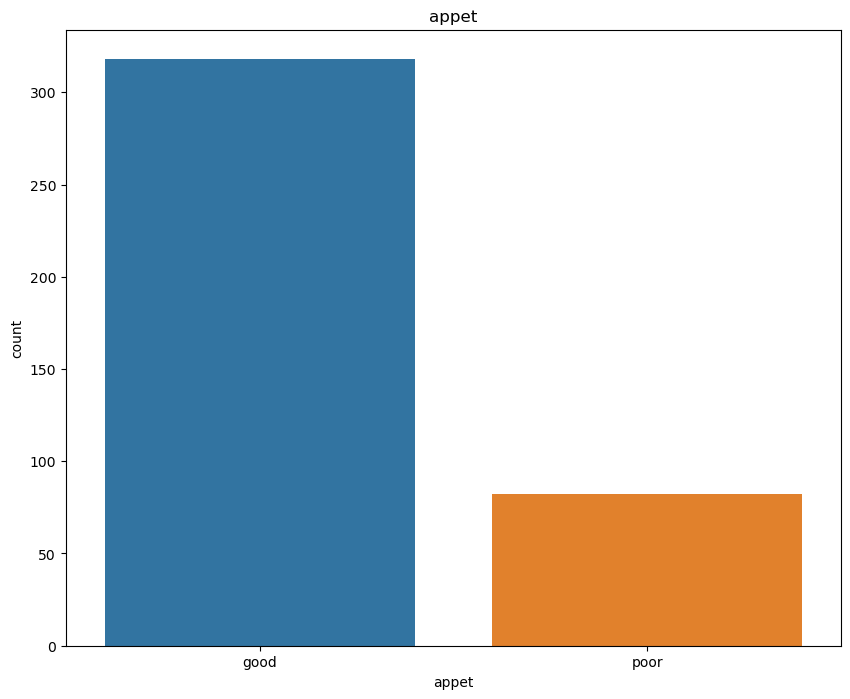

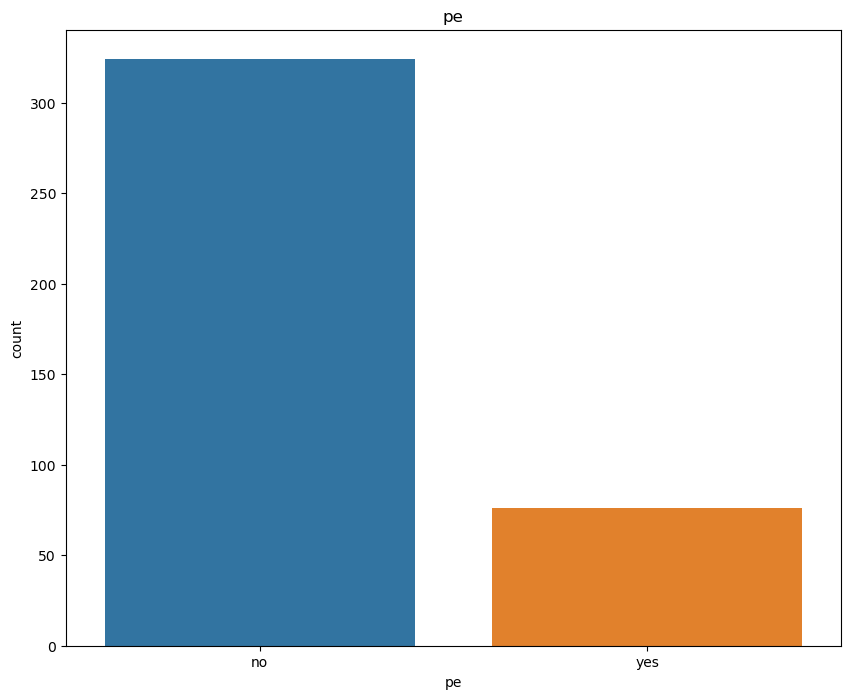

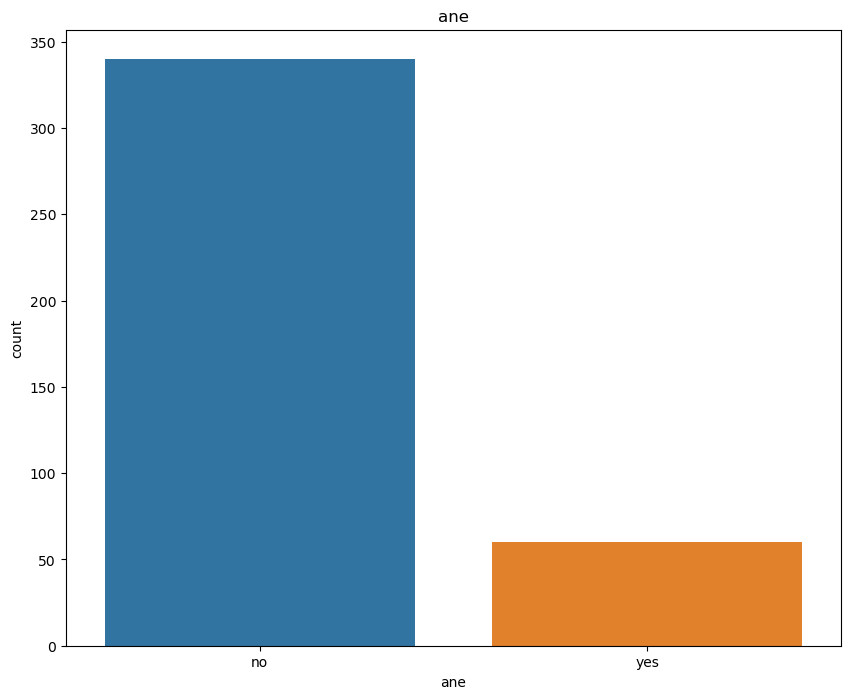

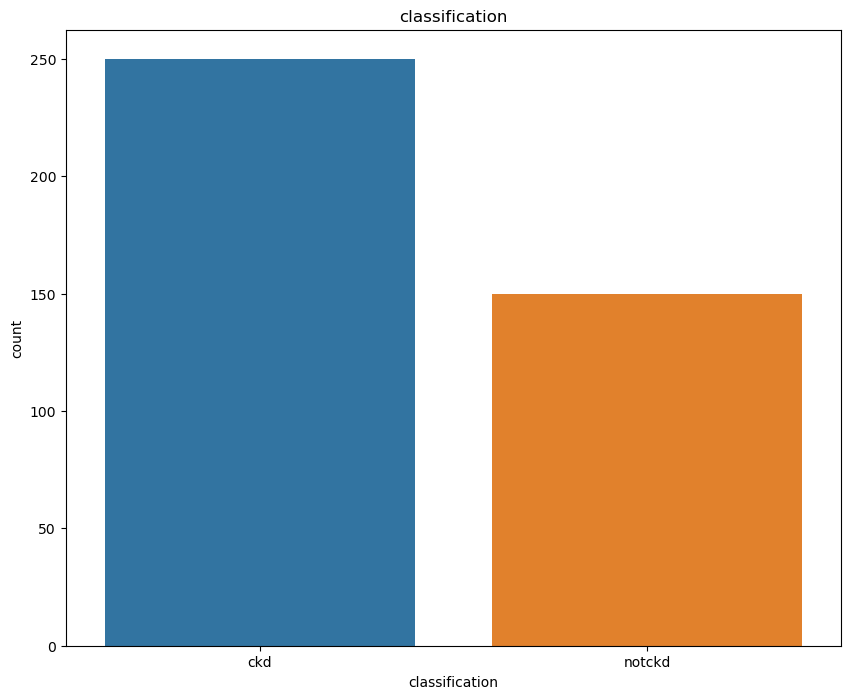

In [32]:
# Histogram for Categorical Columns
for feature in Categorical_Columns:
    plt.figure(figsize=(10,8))
    plt.title(feature, fontsize=12)
    sns.countplot(data=kidney_df_clean_2, x=feature)
    plt.show()
    print('\n')

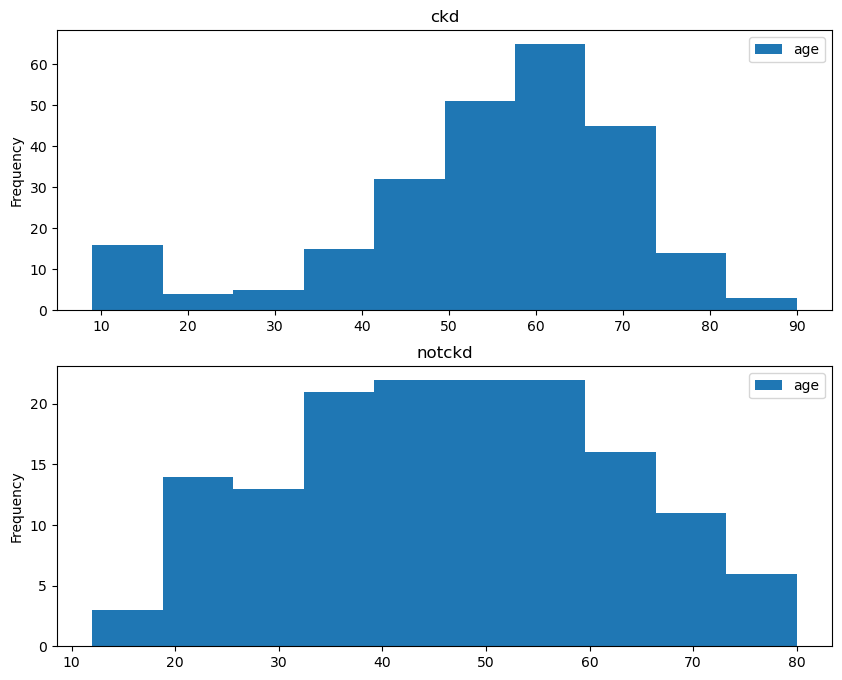

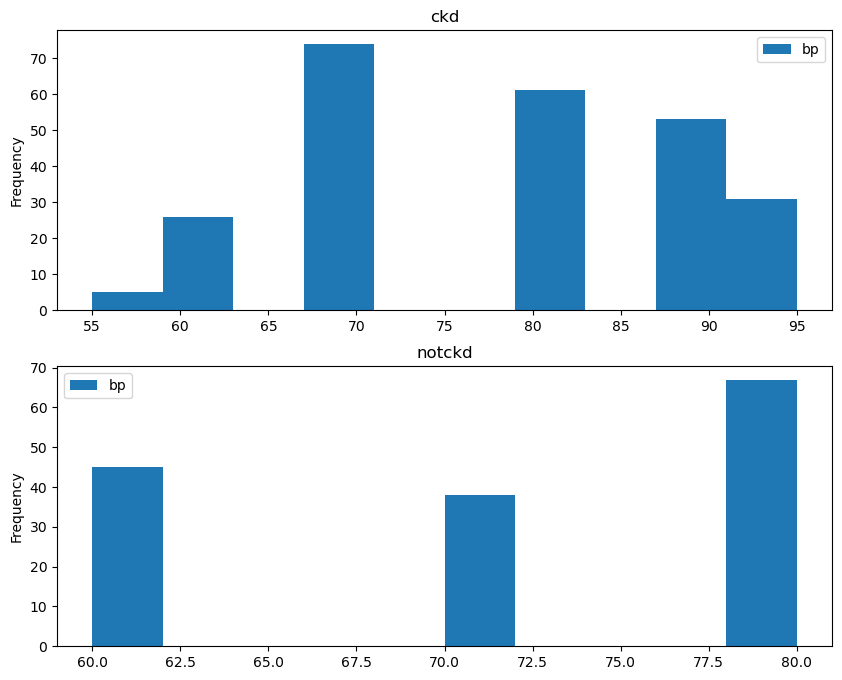

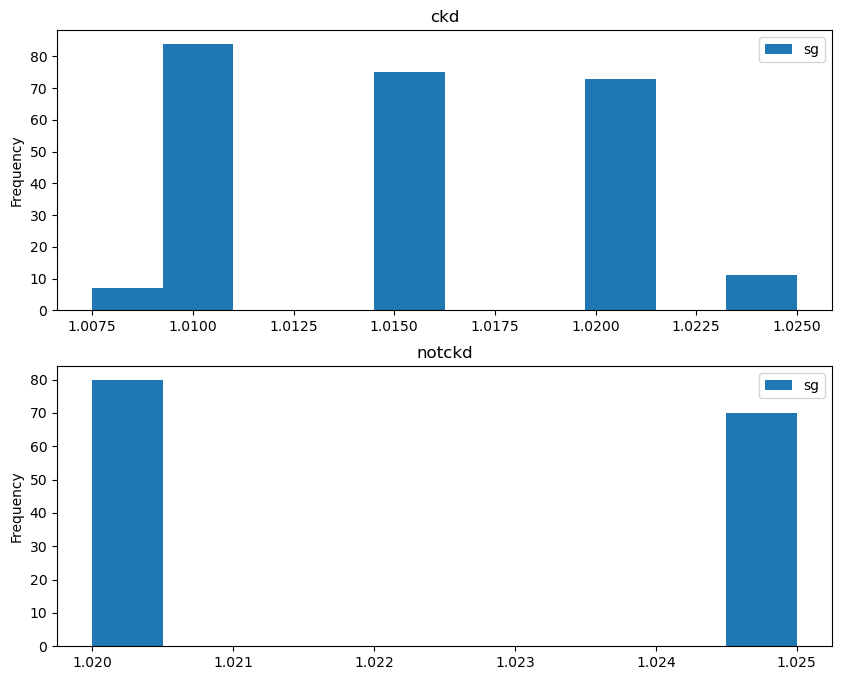

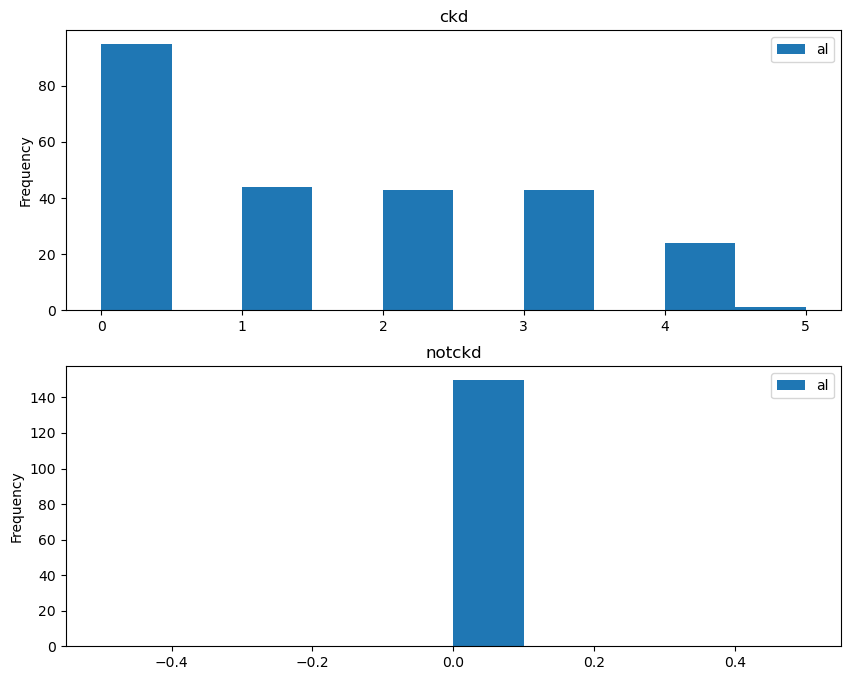

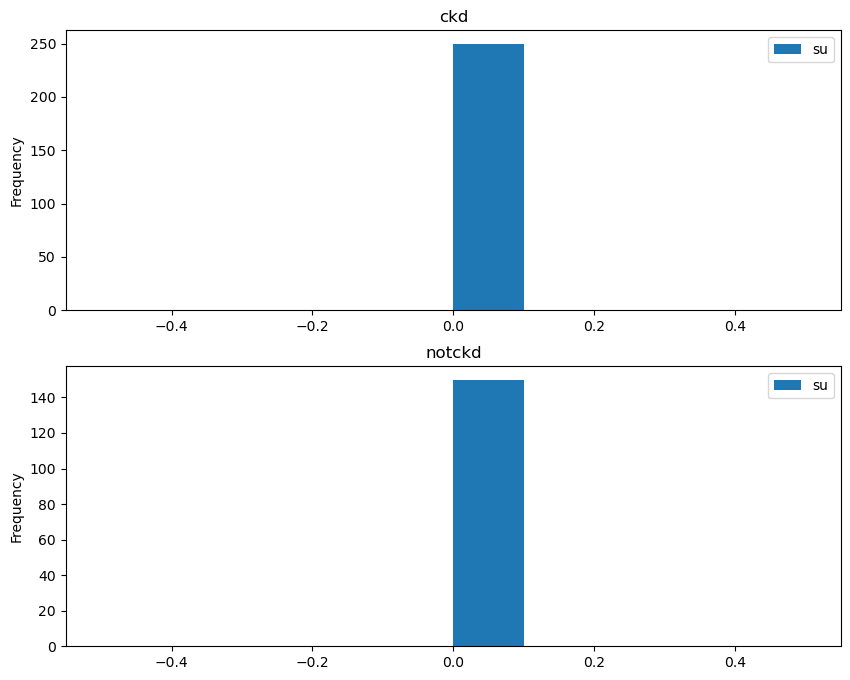

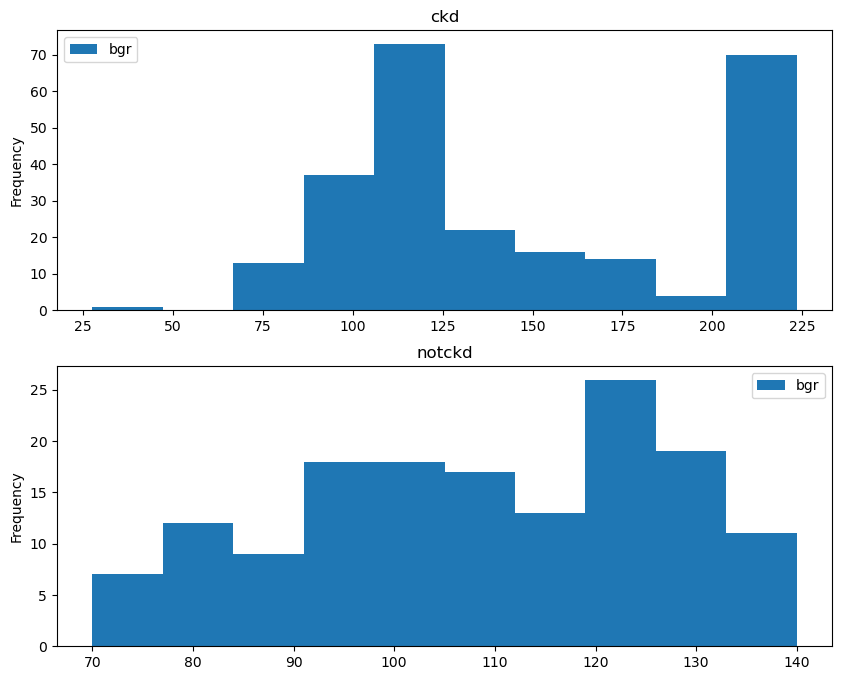

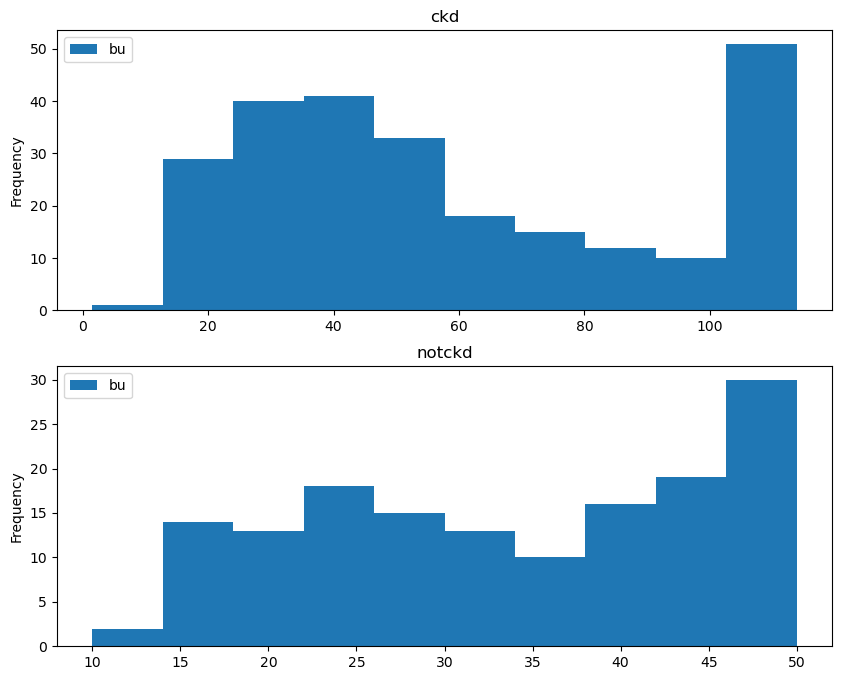

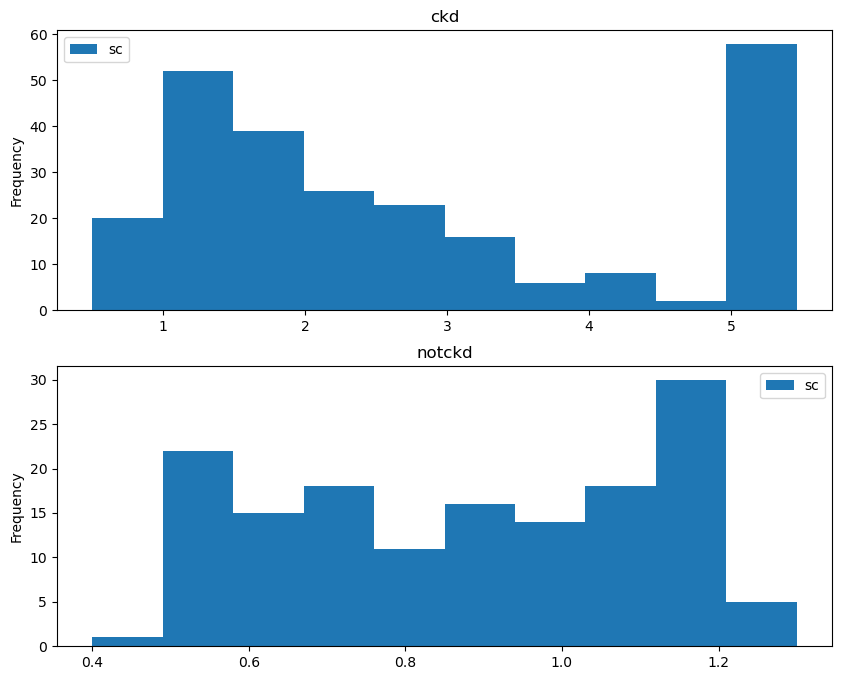

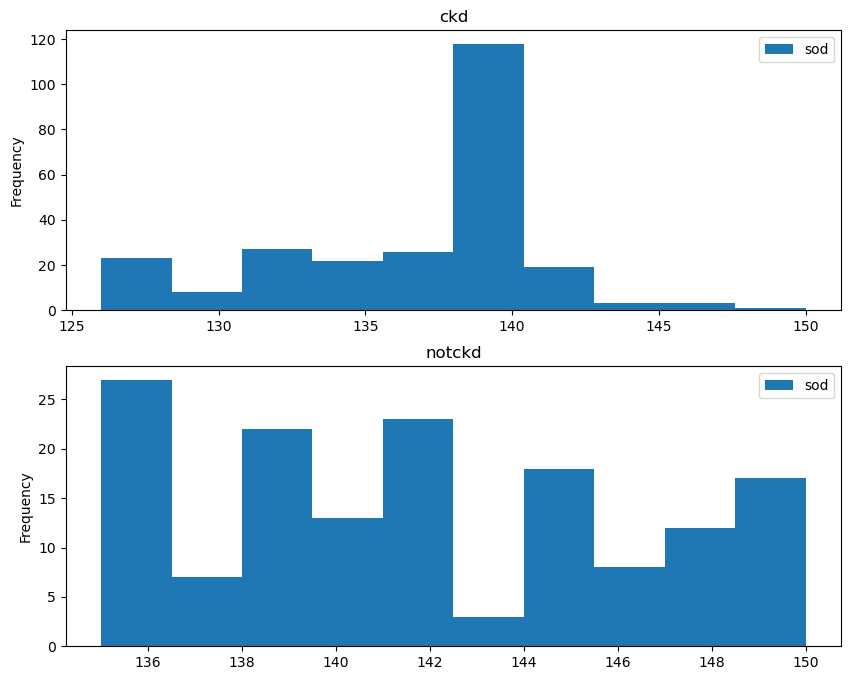

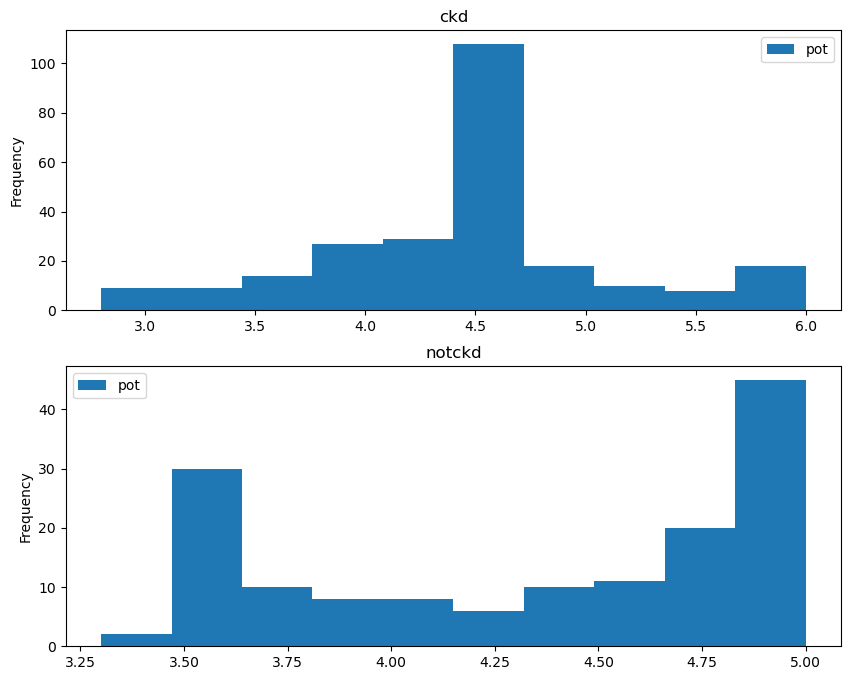

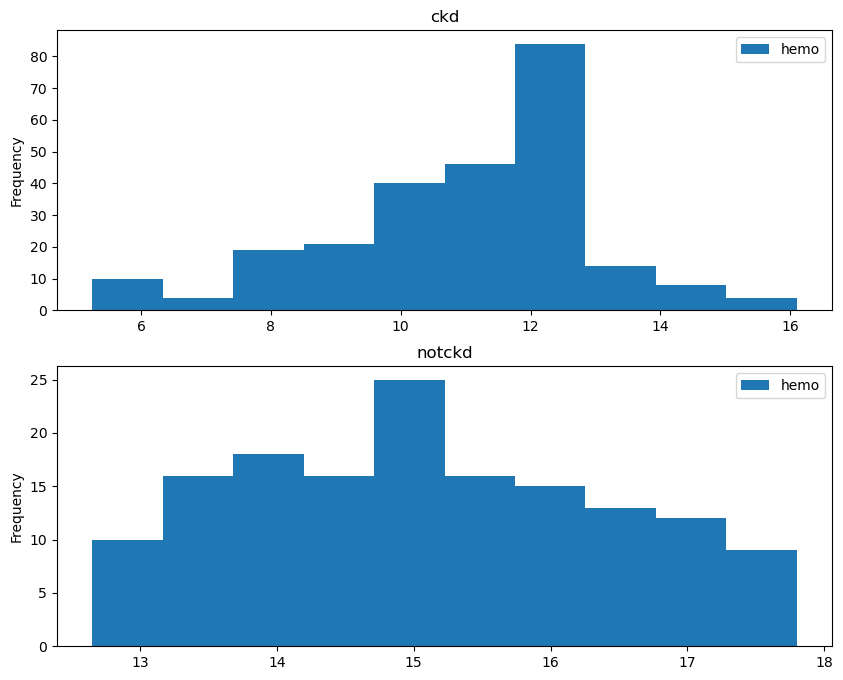

In [33]:
# Histogram for Numerical Columns

for feature in Numerical_Columns:
    kidney_df_clean_2.plot.hist(column=feature, by='classification', figsize=(10,8))

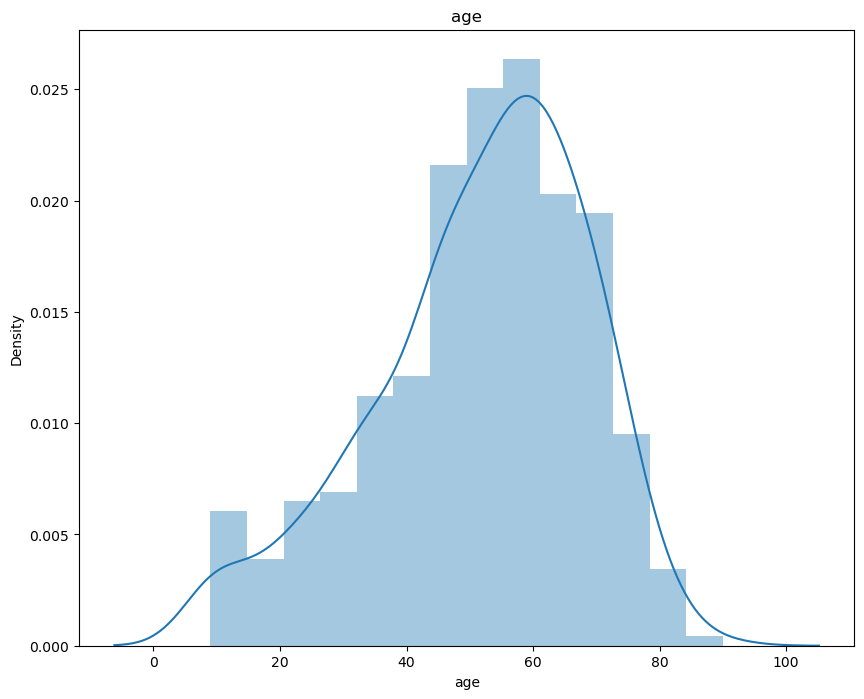

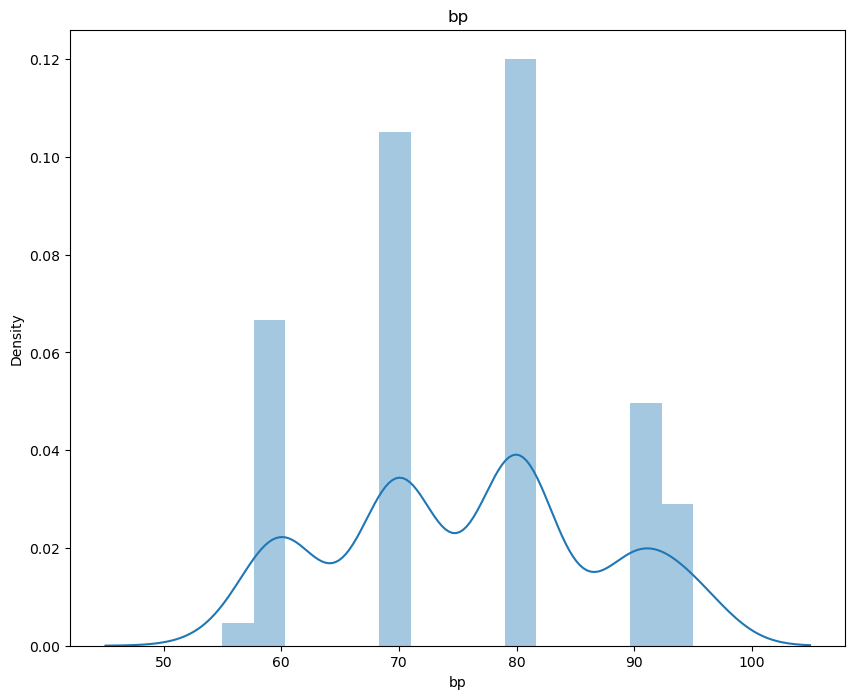

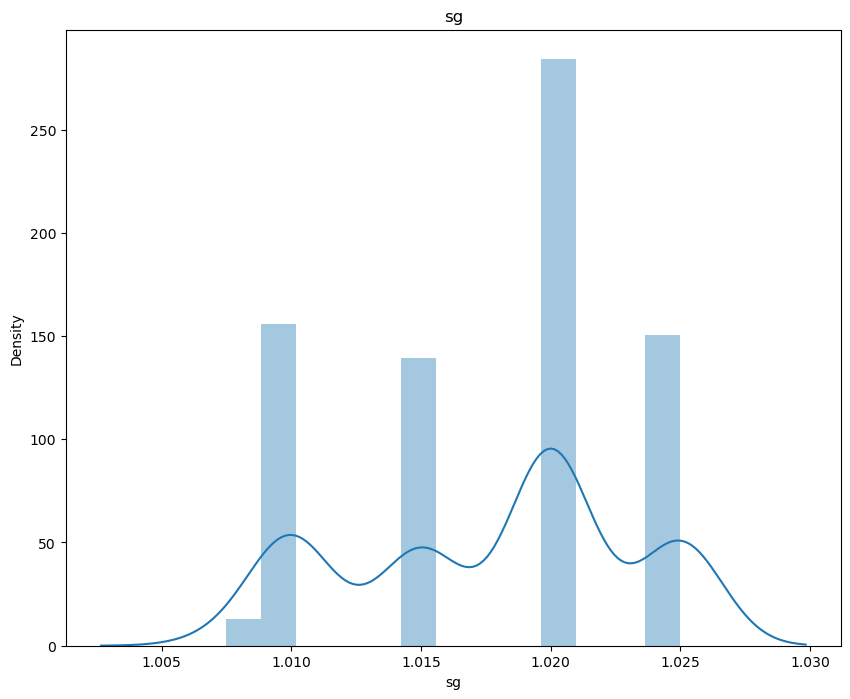

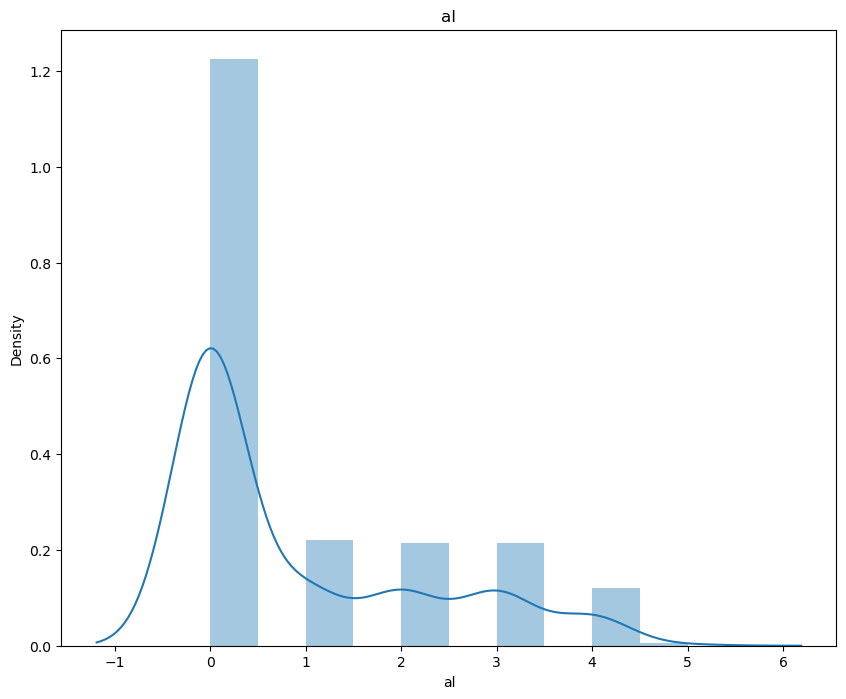

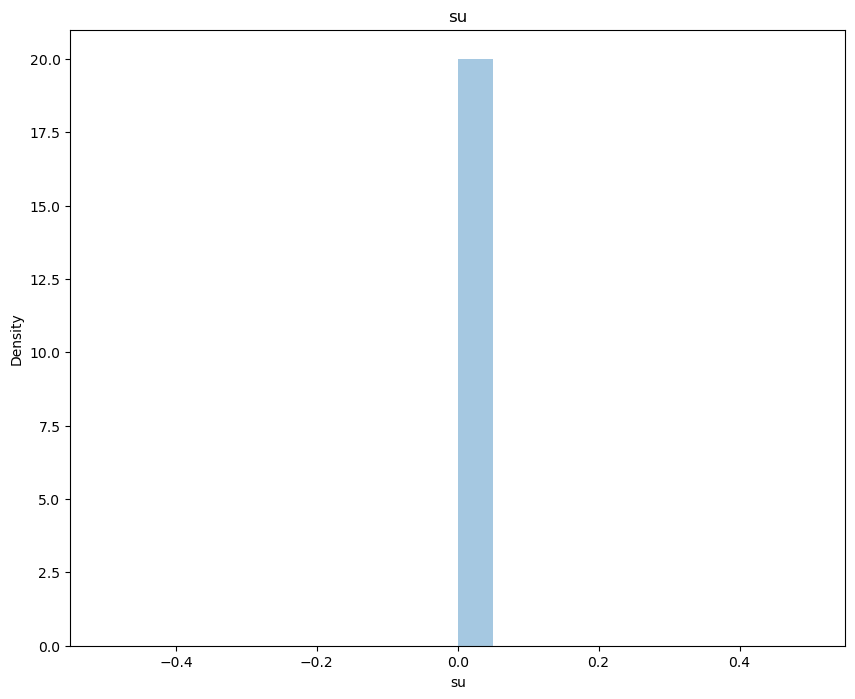

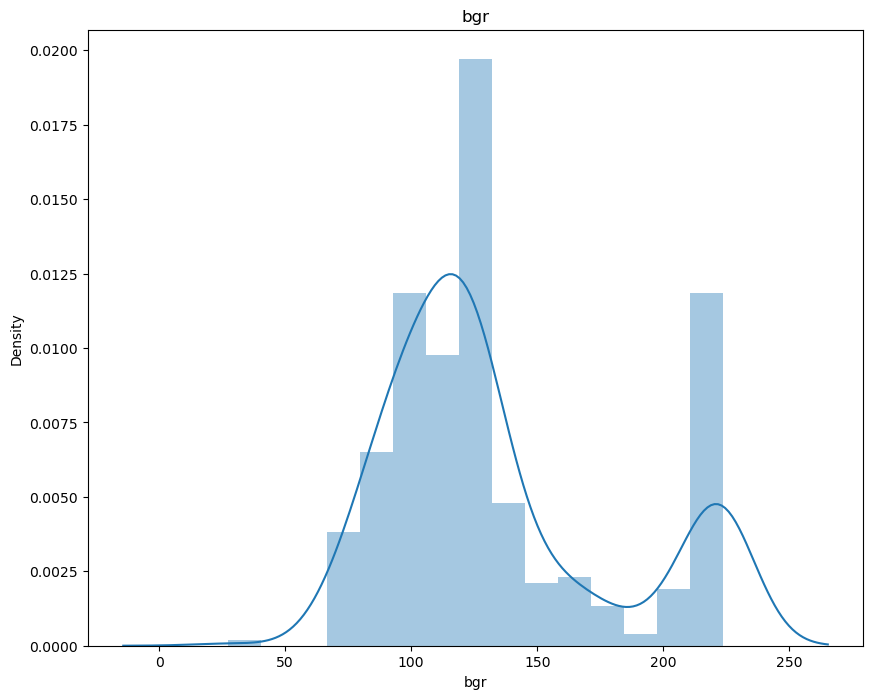

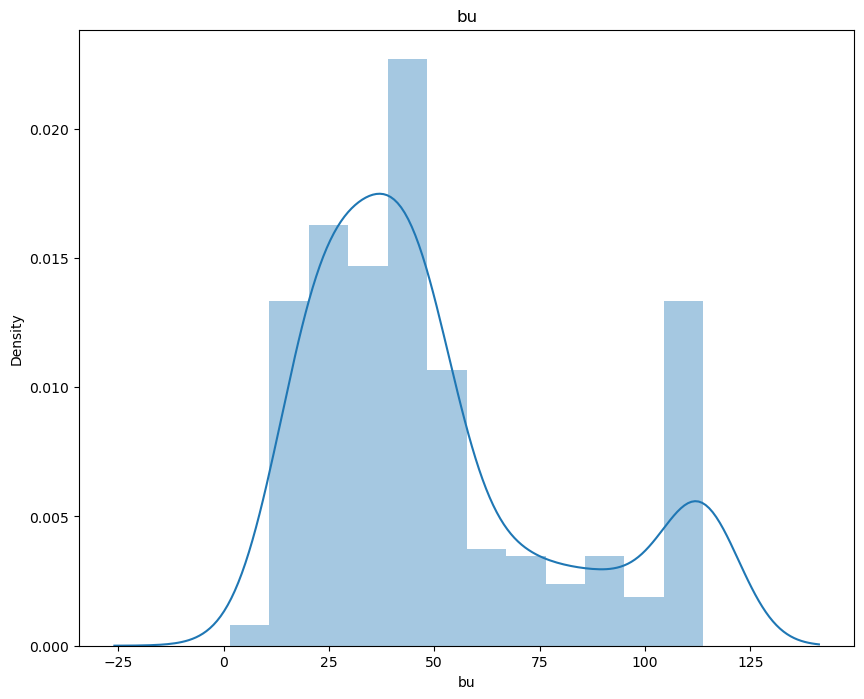

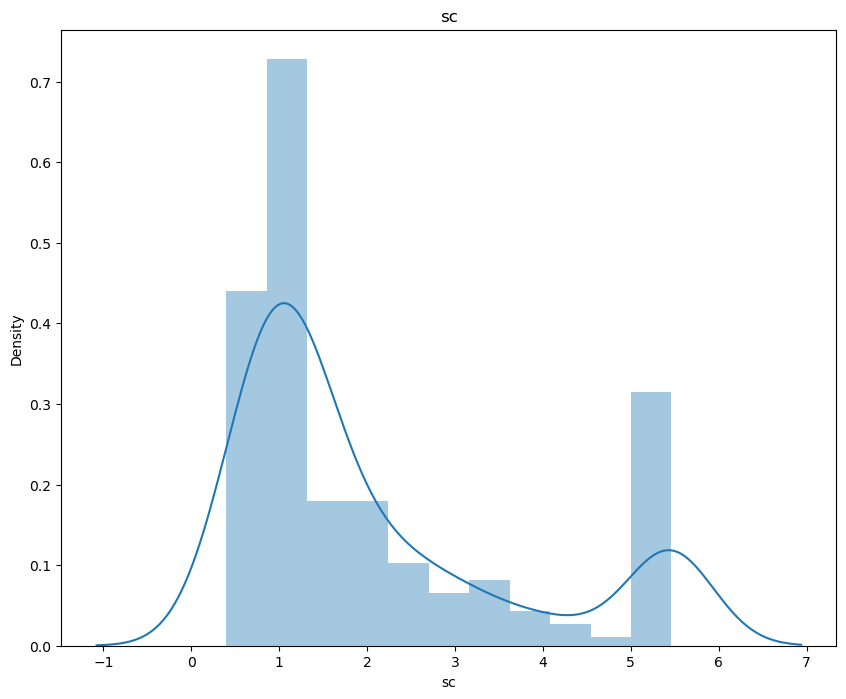

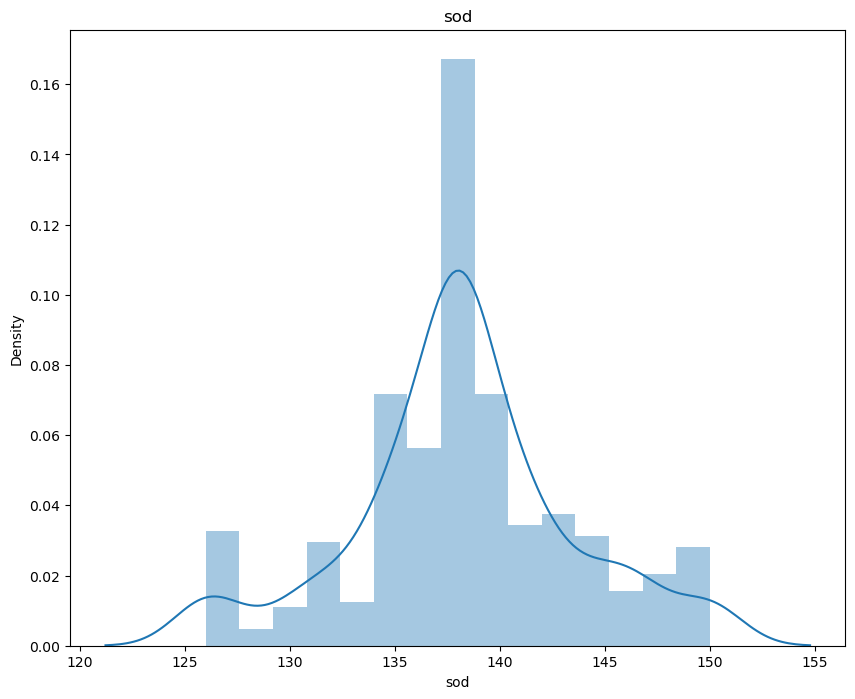

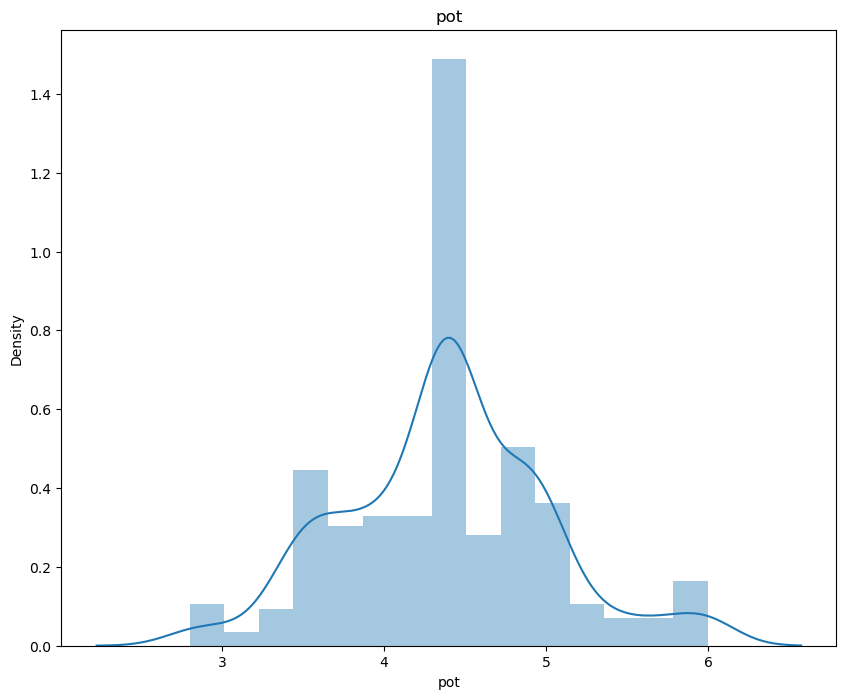

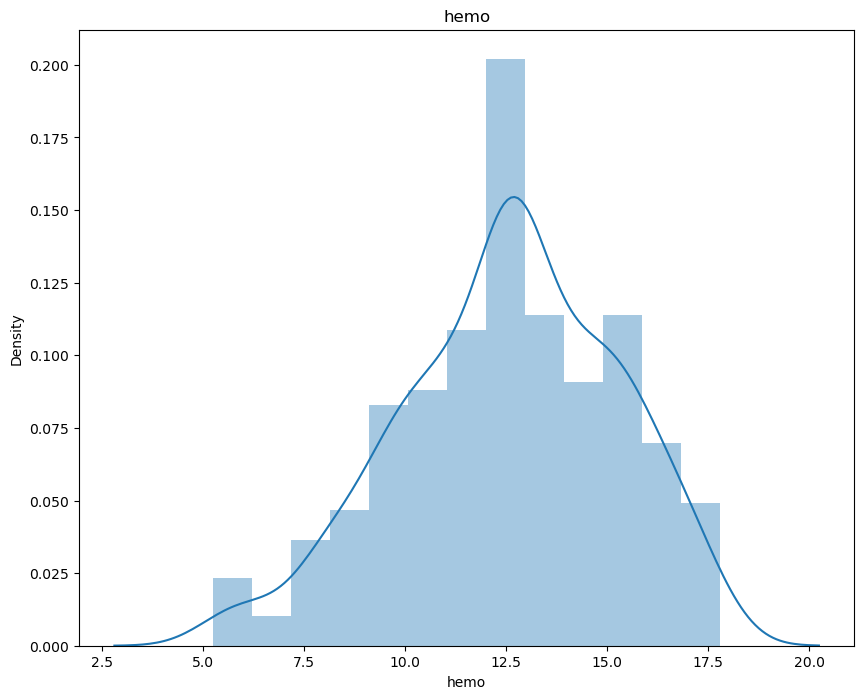

In [34]:
# Distribution Plot for Numerial Columns

for feature in Numerical_Columns:
    plt.figure(figsize=(10,8))
    plt.title(feature)
    sns.distplot(kidney_df_clean_2[feature])
    plt.show()
    print('\n')

age vs bp


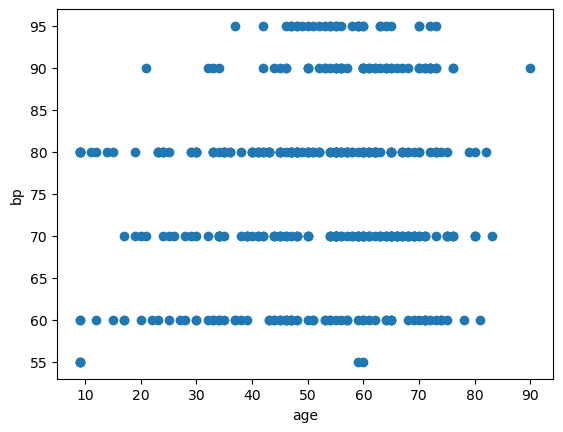



age vs sg


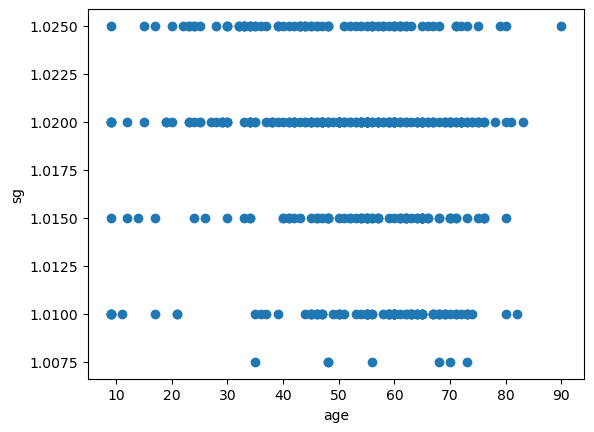



age vs al


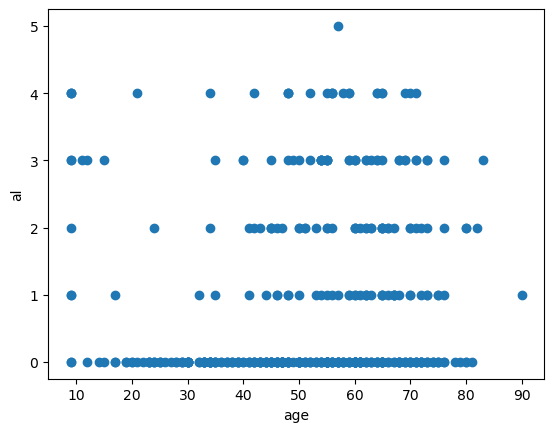



age vs su


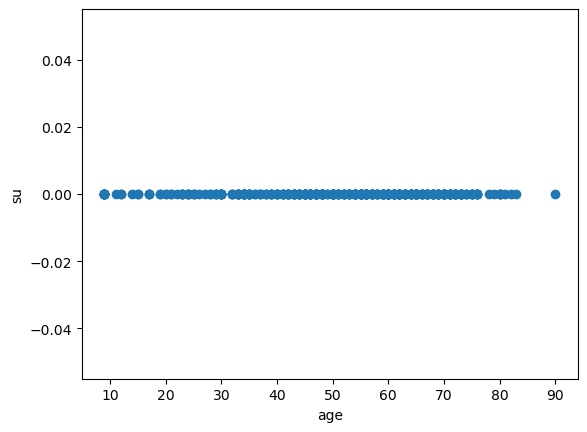



age vs bgr


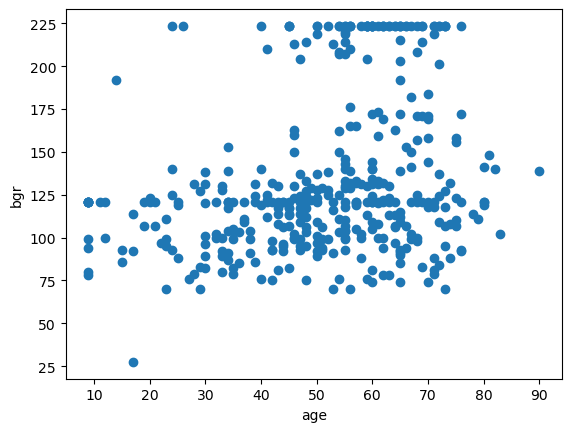



age vs bu


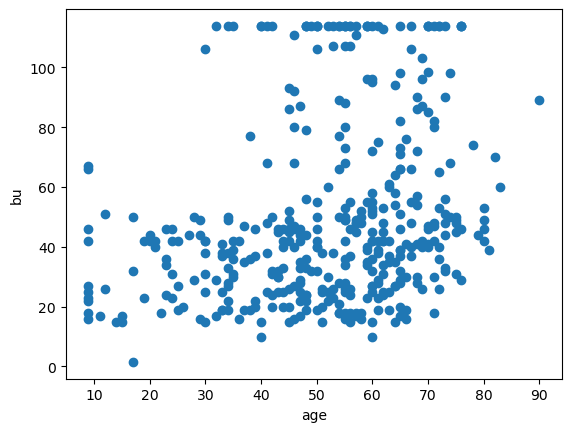



age vs sc


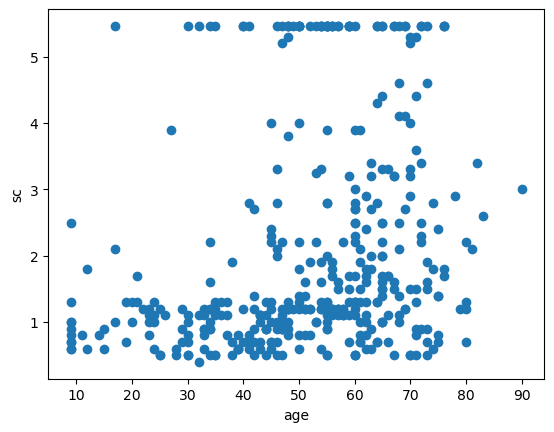



age vs sod


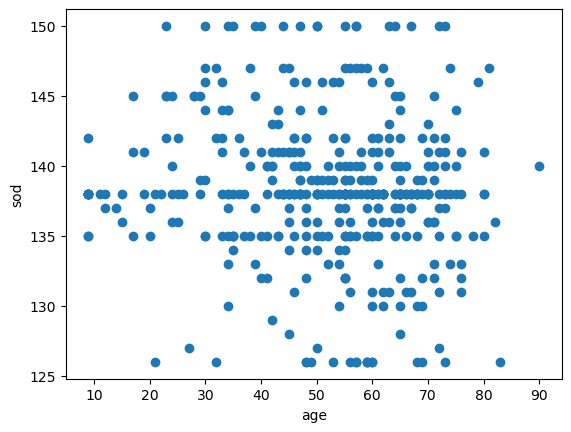



age vs pot


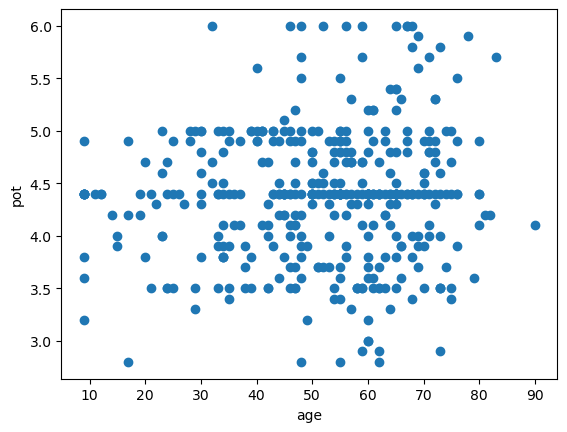



age vs hemo


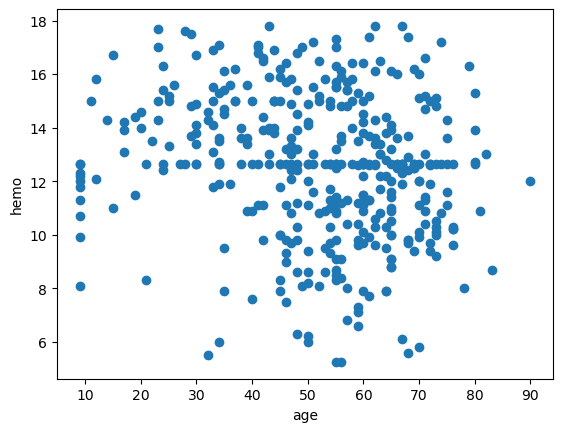



bp vs sg


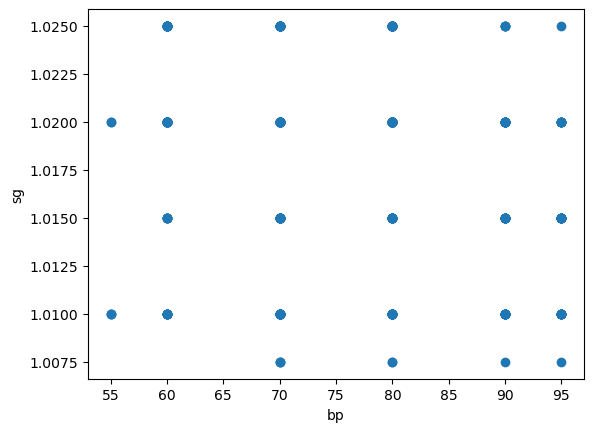



bp vs al


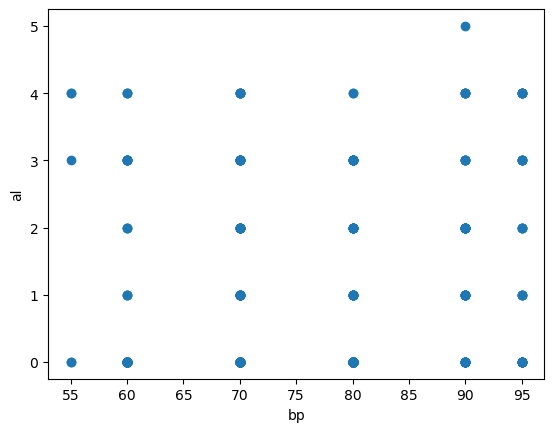



bp vs su


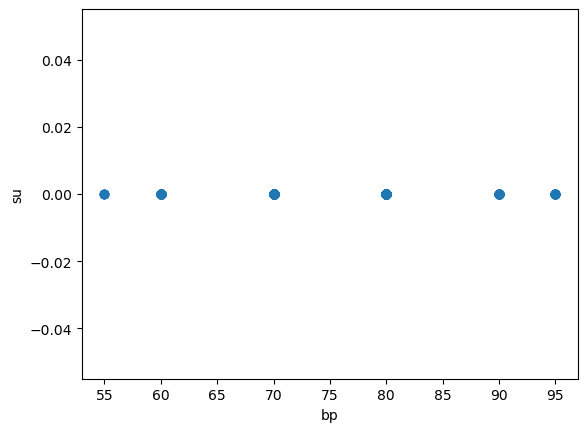



bp vs bgr


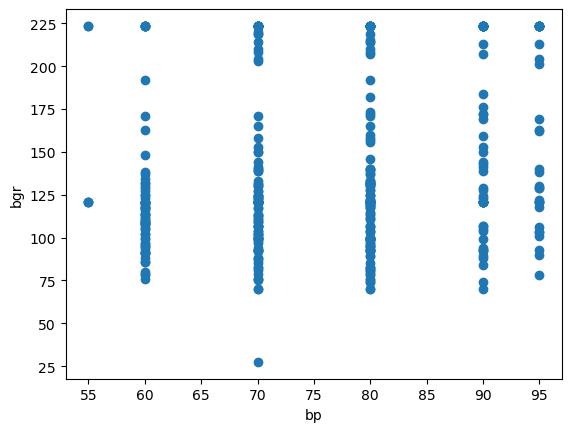



bp vs bu


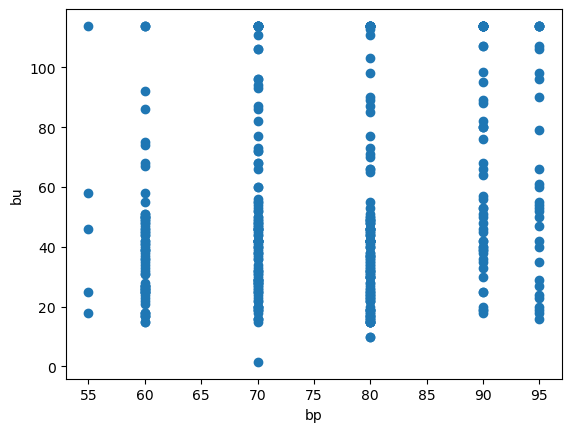



bp vs sc


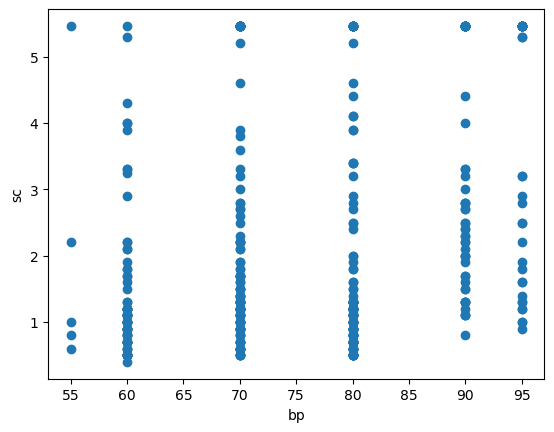



bp vs sod


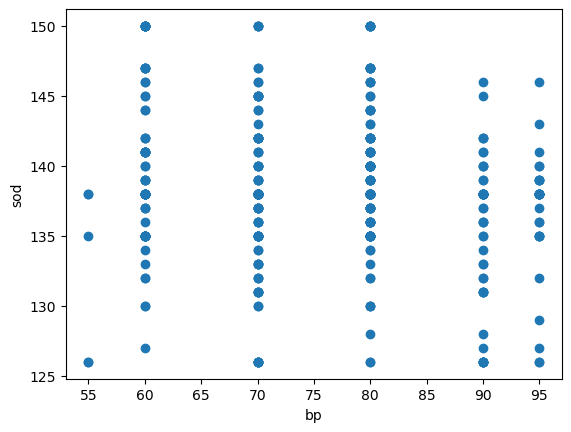



bp vs pot


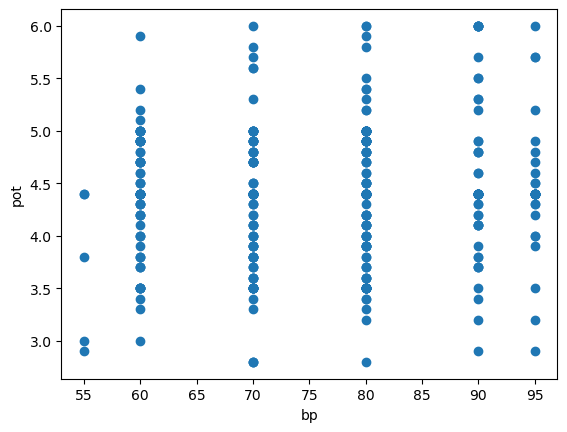



bp vs hemo


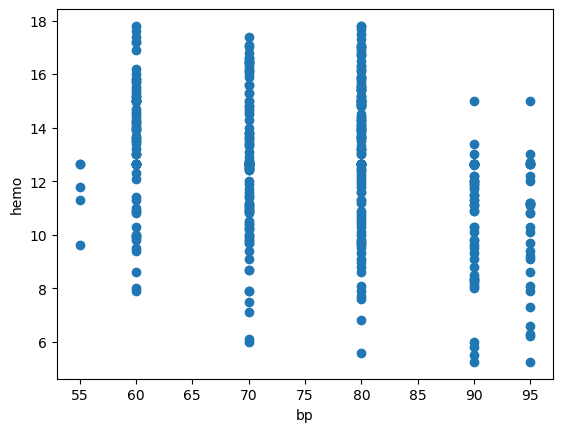



sg vs al


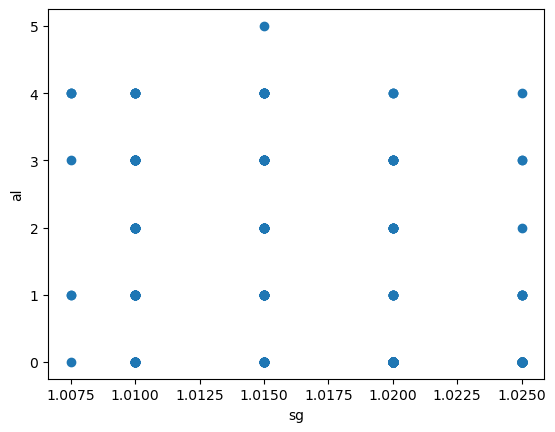



sg vs su


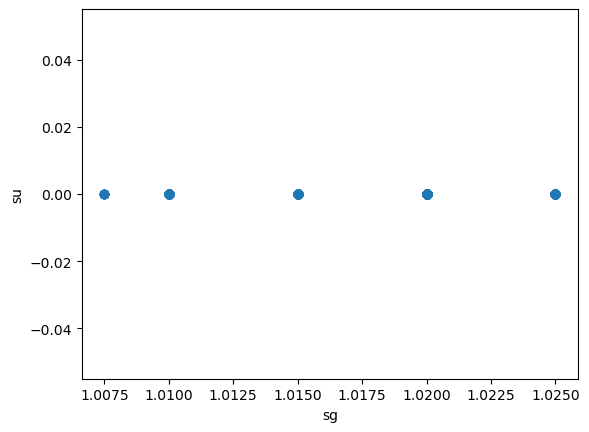



sg vs bgr


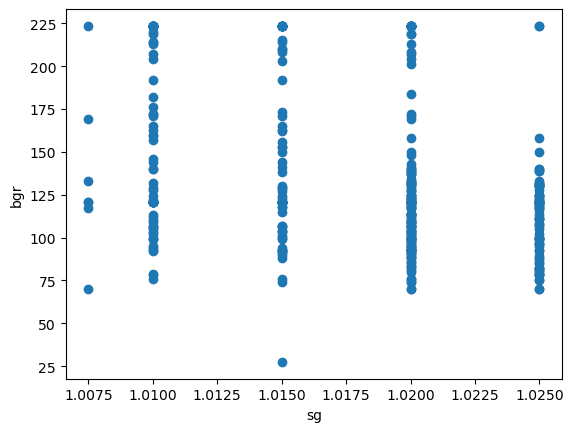



sg vs bu


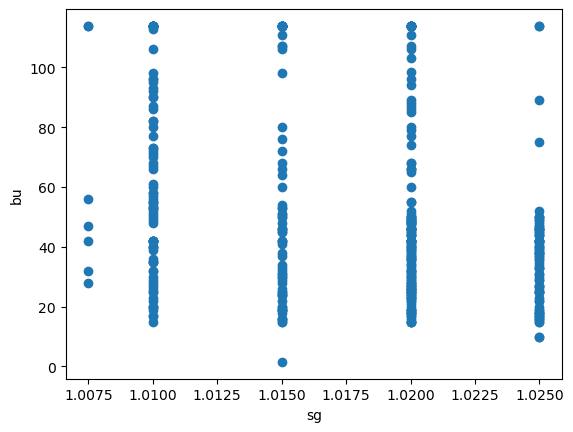



sg vs sc


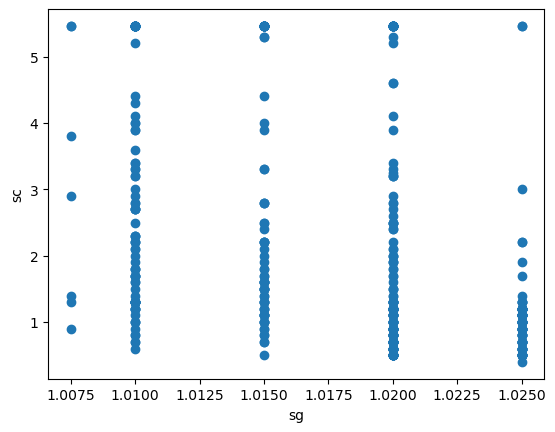



sg vs sod


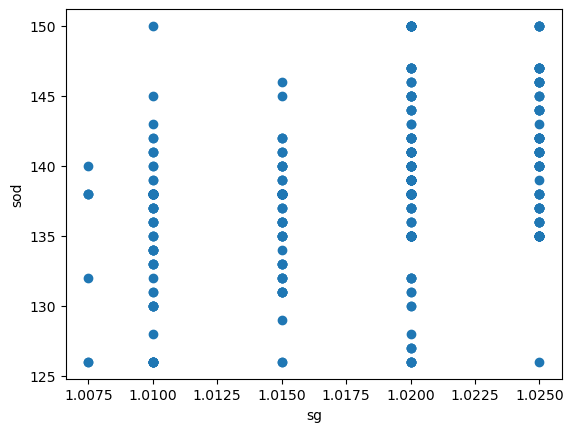



sg vs pot


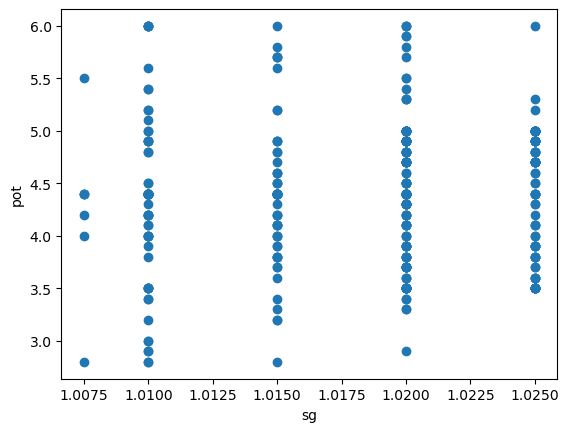



sg vs hemo


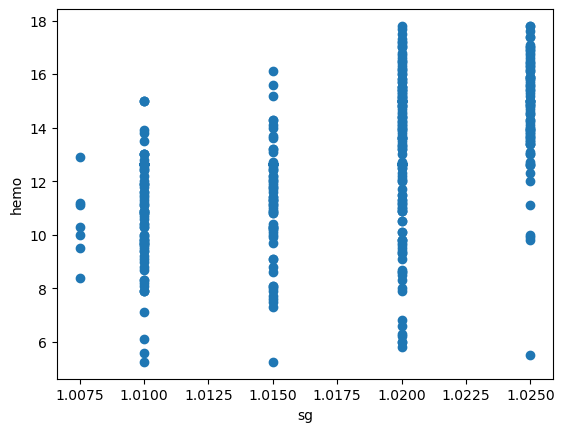



al vs su


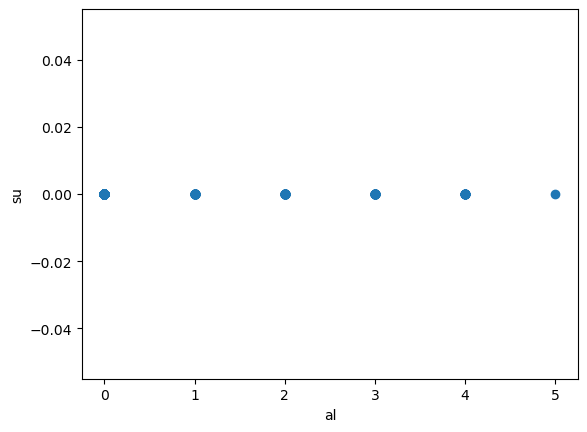



al vs bgr


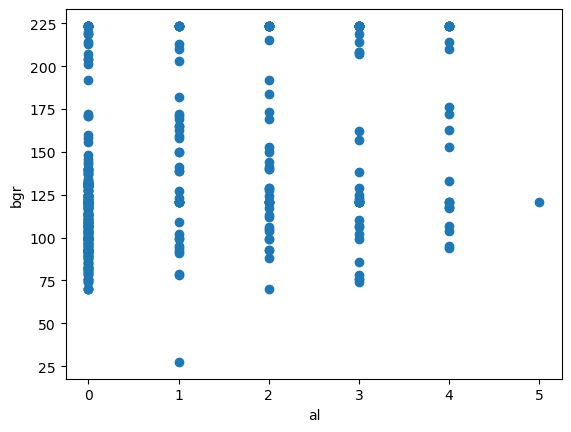



al vs bu


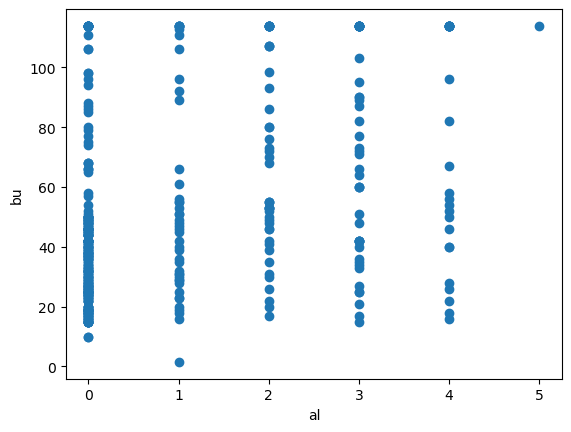



al vs sc


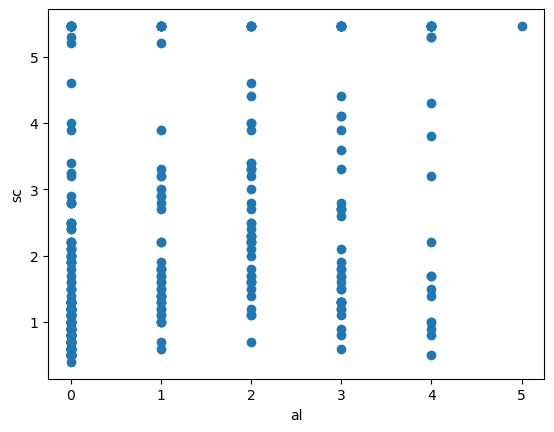



al vs sod


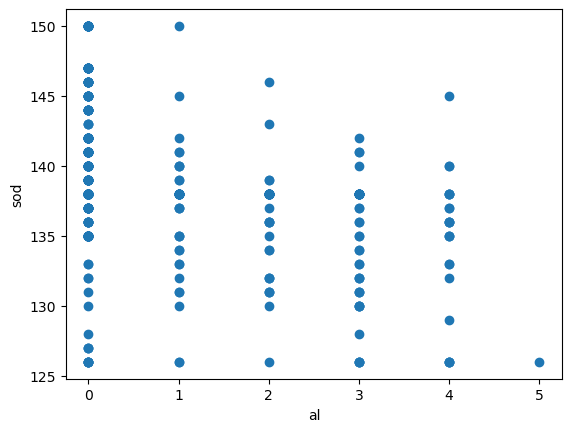



al vs pot


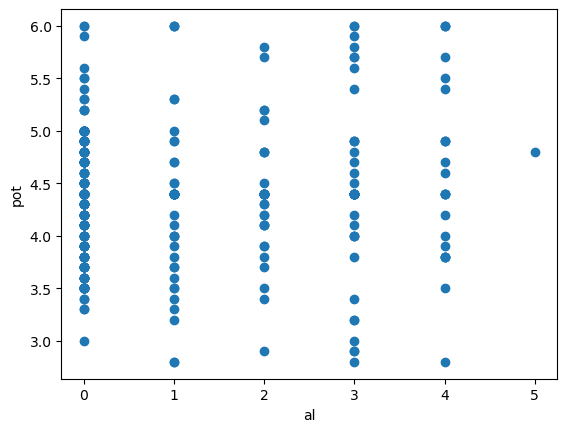



al vs hemo


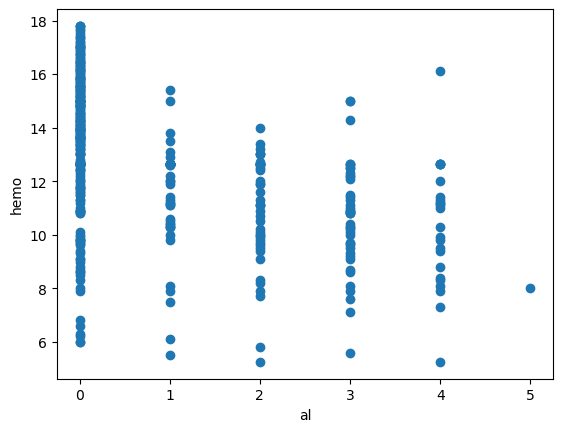



su vs bgr


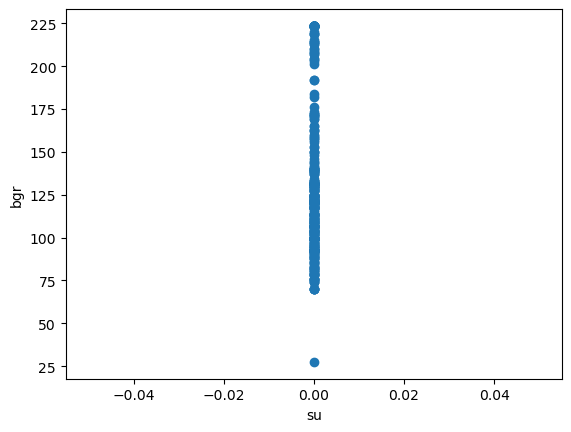



su vs bu


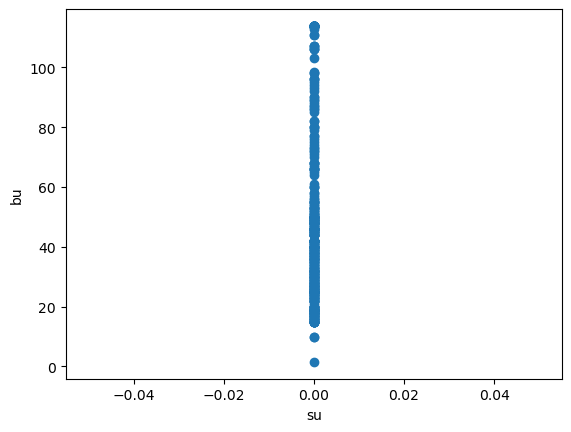



su vs sc


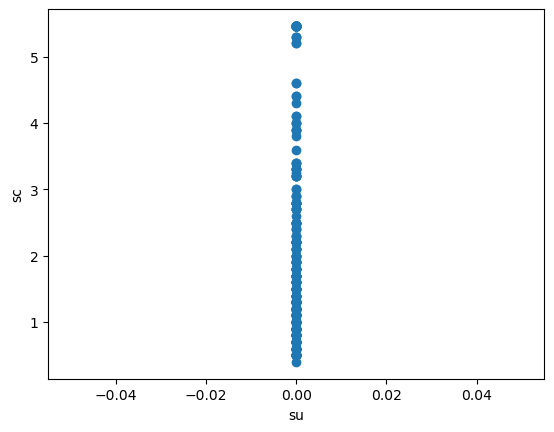



su vs sod


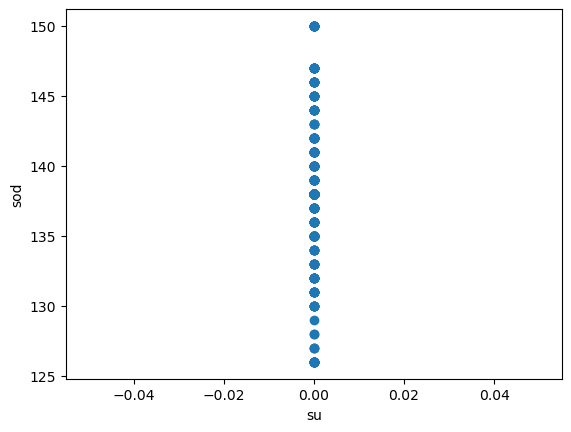



su vs pot


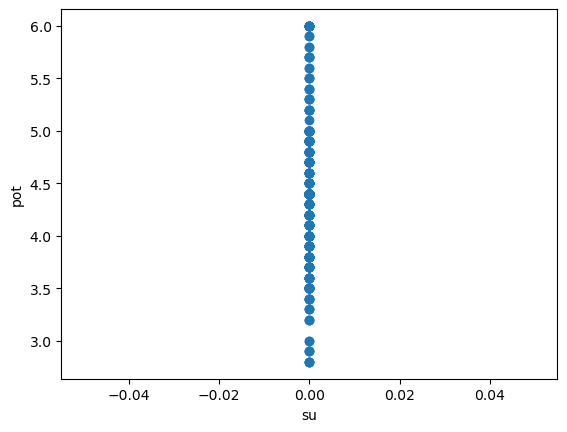



su vs hemo


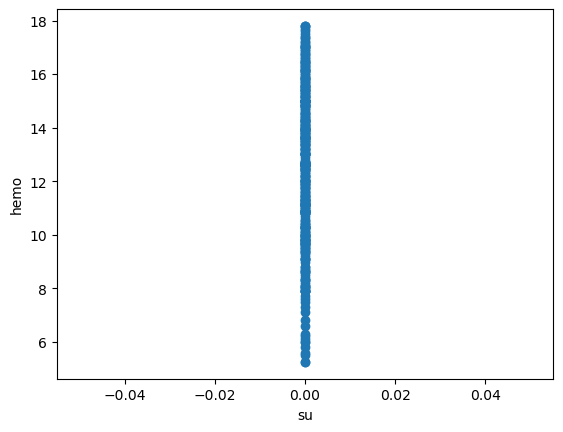



bgr vs bu


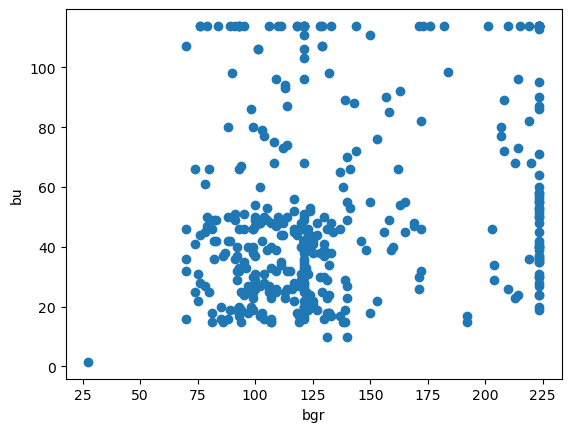



bgr vs sc


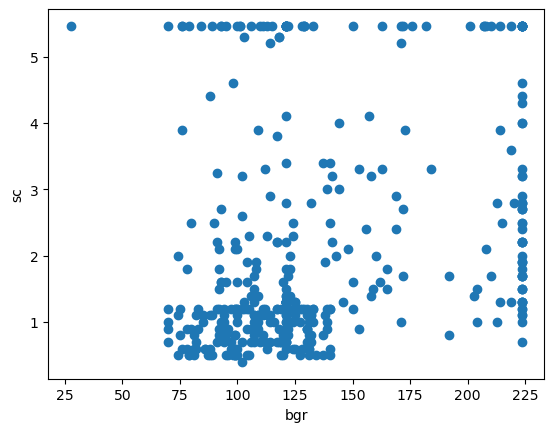



bgr vs sod


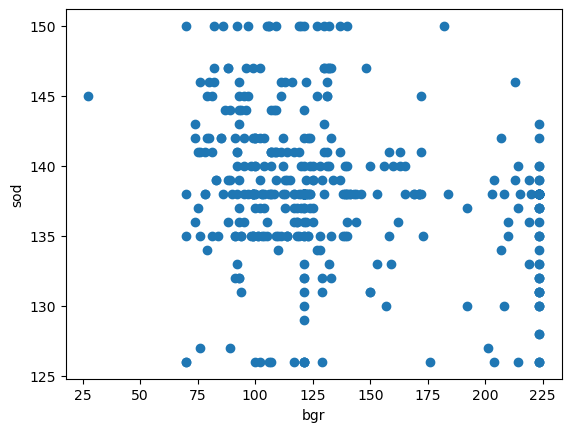



bgr vs pot


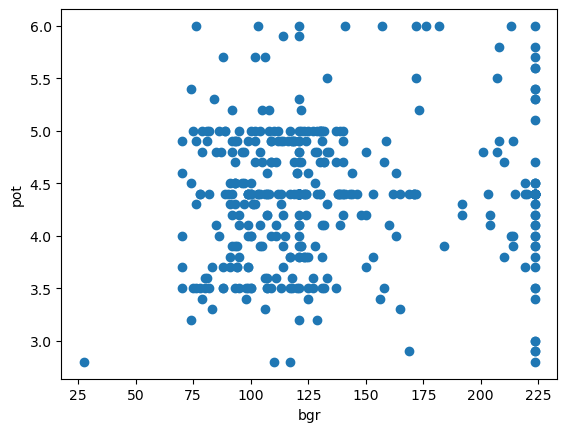



bgr vs hemo


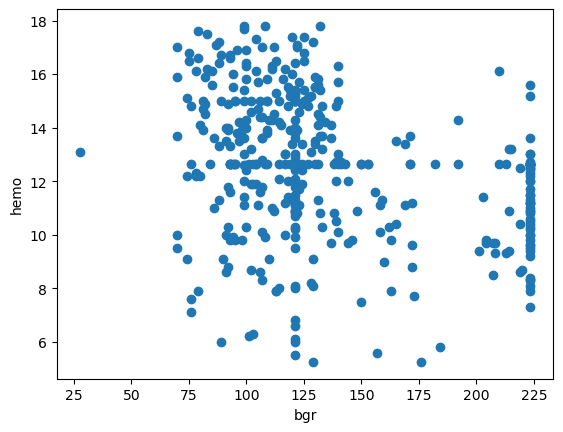



bu vs sc


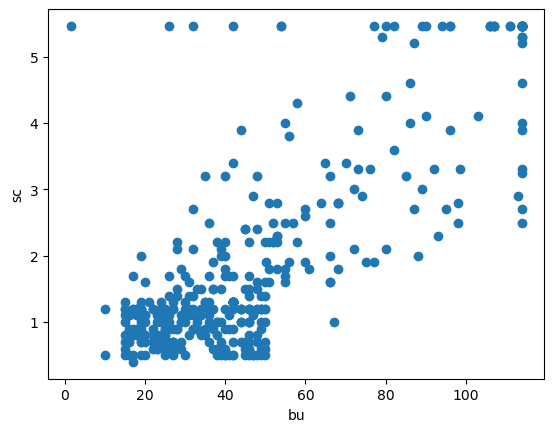



bu vs sod


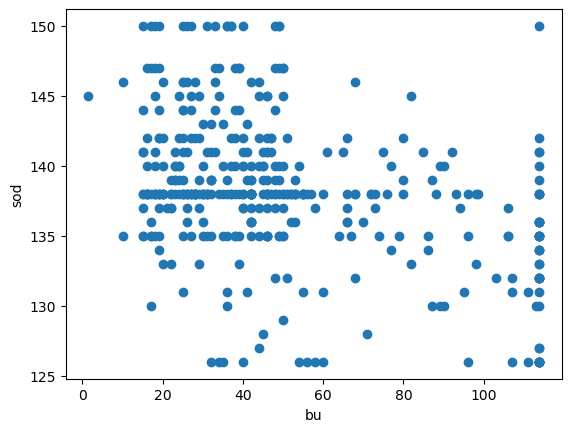



bu vs pot


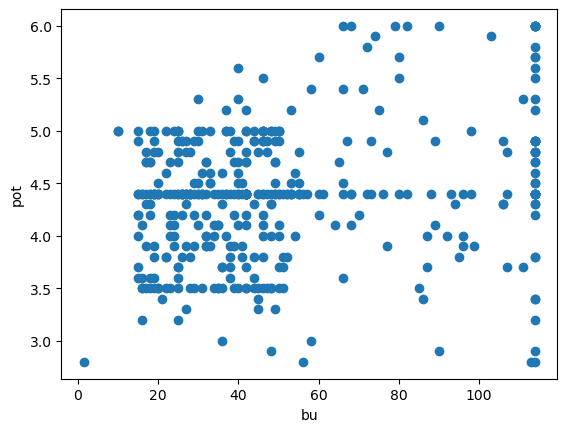



bu vs hemo


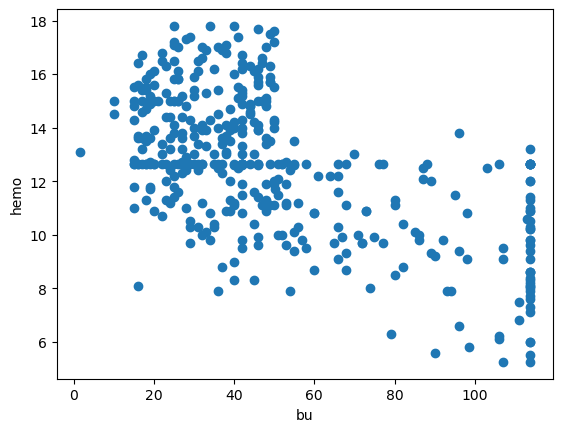



sc vs sod


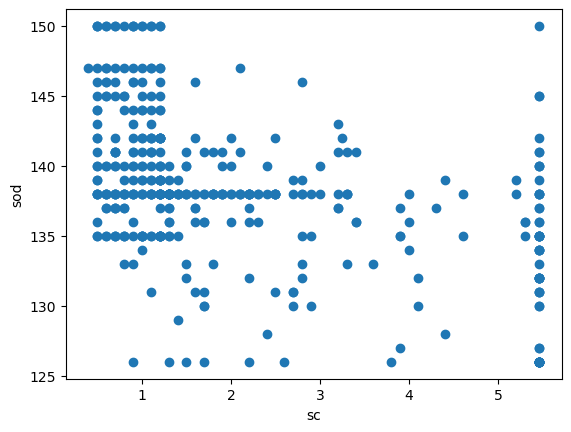



sc vs pot


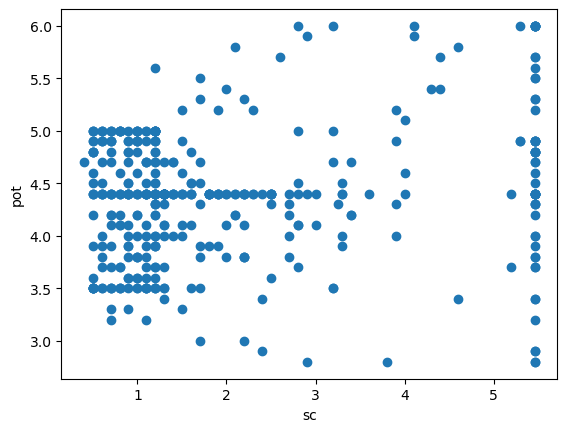



sc vs hemo


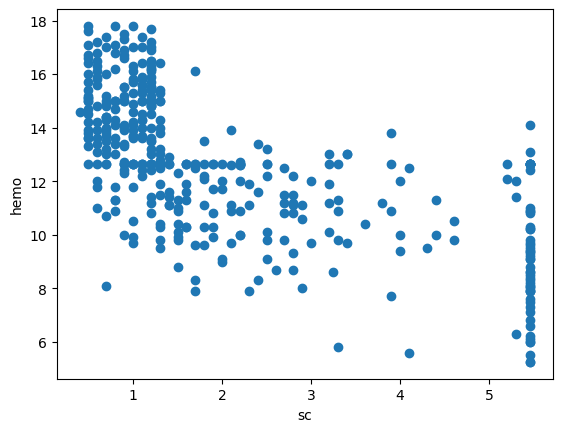



sod vs pot


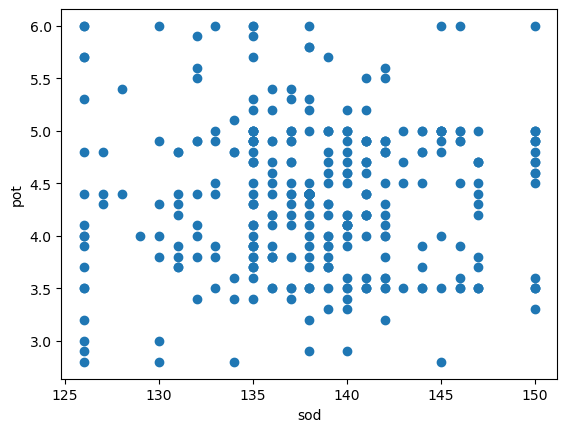



sod vs hemo


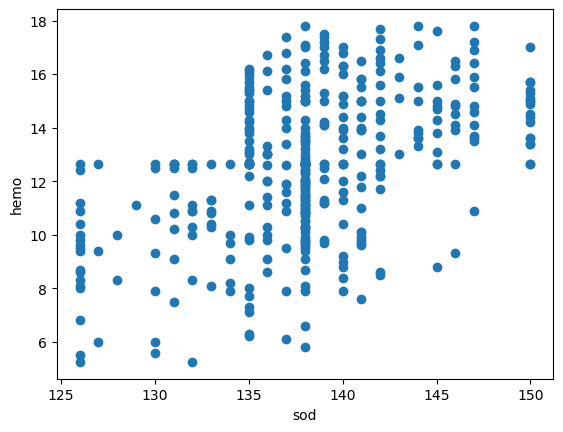



pot vs hemo


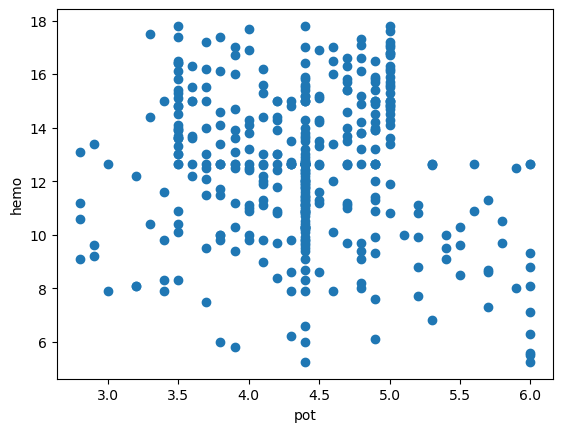

In [39]:
# Scatter Plot for Numerical Columns
tmp = []
for i in Numerical_Columns:
    for j in Numerical_Columns:
        if (i == j): continue
        tmp.append(i)
        if (j in tmp): continue
        print(i, "vs", j)
        plt.xlabel(i)
        plt.ylabel(j)
        plt.scatter(x=kidney_df_clean_2[i], y=kidney_df_clean_2[j])
        plt.show()
        print('\n')

In [40]:
kidney_df_clean_2.head()

age    bp      sg   al   su     rbc        pc         pcc          ba  \
0  48.0  80.0  1.0200  1.0  0.0  normal    normal  notpresent  notpresent   
1   9.0  55.0  1.0200  4.0  0.0  normal    normal  notpresent  notpresent   
2  62.0  80.0  1.0100  2.0  0.0  normal    normal  notpresent  notpresent   
3  48.0  70.0  1.0075  4.0  0.0  normal  abnormal     present  notpresent   
4  51.0  80.0  1.0100  2.0  0.0  normal    normal  notpresent  notpresent   

     bgr  ...  pcv    wc   rc  htn   dm cad appet   pe  ane classification  
0  121.0  ...   44  7800  5.2  yes  yes  no  good   no   no            ckd  
1  121.0  ...   38  6000  5.2   no   no  no  good   no   no            ckd  
2  223.5  ...   31  7500  5.2   no  yes  no  poor   no  yes            ckd  
3  117.0  ...   32  6700  3.9  yes   no  no  poor  yes  yes            ckd  
4  106.0  ...   35  7300  4.6   no   no  no  good   no   no            ckd  

[5 rows x 25 columns]

# 3. Processing categorical data or numerical data

In [41]:
kidney_df_clean_2.head()

age    bp      sg   al   su     rbc        pc         pcc          ba  \
0  48.0  80.0  1.0200  1.0  0.0  normal    normal  notpresent  notpresent   
1   9.0  55.0  1.0200  4.0  0.0  normal    normal  notpresent  notpresent   
2  62.0  80.0  1.0100  2.0  0.0  normal    normal  notpresent  notpresent   
3  48.0  70.0  1.0075  4.0  0.0  normal  abnormal     present  notpresent   
4  51.0  80.0  1.0100  2.0  0.0  normal    normal  notpresent  notpresent   

     bgr  ...  pcv    wc   rc  htn   dm cad appet   pe  ane classification  
0  121.0  ...   44  7800  5.2  yes  yes  no  good   no   no            ckd  
1  121.0  ...   38  6000  5.2   no   no  no  good   no   no            ckd  
2  223.5  ...   31  7500  5.2   no  yes  no  poor   no  yes            ckd  
3  117.0  ...   32  6700  3.9  yes   no  no  poor  yes  yes            ckd  
4  106.0  ...   35  7300  4.6   no   no  no  good   no   no            ckd  

[5 rows x 25 columns]

In [42]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data = kidney_df_clean_2.copy()

for feature in Categorical_Columns:
    if feature == 'classification': continue
    data[feature] = encoder.fit_transform(data[feature])

In [43]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data2 = data.copy()

data2["classification"] = encoder.fit_transform(data2["classification"])

data2['classification'] = 1 - data2['classification']

In [44]:
data2.head(20)
# yes = 1, no = 0

age    bp      sg   al   su  rbc  pc  pcc  ba    bgr  ...  pcv  wc  rc  \
0   48.0  80.0  1.0200  1.0  0.0    1   1    0   0  121.0  ...   30  69  30   
1    9.0  55.0  1.0200  4.0  0.0    1   1    0   0  121.0  ...   24  53  30   
2   62.0  80.0  1.0100  2.0  0.0    1   1    0   0  223.5  ...   17  67  30   
3   48.0  70.0  1.0075  4.0  0.0    1   0    1   0  117.0  ...   18  59  17   
4   51.0  80.0  1.0100  2.0  0.0    1   1    0   0  106.0  ...   21  65  24   
5   60.0  90.0  1.0150  3.0  0.0    1   1    0   0   74.0  ...   25  69  22   
6   68.0  70.0  1.0100  0.0  0.0    1   1    0   0  100.0  ...   22  87  30   
7   24.0  80.0  1.0150  2.0  0.0    1   0    0   0  223.5  ...   30  61  28   
8   52.0  95.0  1.0150  3.0  0.0    1   0    1   0  138.0  ...   19  85  18   
9   53.0  90.0  1.0200  2.0  0.0    0   0    1   0   70.0  ...   15  15  15   
10  50.0  60.0  1.0100  2.0  0.0    1   0    1   0  223.5  ...   14  87  30   
11  63.0  70.0  1.0100  3.0  0.0    0   0    1   0  223.5  ...   18  40  16   
12  68.0  70.0  1.0150  3.0  0.0    1   1    1   0  208.0  ...   14  16  12   
13  68.0  70.0  1.0200  0.0  0.0    1   1    0   0   98.0  ...   27  87  30   
14  68.0  80.0  1.0100  3.0  0.0    1   0    1   1  157.0  ...    2   7   4   
15  40.0  80.0  1.0150  3.0  0.0    1   1    0   0   76.0  ...   10  36   6   
16  47.0  70.0  1.0150  2.0  0.0    1   1    0   0   99.0  ...   27  87  30   
17  47.0  80.0  1.0200  0.0  0.0    1   1    0   0  114.0  ...   27  87  30   
18  60.0  95.0  1.0250  0.0  0.0    1   1    0   0  223.5  ...   23  10  21   
19  62.0  60.0  1.0150  1.0  0.0    1   0    1   0  100.0  ...   16  46  15   

    htn  dm  cad  appet  pe  ane  classification  
0     1   1    0      0   0    0               1  
1     0   0    0      0   0    0               1  
2     0   1    0      1   0    1               1  
3     1   0    0      1   1    1               1  
4     0   0    0      0   0    0               1  
5     1   1    0      0   1    0               1  
6     0   0    0      0   0    0               1  
7     0   1    0      0   1    0               1  
8     1   1    0      0   0    1               1  
9     1   1    0      1   0    1               1  
10    1   1    0      0   0    1               1  
11    1   1    0      1   1    0               1  
12    1   1    1      1   1    0               1  
13    1   1    1      1   1    0               1  
14    1   1    1      1   1    0               1  
15    1   0    0      0   0    1               1  
16    0   0    0      0   0    0               1  
17    1   0    0      1   0    0               1  
18    1   1    1      0   0    0               1  
19    1   0    1      0   0    0               1  

[20 rows x 25 columns]

### Cardiovascular

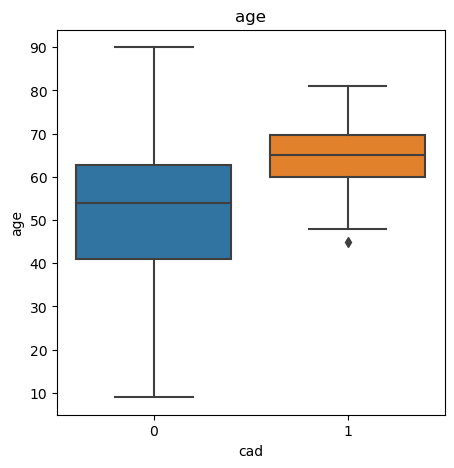

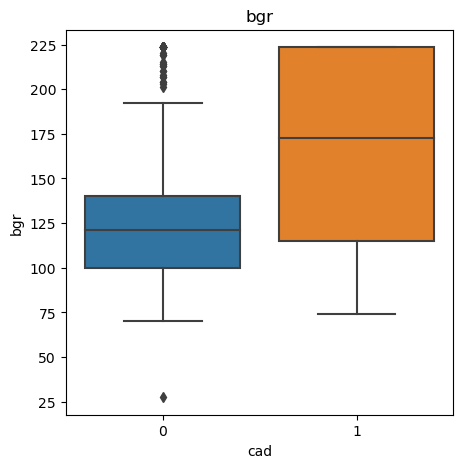

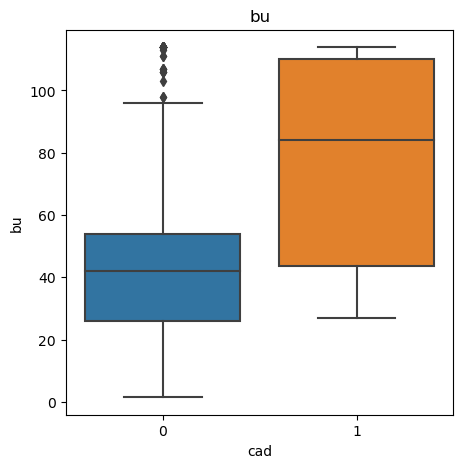

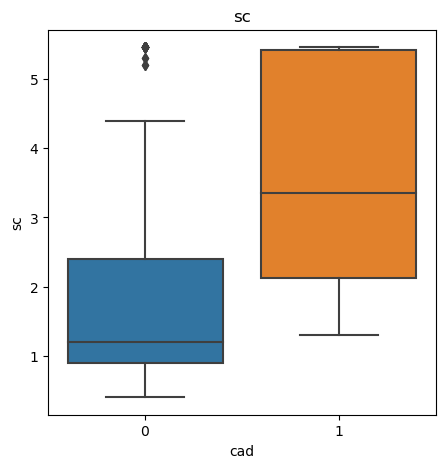

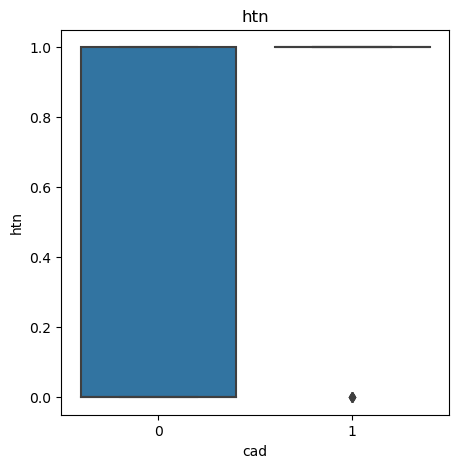

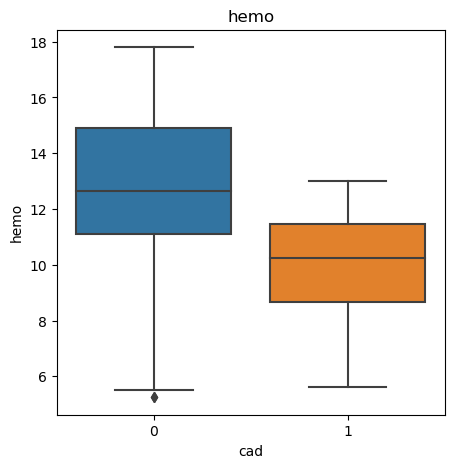

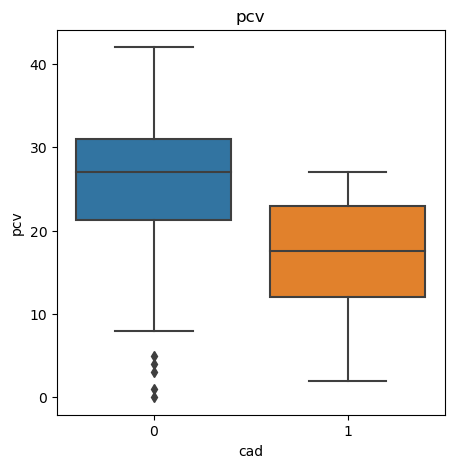

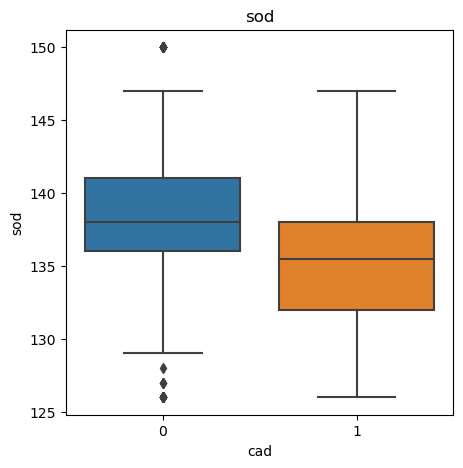

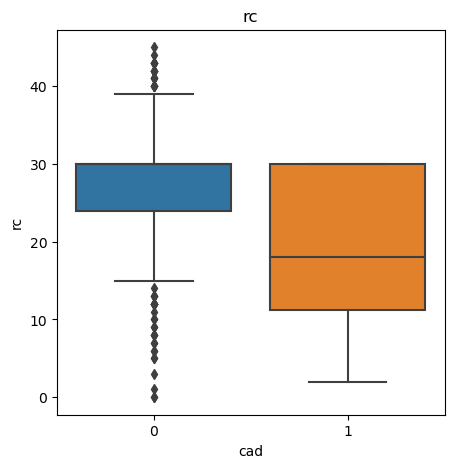

In [45]:
# Boxplot Plot
for feature in ["age", "bgr", "bu", "sc", "htn", "hemo", "pcv", "sod", "rc"]:
    plt.figure(figsize=(5,5))
    plt.title(feature)
    sns.boxplot(data=data2, x="cad", y=feature)
    plt.show()

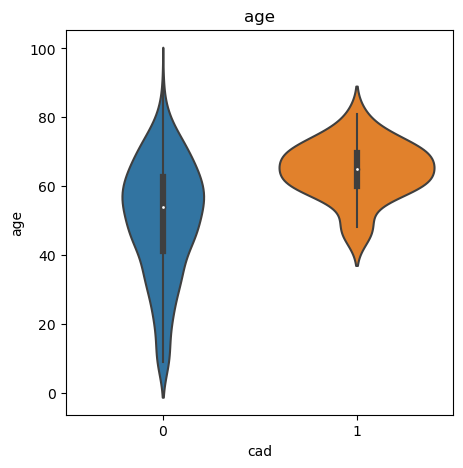

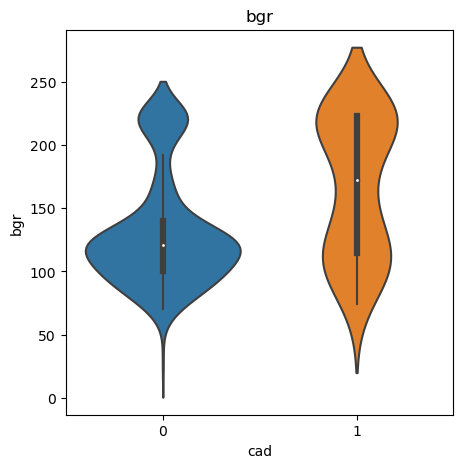

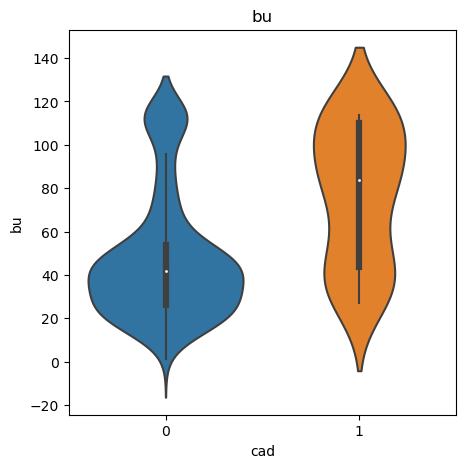

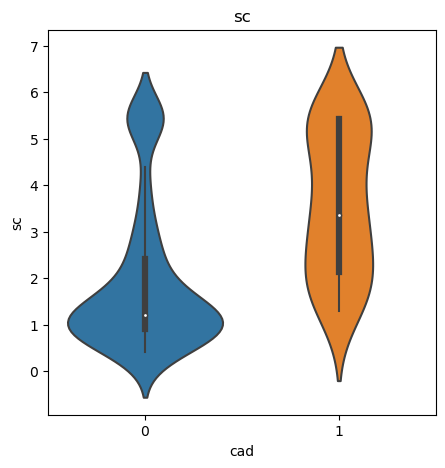

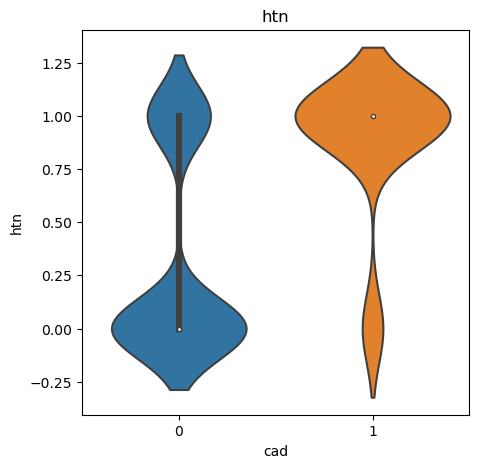

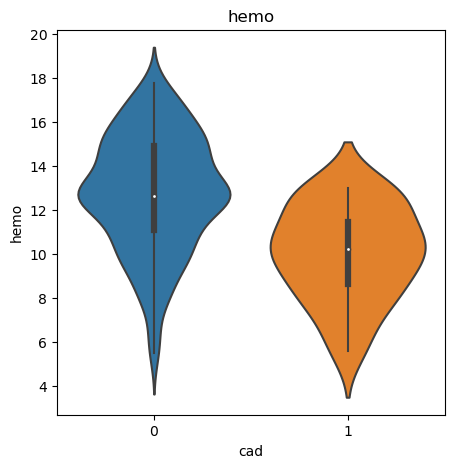

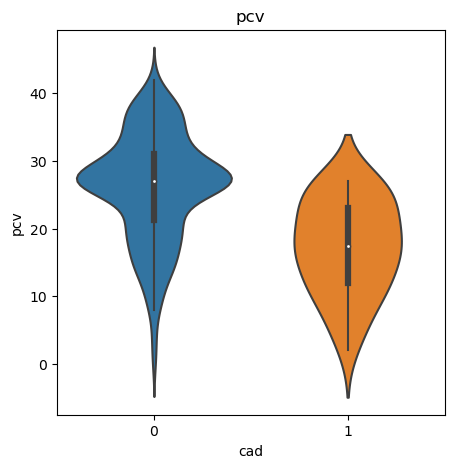

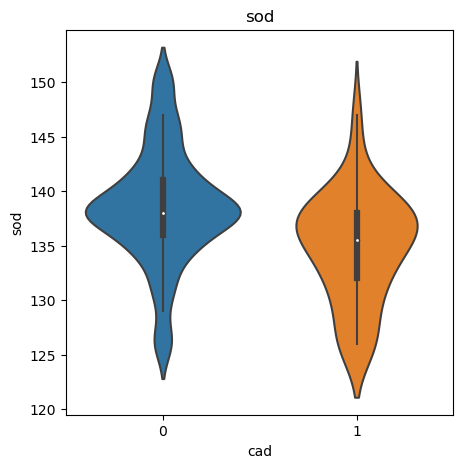

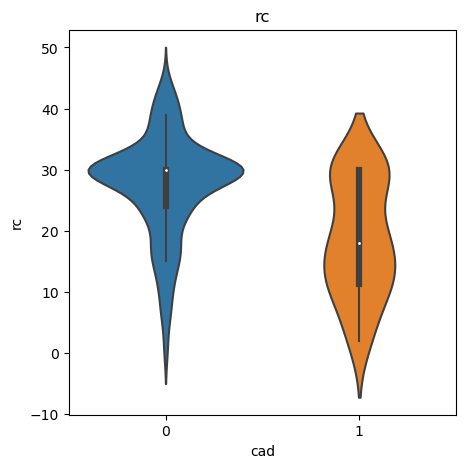

In [46]:
# Violin Plot
for feature in ["age", "bgr", "bu", "sc", "htn", "hemo", "pcv", "sod", "rc"]:
    plt.figure(figsize=(5,5))
    plt.title(feature)
    sns.violinplot(data=data2, x="cad", y=feature)
    plt.show()

### Diabetes

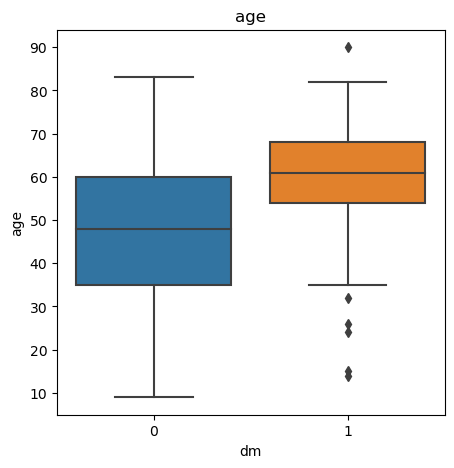

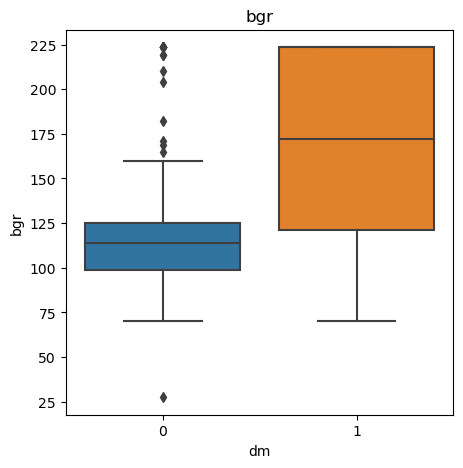

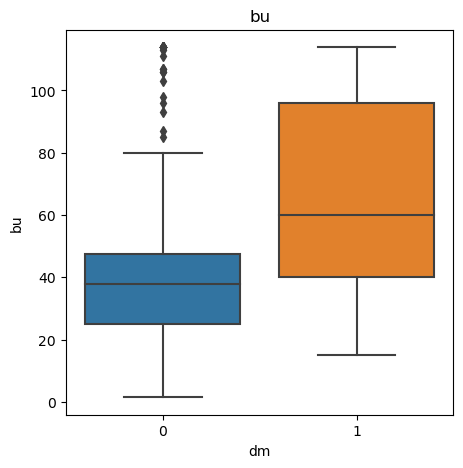

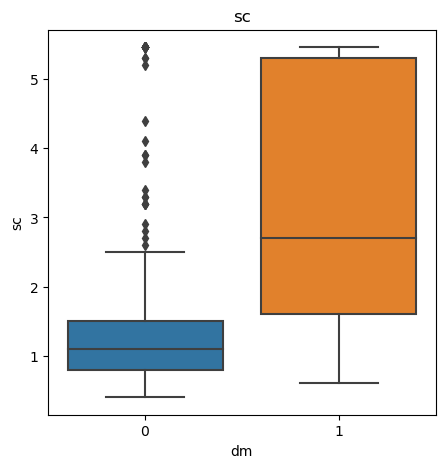

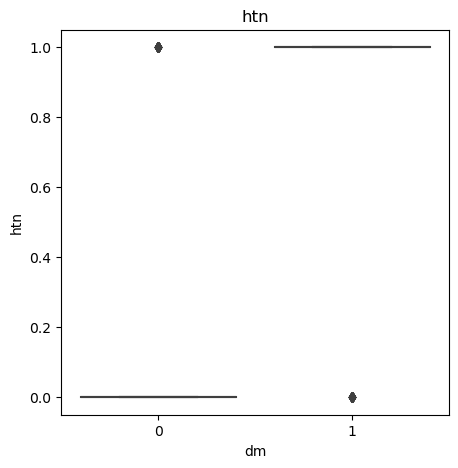

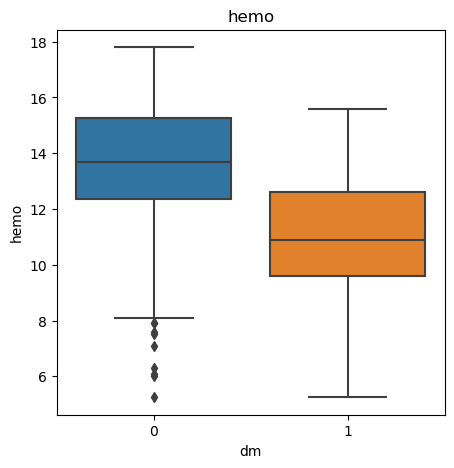

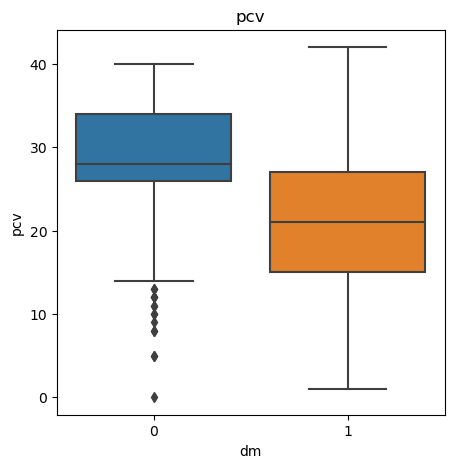

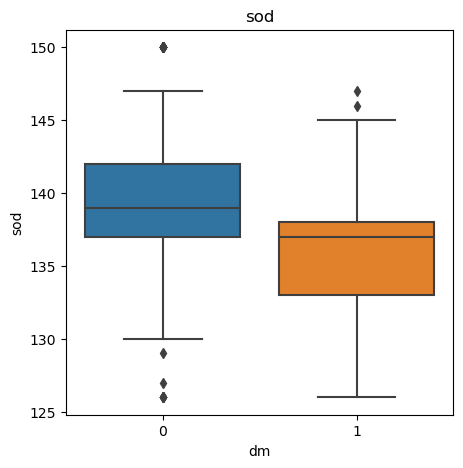

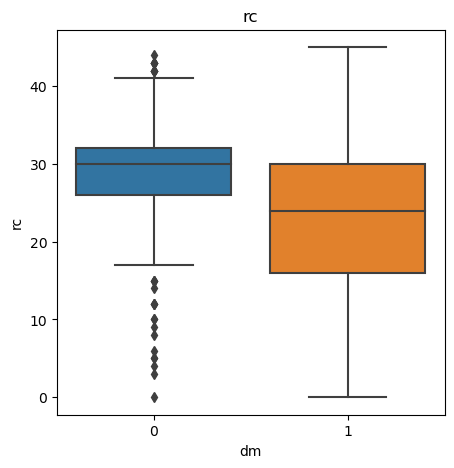

In [47]:
# Boxplot Plot
for feature in ["age", "bgr", "bu", "sc", "htn", "hemo", "pcv", "sod", "rc"]:
    plt.figure(figsize=(5,5))
    plt.title(feature)
    sns.boxplot(data=data2, x="dm", y=feature)
    plt.show()

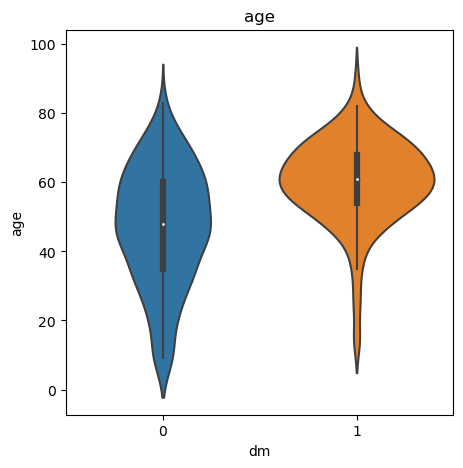

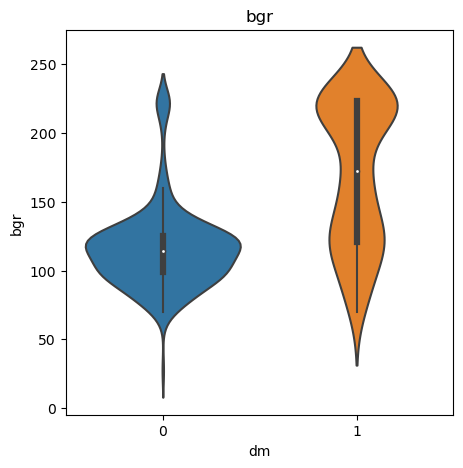

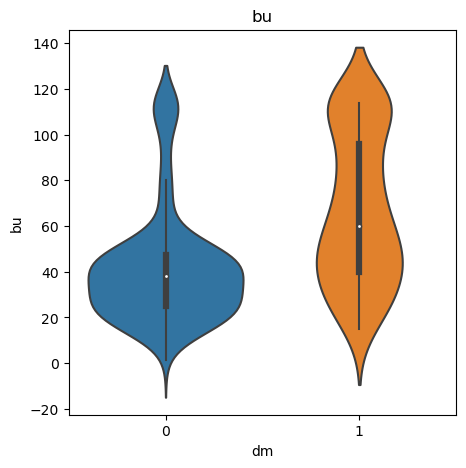

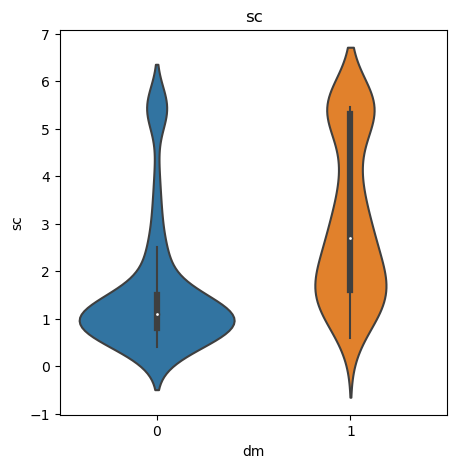

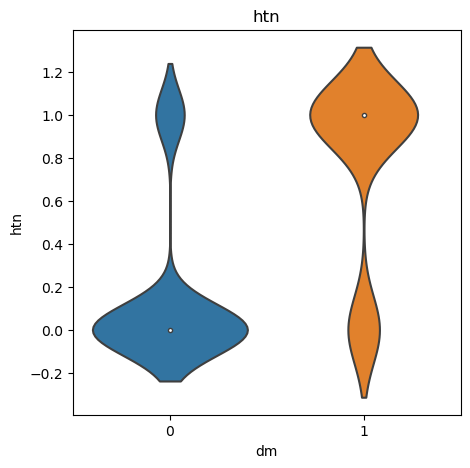

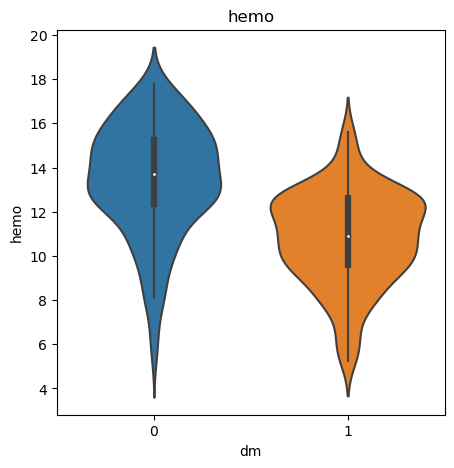

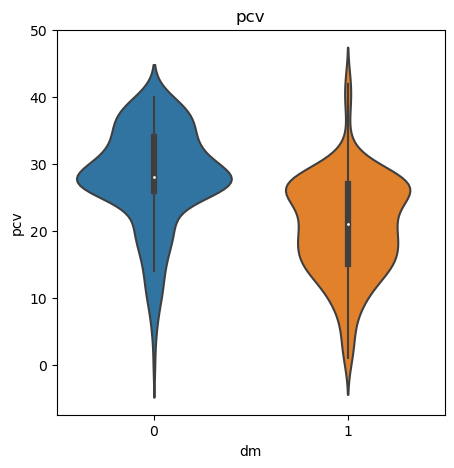

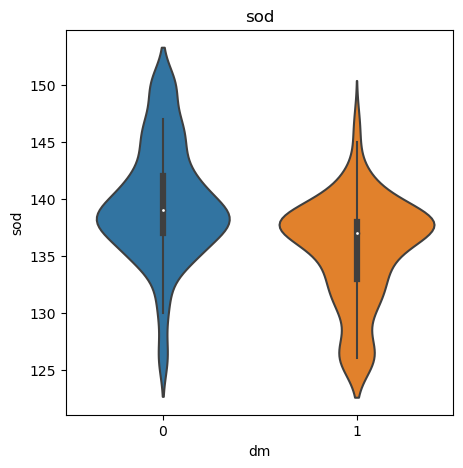

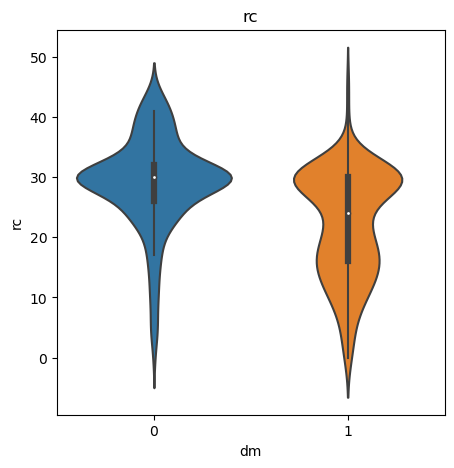

In [48]:
# Violin Plot
for feature in ["age", "bgr", "bu", "sc", "htn", "hemo", "pcv", "sod", "rc"]:
    plt.figure(figsize=(5,5))
    plt.title(feature)
    sns.violinplot(data=data2, x="dm", y=feature)
    plt.show()

## Correlation

<Axes: >

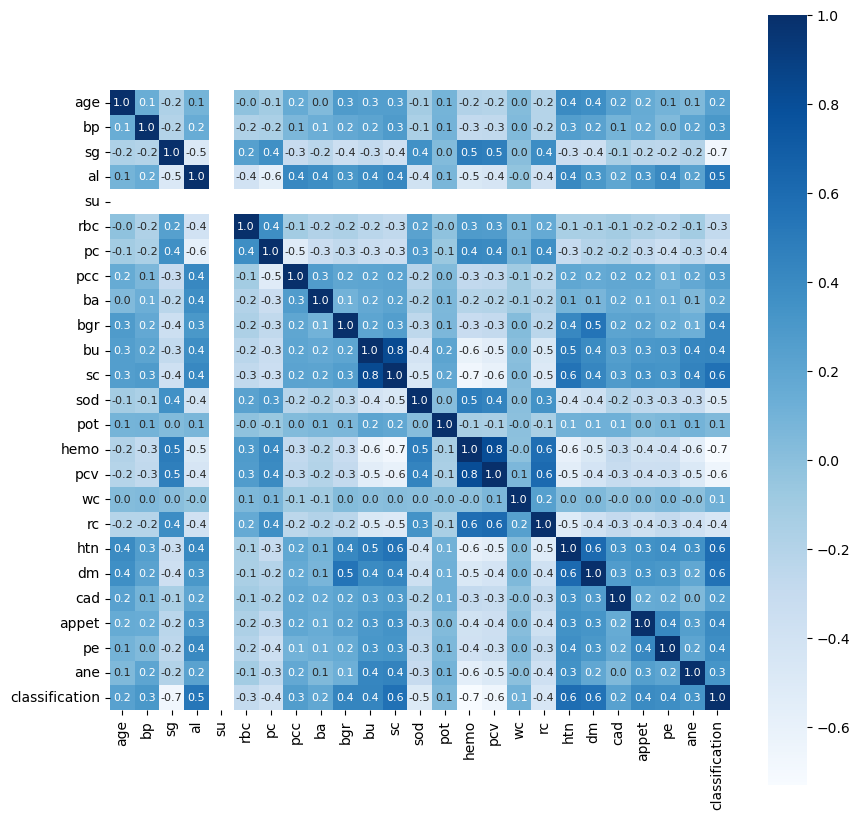

In [49]:
plt.figure(figsize=(10,10))
sns.heatmap(data2.corr(), cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [50]:
data2.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [142]:
data_man = data2.copy()

In [143]:
data_man.to_csv('out_2.csv', index=False)  

## Features Manipulation

### Create data for class 2, 4, 6

In [144]:
data_man.shape

(400, 25)

In [145]:
data_man.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

#### 4) Diabetes

In [146]:
# Define the conditions for dm == 1
conditions_high = {
    'age': 55,
    'bgr': 130,
    'bu': 50,
    'sc': 2,
    # 'htn' is a categorical feature, we will set it to 1 directly
}

conditions_low = {
    'hemo': 12,
    'pcv': 25,
    'sod': 136,
    'rc': 25,
}

# Create 50 new rows
new_rows = []

for _ in range(35):
    # Start with mean values for all columns
    new_row = data_man.mean().to_dict()
    
    # Apply the high conditions, randomizing values above the threshold but within a reasonable range
    for feature, threshold in conditions_high.items():
        new_row[feature] = np.random.uniform(threshold, data_man[feature].mean() + (data_man[feature].mean() - threshold))
    
    # Apply the low conditions, randomizing values below the threshold but within a reasonable range
    for feature, threshold in conditions_low.items():
        new_row[feature] = np.random.uniform(data_man[feature].mean() - (threshold - data_man[feature].mean()), threshold)
    
    # Set 'htn' to 1 as per the condition
    new_row['htn'] = 1
    
    # Set 'dm' to 1 as this is the target condition
    new_row['dm'] = 1
    new_row['cad'] = 0
    new_row['classification'] = 0
    
    new_rows.append(new_row)

# Convert the list of dicts to a DataFrame
new_rows_df = pd.DataFrame(new_rows)
new_rows_df.round(0)

# # Ensure that 'dm' and 'htn' are of type int (as they are categorical)
# df_augmented['dm'] = df_augmented['dm'].astype(int)
# df_augmented['htn'] = df_augmented['htn'].astype(int)

age    bp   sg   al   su  rbc   pc  pcc   ba    bgr  ...   pcv    wc  \
0   53.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  134.0  ...  25.0  61.0   
1   50.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  130.0  ...  26.0  61.0   
2   55.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  134.0  ...  25.0  61.0   
3   50.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  131.0  ...  25.0  61.0   
4   50.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  133.0  ...  25.0  61.0   
5   52.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  133.0  ...  26.0  61.0   
6   53.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  135.0  ...  26.0  61.0   
7   54.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  131.0  ...  25.0  61.0   
8   52.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  136.0  ...  25.0  61.0   
9   53.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  135.0  ...  25.0  61.0   
10  54.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  130.0  ...  25.0  61.0   
11  50.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  136.0  ...  25.0  61.0   
12  51.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  137.0  ...  26.0  61.0   
13  55.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  131.0  ...  25.0  61.0   
14  53.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  138.0  ...  25.0  61.0   
15  54.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  133.0  ...  25.0  61.0   
16  53.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  135.0  ...  26.0  61.0   
17  54.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  131.0  ...  25.0  61.0   
18  49.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  130.0  ...  26.0  61.0   
19  49.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  132.0  ...  25.0  61.0   
20  53.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  131.0  ...  26.0  61.0   
21  52.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  133.0  ...  25.0  61.0   
22  52.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  131.0  ...  25.0  61.0   
23  50.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  138.0  ...  25.0  61.0   
24  52.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  131.0  ...  25.0  61.0   
25  51.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  137.0  ...  26.0  61.0   
26  53.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  136.0  ...  25.0  61.0   
27  54.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  136.0  ...  26.0  61.0   
28  52.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  137.0  ...  26.0  61.0   
29  50.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  138.0  ...  26.0  61.0   
30  52.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  133.0  ...  25.0  61.0   
31  53.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  133.0  ...  26.0  61.0   
32  51.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  137.0  ...  26.0  61.0   
33  52.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  132.0  ...  25.0  61.0   
34  54.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  133.0  ...  26.0  61.0   

      rc  htn  dm  cad  appet   pe  ane  classification  
0   26.0    1   1    0    0.0  0.0  0.0               0  
1   25.0    1   1    0    0.0  0.0  0.0               0  
2   27.0    1   1    0    0.0  0.0  0.0               0  
3   25.0    1   1    0    0.0  0.0  0.0               0  
4   26.0    1   1    0    0.0  0.0  0.0               0  
5   28.0    1   1    0    0.0  0.0  0.0               0  
6   26.0    1   1    0    0.0  0.0  0.0               0  
7   28.0    1   1    0    0.0  0.0  0.0               0  
8   27.0    1   1    0    0.0  0.0  0.0               0  
9   26.0    1   1    0    0.0  0.0  0.0               0  
10  28.0    1   1    0    0.0  0.0  0.0               0  
11  28.0    1   1    0    0.0  0.0  0.0               0  
12  26.0    1   1    0    0.0  0.0  0.0               0  
13  25.0    1   1    0    0.0  0.0  0.0               0  
14  26.0    1   1    0    0.0  0.0  0.0               0  
15  26.0    1   1    0    0.0  0.0  0.0               0  
16  26.0    1   1    0    0.0  0.0  0.0               0  
17  26.0    1   1    0    0.0  0.0  0.0               0  
18  28.0    1   1    0    0.0  0.0  0.0               0  
19  25.0    1   1    0    0.0  0.0  0.0               0  
20  27.0    1 

In [147]:
new_rows_df.head(5)

age      bp        sg   al   su     rbc    pc    pcc     ba  \
0  52.991244  75.825  1.017756  0.9  0.0  0.8825  0.81  0.105  0.055   
1  50.120514  75.825  1.017756  0.9  0.0  0.8825  0.81  0.105  0.055   
2  54.696215  75.825  1.017756  0.9  0.0  0.8825  0.81  0.105  0.055   
3  50.257781  75.825  1.017756  0.9  0.0  0.8825  0.81  0.105  0.055   
4  49.943248  75.825  1.017756  0.9  0.0  0.8825  0.81  0.105  0.055   

          bgr  ...        pcv      wc         rc  htn  dm  cad  appet    pe  \
0  134.270314  ...  25.021568  61.465  26.350779    1   1    0  0.205  0.19   
1  130.255413  ...  25.730339  61.465  25.423510    1   1    0  0.205  0.19   
2  133.760506  ...  25.218826  61.465  27.139215    1   1    0  0.205  0.19   
3  131.159568  ...  25.111729  61.465  25.285638    1   1    0  0.205  0.19   
4  132.672570  ...  25.404036  61.465  25.792955    1   1    0  0.205  0.19   

    ane  classification  
0  0.15               0  
1  0.15               0  
2  0.15               0  
3  0.15               0  
4  0.15               0  

[5 rows x 25 columns]

In [148]:
data_man = pd.concat([data_man, new_rows_df]).reset_index()

In [149]:
data_man.drop("index", axis=1, inplace=True)

In [150]:
data_man.tail(5)

age      bp        sg   al   su     rbc    pc    pcc     ba  \
430  52.244165  75.825  1.017756  0.9  0.0  0.8825  0.81  0.105  0.055   
431  52.984401  75.825  1.017756  0.9  0.0  0.8825  0.81  0.105  0.055   
432  50.822728  75.825  1.017756  0.9  0.0  0.8825  0.81  0.105  0.055   
433  51.901575  75.825  1.017756  0.9  0.0  0.8825  0.81  0.105  0.055   
434  53.677862  75.825  1.017756  0.9  0.0  0.8825  0.81  0.105  0.055   

            bgr  ...        pcv      wc         rc  htn  dm  cad  appet    pe  \
430  132.774093  ...  25.006980  61.465  25.263154    1   1    0  0.205  0.19   
431  132.713910  ...  25.593556  61.465  27.963227    1   1    0  0.205  0.19   
432  137.274381  ...  25.755712  61.465  27.348033    1   1    0  0.205  0.19   
433  132.198358  ...  25.041538  61.465  26.348872    1   1    0  0.205  0.19   
434  132.616739  ...  25.518603  61.465  26.540369    1   1    0  0.205  0.19   

      ane  classification  
430  0.15               0  
431  0.15               0  
432  0.15               0  
433  0.15               0  
434  0.15               0  

[5 rows x 25 columns]

#### 2) Cardiovascular

In [151]:
# Define the conditions for cad == 1
conditions_high = {
    'age': 60,
    'bgr': 125,
    'bu': 40,
    'sc': 2,
    # 'htn' is a categorical feature, we will set it to 1 directly
}

conditions_low = {
    'hemo': 11,
    'pcv': 20,
    'sod': 137,
    'rc': 30,
}

# Create 50 new rows
new_rows = []

for _ in range(35):
    # Start with mean values for all columns
    new_row = data_man.mean().to_dict()
    
    # Apply the high conditions, randomizing values above the threshold but within a reasonable range
    for feature, threshold in conditions_high.items():
        new_row[feature] = np.random.uniform(threshold, data_man[feature].mean() + (data_man[feature].mean() - threshold))
    
    # Apply the low conditions, randomizing values below the threshold but within a reasonable range
    for feature, threshold in conditions_low.items():
        new_row[feature] = np.random.uniform(data_man[feature].mean() - (threshold - data_man[feature].mean()), threshold)
    
    # Set 'htn' to 1 as per the condition
    new_row['htn'] = 1
    
    # Set 'dm' to 1 as this is the target condition
    new_row['dm'] = 0
    new_row['cad'] = 1
    new_row['classification'] = 0
    
    new_rows.append(new_row)

# Convert the list of dicts to a DataFrame
new_rows_df = pd.DataFrame(new_rows)
new_rows_df.round(0)

# # Ensure that 'dm' and 'htn' are of type int (as they are categorical)
# df_augmented['dm'] = df_augmented['dm'].astype(int)
# df_augmented['htn'] = df_augmented['htn'].astype(int)

age    bp   sg   al   su  rbc   pc  pcc   ba    bgr  ...   pcv    wc  \
0   51.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  139.0  ...  27.0  61.0   
1   49.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  138.0  ...  28.0  61.0   
2   53.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  136.0  ...  29.0  61.0   
3   45.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  129.0  ...  30.0  61.0   
4   44.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  142.0  ...  29.0  61.0   
5   60.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  133.0  ...  27.0  61.0   
6   60.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  127.0  ...  27.0  61.0   
7   56.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  138.0  ...  27.0  61.0   
8   48.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  138.0  ...  22.0  61.0   
9   55.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  129.0  ...  24.0  61.0   
10  53.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  127.0  ...  25.0  61.0   
11  44.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  141.0  ...  21.0  61.0   
12  47.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  129.0  ...  30.0  61.0   
13  56.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  131.0  ...  24.0  61.0   
14  51.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  128.0  ...  22.0  61.0   
15  50.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  138.0  ...  20.0  61.0   
16  48.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  139.0  ...  26.0  61.0   
17  46.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  130.0  ...  28.0  61.0   
18  44.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  126.0  ...  25.0  61.0   
19  54.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  137.0  ...  30.0  61.0   
20  45.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  130.0  ...  21.0  61.0   
21  55.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  129.0  ...  29.0  61.0   
22  53.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  126.0  ...  20.0  61.0   
23  52.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  143.0  ...  22.0  61.0   
24  48.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  126.0  ...  26.0  61.0   
25  51.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  138.0  ...  28.0  61.0   
26  52.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  134.0  ...  26.0  61.0   
27  53.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  129.0  ...  25.0  61.0   
28  46.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  130.0  ...  21.0  61.0   
29  53.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  137.0  ...  29.0  61.0   
30  52.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  127.0  ...  22.0  61.0   
31  55.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  130.0  ...  21.0  61.0   
32  53.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  126.0  ...  23.0  61.0   
33  47.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  135.0  ...  28.0  61.0   
34  45.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  130.0  ...  20.0  61.0   

      rc  htn  dm  cad  appet   pe  ane  classification  
0   28.0    1   0    1    0.0  0.0  0.0               0  
1   27.0    1   0    1    0.0  0.0  0.0               0  
2   26.0    1   0    1    0.0  0.0  0.0               0  
3   27.0    1   0    1    0.0  0.0  0.0               0  
4   29.0    1   0    1    0.0  0.0  0.0               0  
5   25.0    1   0    1    0.0  0.0  0.0               0  
6   27.0    1   0    1    0.0  0.0  0.0               0  
7   28.0    1   0    1    0.0  0.0  0.0               0  
8   29.0    1   0    1    0.0  0.0  0.0               0  
9   29.0    1   0    1    0.0  0.0  0.0               0  
10  29.0    1   0    1    0.0  0.0  0.0               0  
11  28.0    1   0    1    0.0  0.0  0.0               0  
12  26.0    1   0    1    0.0  0.0  0.0               0  
13  28.0    1   0    1    0.0  0.0  0.0               0  
14  25.0    1   0    1    0.0  0.0  0.0               0  
15  27.0    1   0    1    0.0  0.0  0.0               0  
16  26.0    1   0    1    0.0  0.0  0.0               0  
17  28.0    1   0    1    0.0  0.0  0.0               0  
18  29.0    1   0    1    0.0  0.0  0.0               0  
19  28.0    1   0    1    0.0  0.0  0.0               0  
20  25.0    1 

In [152]:
data_man = pd.concat([data_man, new_rows_df]).reset_index()

In [153]:
data_man.drop("index", axis=1, inplace=True)

In [154]:
data_man.tail(5)

age      bp        sg   al   su     rbc    pc    pcc     ba  \
465  51.603747  75.825  1.017756  0.9  0.0  0.8825  0.81  0.105  0.055   
466  54.755063  75.825  1.017756  0.9  0.0  0.8825  0.81  0.105  0.055   
467  53.471696  75.825  1.017756  0.9  0.0  0.8825  0.81  0.105  0.055   
468  46.774833  75.825  1.017756  0.9  0.0  0.8825  0.81  0.105  0.055   
469  44.703221  75.825  1.017756  0.9  0.0  0.8825  0.81  0.105  0.055   

            bgr  ...        pcv      wc         rc  htn  dm  cad  appet    pe  \
465  126.779067  ...  21.982257  61.465  26.024428    1   0    1  0.205  0.19   
466  130.403977  ...  20.982704  61.465  25.349716    1   0    1  0.205  0.19   
467  125.831940  ...  22.597462  61.465  29.410368    1   0    1  0.205  0.19   
468  134.927908  ...  28.383327  61.465  25.586363    1   0    1  0.205  0.19   
469  129.889373  ...  20.148085  61.465  29.648045    1   0    1  0.205  0.19   

      ane  classification  
465  0.15               0  
466  0.15               0  
467  0.15               0  
468  0.15               0  
469  0.15               0  

[5 rows x 25 columns]

#### 6) Diabetes and Cardiovascular

In [155]:
# Define the conditions for cad == 1
conditions_high = {
    'age': 55,
    'bgr': 125,
    'bu': 40,
    'sc': 2,
    # 'htn' is a categorical feature, we will set it to 1 directly
}

conditions_low = {
    'hemo': 11,
    'pcv': 20,
    'sod': 136,
    'rc': 25,
}

# Create 50 new rows
new_rows = []

for _ in range(35):
    # Start with mean values for all columns
    new_row = data_man.mean().to_dict()
    
    # Apply the high conditions, randomizing values above the threshold but within a reasonable range
    for feature, threshold in conditions_high.items():
        new_row[feature] = np.random.uniform(threshold, data_man[feature].mean() + (data_man[feature].mean() - threshold))
    
    # Apply the low conditions, randomizing values below the threshold but within a reasonable range
    for feature, threshold in conditions_low.items():
        new_row[feature] = np.random.uniform(data_man[feature].mean() - (threshold - data_man[feature].mean()), threshold)
    
    # Set 'htn' to 1 as per the condition
    new_row['htn'] = 1
    
    # Set 'dm' to 1 as this is the target condition
    new_row['dm'] = 1
    new_row['cad'] = 1
    new_row['classification'] = 0
    
    new_rows.append(new_row)

# Convert the list of dicts to a DataFrame
new_rows_df = pd.DataFrame(new_rows)
new_rows_df.round(0)

# # Ensure that 'dm' and 'htn' are of type int (as they are categorical)
# df_augmented['dm'] = df_augmented['dm'].astype(int)
# df_augmented['htn'] = df_augmented['htn'].astype(int)

age    bp   sg   al   su  rbc   pc  pcc   ba    bgr  ...   pcv    wc  \
0   50.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  134.0  ...  28.0  61.0   
1   54.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  129.0  ...  27.0  61.0   
2   54.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  130.0  ...  30.0  61.0   
3   51.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  133.0  ...  22.0  61.0   
4   52.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  133.0  ...  24.0  61.0   
5   51.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  131.0  ...  27.0  61.0   
6   49.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  136.0  ...  23.0  61.0   
7   54.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  130.0  ...  20.0  61.0   
8   52.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  128.0  ...  23.0  61.0   
9   50.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  136.0  ...  24.0  61.0   
10  52.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  140.0  ...  25.0  61.0   
11  52.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  136.0  ...  20.0  61.0   
12  54.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  134.0  ...  30.0  61.0   
13  55.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  132.0  ...  24.0  61.0   
14  53.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  141.0  ...  21.0  61.0   
15  51.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  126.0  ...  31.0  61.0   
16  50.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  131.0  ...  23.0  61.0   
17  54.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  140.0  ...  26.0  61.0   
18  54.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  139.0  ...  28.0  61.0   
19  51.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  128.0  ...  22.0  61.0   
20  53.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  128.0  ...  23.0  61.0   
21  49.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  139.0  ...  22.0  61.0   
22  49.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  140.0  ...  31.0  61.0   
23  51.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  129.0  ...  22.0  61.0   
24  54.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  126.0  ...  30.0  61.0   
25  54.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  126.0  ...  25.0  61.0   
26  50.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  134.0  ...  24.0  61.0   
27  51.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  127.0  ...  30.0  61.0   
28  54.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  130.0  ...  29.0  61.0   
29  49.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  135.0  ...  30.0  61.0   
30  50.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  139.0  ...  25.0  61.0   
31  52.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  130.0  ...  25.0  61.0   
32  49.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  138.0  ...  22.0  61.0   
33  53.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  131.0  ...  29.0  61.0   
34  52.0  76.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  141.0  ...  28.0  61.0   

      rc  htn  dm  cad  appet   pe  ane  classification  
0   26.0    1   1    1    0.0  0.0  0.0               0  
1   28.0    1   1    1    0.0  0.0  0.0               0  
2   28.0    1   1    1    0.0  0.0  0.0               0  
3   26.0    1   1    1    0.0  0.0  0.0               0  
4   27.0    1   1    1    0.0  0.0  0.0               0  
5   28.0    1   1    1    0.0  0.0  0.0               0  
6   25.0    1   1    1    0.0  0.0  0.0               0  
7   25.0    1   1    1    0.0  0.0  0.0               0  
8   26.0    1   1    1    0.0  0.0  0.0               0  
9   26.0    1   1    1    0.0  0.0  0.0               0  
10  25.0    1   1    1    0.0  0.0  0.0               0  
11  26.0    1   1    1    0.0  0.0  0.0               0  
12  28.0    1   1    1    0.0  0.0  0.0               0  
13  25.0    1   1    1    0.0  0.0  0.0               0  
14  25.0    1   1    1    0.0  0.0  0.0               0  
15  26.0    1   1    1    0.0  0.0  0.0               0  
16  28.0    1   1    1    0.0  0.0  0.0               0  
17  27.0    1   1    1    0.0  0.0  0.0               0  
18  27.0    1   1    1    0.0  0.0  0.0               0  
19  26.0    1   1    1    0.0  0.0  0.0               0  
20  26.0    1 

In [156]:
data_man = pd.concat([data_man, new_rows_df]).reset_index()

In [157]:
data_man.drop("index", axis=1, inplace=True)

In [158]:
data_man.tail(5)

age      bp        sg   al   su     rbc    pc    pcc     ba  \
500  49.853938  75.825  1.017756  0.9  0.0  0.8825  0.81  0.105  0.055   
501  51.870260  75.825  1.017756  0.9  0.0  0.8825  0.81  0.105  0.055   
502  48.821576  75.825  1.017756  0.9  0.0  0.8825  0.81  0.105  0.055   
503  52.756125  75.825  1.017756  0.9  0.0  0.8825  0.81  0.105  0.055   
504  51.552293  75.825  1.017756  0.9  0.0  0.8825  0.81  0.105  0.055   

            bgr  ...        pcv      wc         rc  htn  dm  cad  appet    pe  \
500  138.694238  ...  24.566842  61.465  25.020242    1   1    1  0.205  0.19   
501  130.407178  ...  24.620195  61.465  25.343110    1   1    1  0.205  0.19   
502  137.948512  ...  22.436500  61.465  27.111764    1   1    1  0.205  0.19   
503  130.744414  ...  28.837196  61.465  27.951566    1   1    1  0.205  0.19   
504  140.592789  ...  27.792158  61.465  25.409604    1   1    1  0.205  0.19   

      ane  classification  
500  0.15               0  
501  0.15               0  
502  0.15               0  
503  0.15               0  
504  0.15               0  

[5 rows x 25 columns]

### if class == 0: return print(“None”)

In [159]:
mask_0 = ((data_man.dm == 0) & (data_man.cad == 0) & (data_man.classification == 0))

In [160]:
data_man[mask_0]

age    bp     sg   al   su  rbc   pc  pcc   ba    bgr  ...   pcv    wc  \
250  40.0  80.0  1.025  0.0  0.0  1.0  1.0  0.0  0.0  140.0  ...  34.0   2.0   
251  23.0  80.0  1.025  0.0  0.0  1.0  1.0  0.0  0.0   70.0  ...  38.0  87.0   
252  45.0  80.0  1.025  0.0  0.0  1.0  1.0  0.0  0.0   82.0  ...  32.0  80.0   
253  57.0  80.0  1.025  0.0  0.0  1.0  1.0  0.0  0.0  119.0  ...  28.0  54.0   
254  51.0  60.0  1.025  0.0  0.0  1.0  1.0  0.0  0.0   99.0  ...  35.0  74.0   
..    ...   ...    ...  ...  ...  ...  ...  ...  ...    ...  ...   ...   ...   
395  55.0  80.0  1.020  0.0  0.0  1.0  1.0  0.0  0.0  140.0  ...  33.0  59.0   
396  42.0  70.0  1.025  0.0  0.0  1.0  1.0  0.0  0.0   75.0  ...  40.0  69.0   
397  12.0  80.0  1.020  0.0  0.0  1.0  1.0  0.0  0.0  100.0  ...  35.0  58.0   
398  17.0  60.0  1.025  0.0  0.0  1.0  1.0  0.0  0.0  114.0  ...  37.0  64.0   
399  58.0  80.0  1.025  0.0  0.0  1.0  1.0  0.0  0.0  131.0  ...  39.0  60.0   

       rc  htn  dm  cad  appet   pe  ane  classification  
250  23.0    0   0    0    0.0  0.0  0.0               0  
251  28.0    0   0    0    0.0  0.0  0.0               0  
252  25.0    0   0    0    0.0  0.0  0.0               0  
253  40.0    0   0    0    0.0  0.0  0.0               0  
254  30.0    0   0    0    0.0  0.0  0.0               0  
..    ...  ...  ..  ...    ...  ...  ...             ...  
395  27.0    0   0    0    0.0  0.0  0.0               0  
396  40.0    0   0    0    0.0  0.0  0.0               0  
397  32.0    0   0    0    0.0  0.0  0.0               0  
398  37.0    0   0    0    0.0  0.0  0.0               0  
399  39.0    0   0    0    0.0  0.0  0.0               0  

[150 rows x 25 columns]

In [161]:
data_man["class"] = 0

In [162]:
data_man.head(5)

age    bp      sg   al   su  rbc   pc  pcc   ba    bgr  ...    wc    rc  \
0  48.0  80.0  1.0200  1.0  0.0  1.0  1.0  0.0  0.0  121.0  ...  69.0  30.0   
1   9.0  55.0  1.0200  4.0  0.0  1.0  1.0  0.0  0.0  121.0  ...  53.0  30.0   
2  62.0  80.0  1.0100  2.0  0.0  1.0  1.0  0.0  0.0  223.5  ...  67.0  30.0   
3  48.0  70.0  1.0075  4.0  0.0  1.0  0.0  1.0  0.0  117.0  ...  59.0  17.0   
4  51.0  80.0  1.0100  2.0  0.0  1.0  1.0  0.0  0.0  106.0  ...  65.0  24.0   

   htn  dm  cad  appet   pe  ane  classification  class  
0    1   1    0    0.0  0.0  0.0               1      0  
1    0   0    0    0.0  0.0  0.0               1      0  
2    0   1    0    1.0  0.0  1.0               1      0  
3    1   0    0    1.0  1.0  1.0               1      0  
4    0   0    0    0.0  0.0  0.0               1      0  

[5 rows x 26 columns]

### elif class == 1: return print(“Chronic Kidney”)

In [163]:
mask_1 = ((data_man.dm == 0) & (data_man.cad == 0) & (data_man.classification == 1))

In [164]:
data_man[mask_1].index

Index([  1,   3,   4,   6,  15,  16,  17,  22,  23,  24,
       ...
       220, 224, 228, 232, 233, 234, 239, 241, 243, 247],
      dtype='int64', length=105)

In [165]:
data_man["class"] = np.where((data_man.dm == 0) & (data_man.cad == 0) & (data_man.classification == 1), 1, data_man["class"])

In [166]:
data_man.iloc[[1, 3, 4, 6, 15, 16, 17, 22, 23, 24]]

age    bp      sg   al   su  rbc   pc  pcc   ba    bgr  ...    wc    rc  \
1    9.0  55.0  1.0200  4.0  0.0  1.0  1.0  0.0  0.0  121.0  ...  53.0  30.0   
3   48.0  70.0  1.0075  4.0  0.0  1.0  0.0  1.0  0.0  117.0  ...  59.0  17.0   
4   51.0  80.0  1.0100  2.0  0.0  1.0  1.0  0.0  0.0  106.0  ...  65.0  24.0   
6   68.0  70.0  1.0100  0.0  0.0  1.0  1.0  0.0  0.0  100.0  ...  87.0  30.0   
15  40.0  80.0  1.0150  3.0  0.0  1.0  1.0  0.0  0.0   76.0  ...  36.0   6.0   
16  47.0  70.0  1.0150  2.0  0.0  1.0  1.0  0.0  0.0   99.0  ...  87.0  30.0   
17  47.0  80.0  1.0200  0.0  0.0  1.0  1.0  0.0  0.0  114.0  ...  87.0  30.0   
22  48.0  80.0  1.0250  4.0  0.0  1.0  0.0  0.0  0.0   95.0  ...  61.0  12.0   
23  21.0  70.0  1.0100  0.0  0.0  1.0  1.0  0.0  0.0  121.0  ...  87.0  30.0   
24  42.0  95.0  1.0150  4.0  0.0  1.0  0.0  0.0  1.0  121.0  ...  74.0  24.0   

    htn  dm  cad  appet   pe  ane  classification  class  
1     0   0    0    0.0  0.0  0.0               1      1  
3     1   0    0    1.0  1.0  1.0               1      1  
4     0   0    0    0.0  0.0  0.0               1      1  
6     0   0    0    0.0  0.0  0.0               1      1  
15    1   0    0    0.0  0.0  1.0               1      1  
16    0   0    0    0.0  0.0  0.0               1      1  
17    1   0    0    1.0  0.0  0.0               1      1  
22    1   0    0    0.0  0.0  1.0               1      1  
23    0   0    0    1.0  0.0  1.0               1      1  
24    1   0    0    1.0  0.0  0.0               1      1  

[10 rows x 26 columns]

### elif class == 2: return print(“Cardiovascular”)

In [167]:
mask_2 = ((data_man.dm == 0) & (data_man.cad == 1) & (data_man.classification == 0))

In [168]:
data_man[mask_2].index

Index([435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448,
       449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462,
       463, 464, 465, 466, 467, 468, 469],
      dtype='int64')

In [169]:
data_man["class"] = np.where((data_man.dm == 0) & (data_man.cad == 1) & (data_man.classification == 0), 1, data_man["class"])

In [170]:
data_man.iloc[[435, 436, 437, 453, 468, 469]]

age      bp        sg   al   su     rbc    pc    pcc     ba  \
435  51.277091  75.825  1.017756  0.9  0.0  0.8825  0.81  0.105  0.055   
436  48.998992  75.825  1.017756  0.9  0.0  0.8825  0.81  0.105  0.055   
437  53.399257  75.825  1.017756  0.9  0.0  0.8825  0.81  0.105  0.055   
453  43.525562  75.825  1.017756  0.9  0.0  0.8825  0.81  0.105  0.055   
468  46.774833  75.825  1.017756  0.9  0.0  0.8825  0.81  0.105  0.055   
469  44.703221  75.825  1.017756  0.9  0.0  0.8825  0.81  0.105  0.055   

            bgr  ...      wc         rc  htn  dm  cad  appet    pe   ane  \
435  138.967558  ...  61.465  27.528670    1   0    1  0.205  0.19  0.15   
436  137.598963  ...  61.465  26.650964    1   0    1  0.205  0.19  0.15   
437  136.158162  ...  61.465  25.830257    1   0    1  0.205  0.19  0.15   
453  126.472098  ...  61.465  28.596600    1   0    1  0.205  0.19  0.15   
468  134.927908  ...  61.465  25.586363    1   0    1  0.205  0.19  0.15   
469  129.889373  ...  61.465  29.648045    1   0    1  0.205  0.19  0.15   

     classification  class  
435               0      1  
436               0      1  
437               0      1  
453               0      1  
468               0      1  
469               0      1  

[6 rows x 26 columns]

### elif class == 3: return print(“Cardiovascular and Chronic Kidney”)

In [171]:
mask_3 = ((data_man.dm == 0) & (data_man.cad == 1) & (data_man.classification == 1))

In [172]:
data_man[mask_3].index

Index([19, 29, 54, 90, 199, 235, 245, 246], dtype='int64')

In [173]:
data_man["class"] = np.where((data_man.dm == 0) & (data_man.cad == 1) & (data_man.classification == 1), 3, data_man["class"])

In [174]:
data_man.iloc[[19, 29, 54, 90, 199, 235, 245, 246]]

age    bp      sg   al   su  rbc   pc  pcc   ba    bgr  ...    wc    rc  \
19   62.0  60.0  1.0150  1.0  0.0  1.0  0.0  1.0  0.0  100.0  ...  46.0  15.0   
29   68.0  70.0  1.0075  1.0  0.0  0.0  0.0  1.0  0.0  121.0  ...  87.0  30.0   
54   63.0  80.0  1.0100  2.0  0.0  1.0  1.0  0.0  0.0  121.0  ...  87.0  20.0   
90   63.0  95.0  1.0100  2.0  0.0  1.0  1.0  0.0  1.0  223.5  ...  87.0  20.0   
199  65.0  80.0  1.0150  0.0  0.0  1.0  1.0  0.0  0.0   92.0  ...   4.0  10.0   
235  45.0  70.0  1.0100  2.0  0.0  1.0  1.0  0.0  0.0  113.0  ...  50.0  30.0   
245  48.0  95.0  1.0200  0.0  0.0  1.0  1.0  0.0  0.0  103.0  ...  64.0   4.0   
246  48.0  95.0  1.0150  3.0  0.0  0.0  1.0  1.0  0.0  106.0  ...  43.0   3.0   

     htn  dm  cad  appet   pe  ane  classification  class  
19     1   0    1    0.0  0.0  0.0               1      3  
29     0   0    1    0.0  0.0  0.0               1      3  
54     1   0    1    0.0  0.0  0.0               1      3  
90     1   0    1    0.0  0.0  0.0               1      3  
199    1   0    1    0.0  1.0  0.0               1      3  
235    0   0    1    0.0  0.0  1.0               1      3  
245    1   0    1    1.0  0.0  0.0               1      3  
246    1   0    1    0.0  0.0  1.0               1      3  

[8 rows x 26 columns]

### elif class == 4: return print(“Diabetes”)

In [175]:
mask_4 = ((data_man.dm == 1) & (data_man.cad == 0) & (data_man.classification == 0))

In [176]:
data_man[mask_4].index

Index([400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413,
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427,
       428, 429, 430, 431, 432, 433, 434],
      dtype='int64')

In [177]:
data_man["class"] = np.where((data_man.dm == 1) & (data_man.cad == 0) & (data_man.classification == 0), 4, data_man["class"])

In [178]:
data_man.iloc[[400, 401, 416]]

age      bp        sg   al   su     rbc    pc    pcc     ba  \
400  52.991244  75.825  1.017756  0.9  0.0  0.8825  0.81  0.105  0.055   
401  50.120514  75.825  1.017756  0.9  0.0  0.8825  0.81  0.105  0.055   
416  52.955782  75.825  1.017756  0.9  0.0  0.8825  0.81  0.105  0.055   

            bgr  ...      wc         rc  htn  dm  cad  appet    pe   ane  \
400  134.270314  ...  61.465  26.350779    1   1    0  0.205  0.19  0.15   
401  130.255413  ...  61.465  25.423510    1   1    0  0.205  0.19  0.15   
416  134.977578  ...  61.465  25.761793    1   1    0  0.205  0.19  0.15   

     classification  class  
400               0      4  
401               0      4  
416               0      4  

[3 rows x 26 columns]

### elif class == 5: return print(“Diabetes and Chronic Kidney”)

In [179]:
mask_5 = ((data_man.dm == 1) & (data_man.cad == 0) & (data_man.classification == 1))

In [180]:
data_man[mask_5].index

Index([  0,   2,   5,   7,   8,   9,  10,  11,  25,  26,
       ...
       225, 226, 227, 229, 230, 237, 238, 240, 244, 249],
      dtype='int64', length=111)

In [181]:
data_man["class"] = np.where((data_man.dm == 1) & (data_man.cad == 0) & (data_man.classification == 1), 5, data_man["class"])

In [182]:
data_man.iloc[[0, 2, 5, 226, 244, 249]]

age    bp     sg   al   su  rbc   pc  pcc   ba    bgr  ...    wc    rc  \
0    48.0  80.0  1.020  1.0  0.0  1.0  1.0  0.0  0.0  121.0  ...  69.0  30.0   
2    62.0  80.0  1.010  2.0  0.0  1.0  1.0  0.0  0.0  223.5  ...  67.0  30.0   
5    60.0  90.0  1.015  3.0  0.0  1.0  1.0  0.0  0.0   74.0  ...  69.0  22.0   
226  64.0  95.0  1.015  4.0  0.0  0.0  0.0  0.0  1.0  163.0  ...  67.0  12.0   
244  64.0  90.0  1.015  3.0  0.0  1.0  0.0  1.0  0.0  223.5  ...  87.0  24.0   
249  56.0  90.0  1.010  4.0  0.0  1.0  0.0  1.0  0.0  176.0  ...  47.0   0.0   

     htn  dm  cad  appet   pe  ane  classification  class  
0      1   1    0    0.0  0.0  0.0               1      5  
2      0   1    0    1.0  0.0  1.0               1      5  
5      1   1    0    0.0  1.0  0.0               1      5  
226    1   1    0    0.0  1.0  0.0               1      5  
244    1   1    0    0.0  0.0  1.0               1      5  
249    1   1    0    1.0  1.0  1.0               1      5  

[6 rows x 26 columns]

### elif class == 6: return print(“Diabetes and Cardiovascular”)

In [183]:
mask_6 = ((data_man.dm == 1) & (data_man.cad == 1) & (data_man.classification == 0))

In [184]:
data_man[mask_6].index

Index([470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483,
       484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497,
       498, 499, 500, 501, 502, 503, 504],
      dtype='int64')

In [185]:
data_man["class"] = np.where((data_man.dm == 1) & (data_man.cad == 1) & (data_man.classification == 0), 6, data_man["class"])

In [186]:
data_man.iloc[[470, 471, 472, 503, 504]]

age      bp        sg   al   su     rbc    pc    pcc     ba  \
470  49.907515  75.825  1.017756  0.9  0.0  0.8825  0.81  0.105  0.055   
471  53.941209  75.825  1.017756  0.9  0.0  0.8825  0.81  0.105  0.055   
472  53.794133  75.825  1.017756  0.9  0.0  0.8825  0.81  0.105  0.055   
503  52.756125  75.825  1.017756  0.9  0.0  0.8825  0.81  0.105  0.055   
504  51.552293  75.825  1.017756  0.9  0.0  0.8825  0.81  0.105  0.055   

            bgr  ...      wc         rc  htn  dm  cad  appet    pe   ane  \
470  133.710711  ...  61.465  26.240448    1   1    1  0.205  0.19  0.15   
471  128.776074  ...  61.465  28.342011    1   1    1  0.205  0.19  0.15   
472  130.117900  ...  61.465  28.286356    1   1    1  0.205  0.19  0.15   
503  130.744414  ...  61.465  27.951566    1   1    1  0.205  0.19  0.15   
504  140.592789  ...  61.465  25.409604    1   1    1  0.205  0.19  0.15   

     classification  class  
470               0      6  
471               0      6  
472               0      6  
503               0      6  
504               0      6  

[5 rows x 26 columns]

### elif class == 7: return print(“All of them”)

In [187]:
mask_7 = ((data_man.dm == 1) & (data_man.cad == 1) & (data_man.classification == 1))

In [188]:
data_man[mask_7].index

Index([ 12,  13,  14,  18,  20,  21,  27,  56,  57,  58,  92,  93,  96, 111,
       120, 145, 158, 160, 184, 195, 201, 210, 231, 236, 242, 248],
      dtype='int64')

In [189]:
data_man["class"] = np.where((data_man.dm == 1) & (data_man.cad == 1) & (data_man.classification == 1), 7, data_man["class"])

In [190]:
data_man.iloc[[12, 13, 14, 184, 195, 248]]

age    bp     sg   al   su  rbc   pc  pcc   ba    bgr  ...    wc    rc  \
12   68.0  70.0  1.015  3.0  0.0  1.0  1.0  1.0  0.0  208.0  ...  16.0  12.0   
13   68.0  70.0  1.020  0.0  0.0  1.0  1.0  0.0  0.0   98.0  ...  87.0  30.0   
14   68.0  80.0  1.010  3.0  0.0  1.0  0.0  1.0  1.0  157.0  ...   7.0   4.0   
184  54.0  60.0  1.015  3.0  0.0  1.0  0.0  0.0  0.0  223.5  ...  51.0  14.0   
195  70.0  90.0  1.020  2.0  0.0  0.0  0.0  0.0  1.0  184.0  ...  87.0  30.0   
248  59.0  70.0  1.010  1.0  0.0  0.0  0.0  0.0  0.0  223.5  ...   0.0  19.0   

     htn  dm  cad  appet   pe  ane  classification  class  
12     1   1    1    1.0  1.0  0.0               1      7  
13     1   1    1    1.0  1.0  0.0               1      7  
14     1   1    1    1.0  1.0  0.0               1      7  
184    1   1    1    1.0  1.0  0.0               1      7  
195    1   1    1    1.0  0.0  0.0               1      7  
248    1   1    1    0.0  0.0  0.0               1      7  

[6 rows x 26 columns]

In [191]:
data_man.drop(columns=["su", "rbc", "pc", "pcc", "ba", "pot", "wc", "dm", "cad", "ane", "classification"], inplace=True)

In [192]:
data_man.head(5)

age    bp      sg   al    bgr    bu   sc    sod  hemo   pcv    rc  htn  \
0  48.0  80.0  1.0200  1.0  121.0  36.0  1.2  138.0  15.4  30.0  30.0    1   
1   9.0  55.0  1.0200  4.0  121.0  18.0  0.8  138.0  11.3  24.0  30.0    0   
2  62.0  80.0  1.0100  2.0  223.5  53.0  1.8  138.0   9.6  17.0  30.0    0   
3  48.0  70.0  1.0075  4.0  117.0  56.0  3.8  126.0  11.2  18.0  17.0    1   
4  51.0  80.0  1.0100  2.0  106.0  26.0  1.4  138.0  11.6  21.0  24.0    0   

   appet   pe  class  
0    0.0  0.0      5  
1    0.0  0.0      1  
2    1.0  0.0      5  
3    1.0  1.0      1  
4    0.0  0.0      1

In [193]:
data_man.shape

(505, 15)

# 4. Train/Test splitting and Feature Scaling

In [201]:
X = data_man.iloc[:, :-1].values # Don't include loan_id as it has no predictive power toward the target variable
Y = data_man.iloc[:, -1].values # All rows but only the last column (-1) => Y keeps the target variable (loan_status which is 1 or 0)

print(X)
print(Y)

[[48.         80.          1.02       ...  1.          0.
   0.        ]
 [ 9.         55.          1.02       ...  0.          0.
   0.        ]
 [62.         80.          1.01       ...  0.          1.
   0.        ]
 ...
 [48.82157558 75.825       1.01775625 ...  1.          0.205
   0.19      ]
 [52.75612451 75.825       1.01775625 ...  1.          0.205
   0.19      ]
 [51.55229308 75.825       1.01775625 ...  1.          0.205
   0.19      ]]
[5 1 5 1 1 5 1 5 5 5 5 5 7 7 7 1 1 1 7 3 7 7 1 1 1 5 5 7 5 3 5 1 5 1 5 5 1
 5 1 5 1 1 1 5 5 5 5 1 5 5 5 5 1 5 3 1 7 7 7 5 1 1 5 1 1 1 5 1 1 5 5 5 5 1
 1 1 5 5 1 5 5 5 1 5 1 5 5 5 5 1 3 1 7 7 5 1 7 5 5 5 1 1 1 1 5 1 5 5 1 5 1
 7 1 5 1 1 1 1 1 1 7 5 1 1 1 5 5 5 5 1 1 1 1 1 5 5 5 5 1 1 1 1 5 5 1 7 5 1
 1 1 1 5 5 5 5 1 1 5 7 5 7 5 5 1 5 5 1 1 5 5 5 1 1 1 1 1 1 5 1 1 5 1 1 1 7
 1 1 1 1 5 1 5 1 5 5 7 5 5 5 3 5 7 5 5 5 5 1 5 5 1 7 1 5 5 5 1 1 5 1 5 1 5
 5 5 1 5 5 5 1 5 5 7 1 1 1 3 7 5 5 1 5 1 7 1 5 3 3 1 7 5 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0

In [202]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_SC = scaler.fit_transform(X)

In [203]:
print(X_SC)

[[-2.42388302e-01  4.28110666e-01  4.72660513e-01 ...  1.00198216e+00
  -5.70570166e-01 -5.44189283e-01]
 [-2.84994815e+00 -2.13542626e+00  4.72660513e-01 ... -9.98021759e-01
  -5.70570166e-01 -5.44189283e-01]
 [ 6.93658825e-01  4.28110666e-01 -1.63390445e+00 ... -9.98021759e-01
   2.21269894e+00 -5.44189283e-01]
 ...
 [-1.87457340e-01  1.45720203e-15  0.00000000e+00 ...  1.00198216e+00
  -7.72512360e-17  7.94962462e-17]
 [ 7.56086047e-02  1.45720203e-15  0.00000000e+00 ...  1.00198216e+00
  -7.72512360e-17  7.94962462e-17]
 [-4.88017776e-03  1.45720203e-15  0.00000000e+00 ...  1.00198216e+00
  -7.72512360e-17  7.94962462e-17]]


In [209]:
# Over-Sampling and Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [220]:
# Over-sampling with SMOTE 
smote = SMOTE(random_state=69)
X_resampled, Y_resampled = smote.fit_resample(X_SC, Y)

# 5. Model Construction and Evaluation

In [207]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [208]:
# Importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [218]:
from sklearn.model_selection import GridSearchCV
import pandas as pd
# Assuming X, Y are defined, and necessary libraries (e.g., classifiers) are imported

# Updated list of models to include 'multi_class' parameter for LogisticRegression
models_list = [
    LogisticRegression(max_iter=10000, multi_class='ovr', random_state=0),  # 'ovr' for one-vs-rest
    SVC(probability=True, random_state=0),  # 'probability=True' for consistency, might be needed for multi-class
    KNeighborsClassifier(),
    RandomForestClassifier(random_state=0)
]

# Creating a dictionary that contains hyperparameter values for the above mentioned models
model_hyperparameters = {
    'LogisticRegression': {
        'C': [1, 5, 10, 20]
    },
    'SVC': {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'C': [1, 5, 10, 20]
    },
    'KNeighborsClassifier': {
        'n_neighbors': [3, 5, 10]
    },
    'RandomForestClassifier': {
        'n_estimators': [10, 20, 50, 100]
    }
}

model_keys = list(model_hyperparameters.keys())

In [223]:
def ModelSelection(list_of_models, hyperparameters_dictionary):
    result = []
    i = 0

    for model in list_of_models:

        key = model_keys[i]
        params = hyperparameters_dictionary[key]
        i += 1

        print(model)
        print(params)
        print('---------------------------------')

        classifier = GridSearchCV(model, params, cv=5)

        # Fitting the data to classifier
        classifier.fit(X_resampled, Y_resampled)

        result.append({
            'model used': model,
            'highest score': classifier.best_score_,
            'best hyperparameters': classifier.best_params_
        })

    result_dataframe = pd.DataFrame(result, columns=['model used', 'highest score', 'best hyperparameters'])

    return result_dataframe

In [224]:
ModelSelection(models_list, model_hyperparameters)

LogisticRegression(max_iter=10000, multi_class='ovr', random_state=0)
{'C': [1, 5, 10, 20]}
---------------------------------
SVC(probability=True, random_state=0)
{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}
---------------------------------
KNeighborsClassifier()
{'n_neighbors': [3, 5, 10]}
---------------------------------
RandomForestClassifier(random_state=0)
{'n_estimators': [10, 20, 50, 100]}
---------------------------------


model used  highest score  \
0  LogisticRegression(max_iter=10000, multi_class...       0.684762   
1              SVC(probability=True, random_state=0)       0.858095   
2                             KNeighborsClassifier()       0.843810   
3             RandomForestClassifier(random_state=0)       0.902857   

         best hyperparameters  
0                   {'C': 10}  
1  {'C': 20, 'kernel': 'rbf'}  
2          {'n_neighbors': 3}  
3       {'n_estimators': 100}

Random Forest Classifier with n_estimators = 100 has the highest accuracy (90.2%)

In [226]:
# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=69, stratify=Y_resampled)

In [258]:
from sklearn.metrics import classification_report 
model = RandomForestClassifier(random_state=0, n_estimators=100) 
model.fit(X_train, Y_train) 

# predict the mode 
Y_pred = model.predict(X_test)
  
# performance evaluatio metrics 
print(classification_report(Y_pred, Y_test)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.60      0.86      0.71        21
           3       1.00      0.97      0.98        31
           4       1.00      1.00      1.00        30
           5       0.87      0.76      0.81        34
           6       1.00      0.88      0.94        34
           7       1.00      1.00      1.00        30

    accuracy                           0.92       210
   macro avg       0.92      0.92      0.92       210
weighted avg       0.94      0.92      0.93       210



In [261]:
# save the model to disk
import pickle
filename = 'RF_model'
pickle.dump(model, open(filename, 'wb'))

# Extra Try PCA

In [43]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_SC)

PCA()

In [44]:
len(kidney_df.columns[:-1])

24

In [45]:
# EigenVector
df_component = pd.DataFrame(pca.components_)
df_component.columns = kidney_df.columns[:-1] # All columns until including the last column
df_component = df_component.T
df_component.columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8',
                        'PC9','PC10','PC11','PC12','PC13','PC14','PC15',
                        'PC16','PC17','PC18','PC19','PC20','PC21','PC22',
                        'PC23','PC24']
df_component

PC1           PC2           PC3           PC4           PC5  \
age    0.129280 -2.838963e-01 -3.803692e-01  2.249326e-01 -1.214908e-02   
bp     0.130698 -1.010942e-01  2.011502e-02  2.292153e-02 -4.403310e-01   
sg    -0.219033 -1.636177e-01  1.536489e-01  1.576746e-01 -6.406548e-02   
al     0.246839  3.324839e-01 -9.501965e-02 -1.021434e-01 -8.350633e-02   
su     0.000000 -5.551115e-17 -3.330669e-16  5.551115e-17 -1.734723e-18   
rbc   -0.143326 -2.809292e-01 -2.715821e-02  1.661867e-01  2.783298e-01   
pc    -0.219626 -3.953571e-01  6.032421e-02 -2.082692e-02  7.981364e-02   
pcc    0.158144  3.419359e-01 -1.804877e-01  2.237809e-01  2.991167e-02   
ba     0.123122  3.740091e-01 -8.307979e-02  2.105229e-01 -2.387051e-01   
bgr    0.180788 -9.791442e-02 -4.585216e-01 -7.649475e-02  1.812479e-03   
bu     0.267086 -1.516573e-01  2.365436e-01  9.236865e-02 -1.347052e-01   
sc     0.287875 -1.419945e-01  2.113010e-01  4.037951e-02 -1.317215e-01   
sod   -0.220454 -1.397989e-02 -5.120006e-02  1.975515e-01 -1.270052e-01   
pot    0.065812 -1.549119e-01  1.008969e-01  4.313755e-01 -4.436032e-01   
hemo  -0.309944  6.306806e-02 -1.977789e-01  5.968626e-02 -2.898954e-02   
pcv   -0.295091  4.967392e-02 -1.818290e-01 -3.116389e-02 -8.102344e-02   
wc    -0.014701 -2.069575e-01 -1.133613e-01 -5.133210e-01 -5.022563e-01   
rc    -0.256124  2.345674e-02 -1.336029e-01 -2.358947e-01 -2.865584e-01   
htn    0.271262 -2.529110e-01 -1.217323e-01 -1.644007e-02  1.070680e-01   
dm     0.232912 -2.649053e-01 -3.244302e-01 -7.361120e-02  6.856212e-02   
cad    0.148626 -8.636628e-02 -2.168886e-01  3.054686e-01  3.186659e-03   
appet  0.191997 -8.115431e-03 -1.011012e-02 -1.906349e-01  1.703458e-01   
pe     0.188844  5.534308e-02  9.958711e-03 -2.954001e-01  1.293359e-01   
ane    0.192682 -9.131841e-02  4.296324e-01 -6.106753e-02  3.248054e-02   

                PC6           PC7           PC8           PC9          PC10  \
age   -3.634242e-03  1.215106e-01 -9.202909e-03  2.050909e-01  5.173941e-01   
bp    -4.421220e-01 -2.025848e-01  3.247211e-01  4.524615e-01 -3.999233e-02   
sg     2.972401e-01 -3.572049e-02  2.161733e-02  1.222734e-01  2.583636e-01   
al     9.197321e-02 -4.698198e-03 -1.473820e-02 -1.318520e-01 -3.241410e-02   
su     2.515349e-17  2.636780e-16  1.507041e-17 -1.179612e-16  2.775558e-17   
rbc    6.443119e-02  5.418463e-01  1.500799e-01  1.648607e-01 -4.165692e-01   
pc    -7.618656e-02 -1.406093e-01 -1.376805e-01  7.929863e-02 -2.429166e-01   
pcc   -2.679449e-02  5.487151e-01  8.260947e-02 -1.878445e-02  1.622303e-01   
ba     5.731139e-02 -9.821491e-03 -1.009775e-01  3.802325e-01 -3.477818e-01   
bgr   -1.852388e-01 -5.310142e-02  1.856187e-01 -3.031284e-01 -1.230055e-01   
bu     9.225336e-02  5.608753e-02 -2.377750e-01 -1.976250e-02  2.343943e-01   
sc     1.814252e-02  3.272798e-02 -2.149178e-01  1.989539e-02  1.519192e-01   
sod    1.213587e-01 -2.183073e-02  3.237334e-01  9.405657e-02  8.420754e-02   
pot    3.297723e-01 -5.248528e-02  3.044452e-01 -4.616330e-01 -2.062835e-01   
hemo   8.977150e-02 -5.516816e-02  3.541624e-02  3.400386e-02  1.431760e-01   
pcv    1.066260e-01  7.946447e-03  2.991185e-02  3.154321e-02  1.556481e-01   
wc     1.711433e-01  3.962375e-01 -1.505689e-01  6.061421e-02 -1.354516e-01   
rc     4.650583e-02  1.147121e-01 -1.030577e-01 -5.101109e-02  1.121335e-01   
htn    1.898372e-02 -3.944865e-03  3.388113e-03  5.962747e-03  4.269706e-02   
dm    -3.468828e-02 -1.123285e-01  8.272477e-02 -1.451253e-01 -7.908450e-02   
cad    2.420235e-01 -1.079087e-01 -4.843648e-01  2.185715e-01 -2.298982e-01   
appet  3.300603e-01 -6.896848e-02  4.027347e-01  3.821318e-01  1.055533e-02   
pe     5.383767e-01 -1.651902e-01  1.552476e-01  6.638950e-02 -2.498579e-03   
ane   -1.315513e-01  2.974622e-01  1.934246e-01 -1.134300e-02  6.002527e-02   

       ...          PC15          PC16          PC17          PC18  \
age    ...  4.204726e-01 -1.581908e-01 -1.009634e-01  4.847622e-02   
bp     ... -1.390388

In [46]:
# Variance Ratio
df_var = pd.DataFrame(pca.explained_variance_ratio_ * 100)
df_var.columns = ['Variance']
df_var = df_var.T
df_var.columns = df_var.columns + 1
df_var

1         2         3         4        5         6   \
Variance  31.832065  7.559834  6.191233  5.284689  4.68764  4.560402   

                7         8        9         10  ...        15        16  \
Variance  4.102017  3.861285  3.61184  3.354007  ...  2.317147  2.051222   

                17        18        19        20        21        22  \
Variance  1.842623  1.776634  1.518485  1.369025  1.272311  0.771583   

                23            24  
Variance  0.698521  7.255850e-33  

[1 rows x 24 columns]

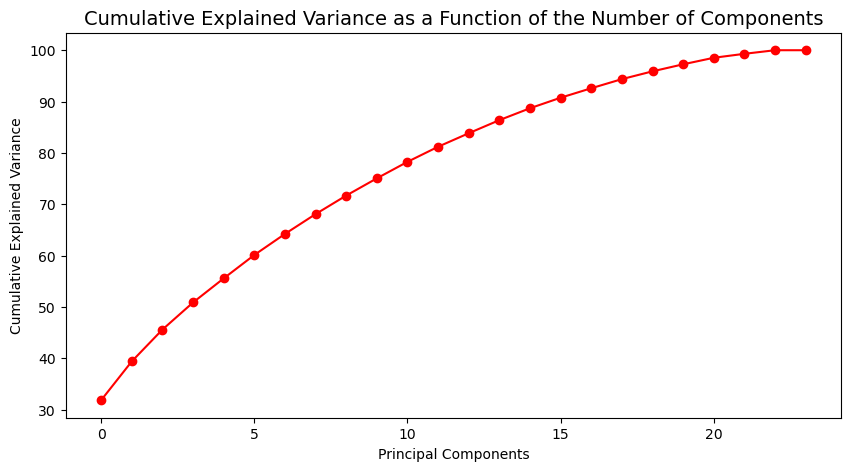

In [47]:
# Plot Cummulative Variance
plt.figure(figsize=(10,5))
plt.title('Cumulative Explained Variance as a Function of the Number of Components', fontsize=14)
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Explained Variance')
cum_var = np.cumsum(df_var.values)
plt.plot(cum_var, color='r', marker='o')
plt.show()

In [48]:
pca = PCA(0.90)
X_pca = pca.fit_transform(X_SC)

In [49]:
X_pca.shape

(400, 16)